## Paper figs (new)
## After comments from Prof. Morris

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random
from matplotlib.lines import Line2D
import colorsys
import platform
from pathlib import Path
from matplotlib import colors
#import readFiles
import src.readFiles as readFiles
import pandas as pd

# Matplotlib rc parameters modification
plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']

fig_width = 7.05826  #inches

if platform.system() == 'Darwin':  # macOS
    topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/")
elif platform.system() == 'Linux':
    topDir = Path("/media/rahul/rahul_2TB/high_bidispersity/new_data/")
    fig_save_path = Path("/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/")
else:
    raise OSError("Unsupported OS")

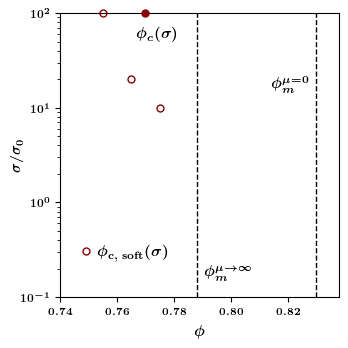

In [46]:
import matplotlib.pyplot as plt

#aritra's data (gotten visually from his paper)
stress = [10, 20, 100]
phic   = [0.775, 0.765, 0.755]

page_width  = 7.05826  #inches
plt.figure(figsize=(page_width/2,page_width/2))

plt.xlim(0.74, 0.838)
plt.ylim(1e-1, 1e2)
plt.yscale('log')

plt.xlabel(r'$\phi$', fontsize=11, labelpad=6)          # fontsize + padding
plt.ylabel(r'$\sigma/ \sigma_0$', fontsize=10, labelpad=-2)

plt.xticks(fontsize=7.5)  # x-axis tick labels
plt.yticks(fontsize=8)  # y-axis tick labels


# --- Vertical lines + labels ---
plt.axvline(0.788, color='k', linestyle='--', linewidth=1)
# plt.text(0.788 + 0.001, 0.12, r'$\mu \rightarrow \infty$', rotation=90,
#          va='bottom', ha='left')

plt.axvline(0.83, color='k', linestyle='--', linewidth=1)
# plt.text(0.83 + 0.001, 0.12, r'$\mu = 0$', rotation=90,
#          va='bottom', ha='left')

# plt.plot(0.77, 1.0, 'o', color='darkred', markersize=6, transform=plt.gca().get_xaxis_transform(),
#     zorder=5, clip_on=False, label=r'$\phi_c(\sigma)$')

plt.plot(0.77, 100, 'o', color='darkred', markersize=5,
    zorder=5, clip_on=False) #, label=r'$\phi_c(\sigma)$')

plt.plot(phic, stress, 'o', mfc='none', mec='darkred', ms=5,
         zorder=5, clip_on=False,
         label=r'$\phi_{\mathrm{c,\; soft}}(\sigma)$')


#plt.axvline(0.76, color='k', linestyle='--', linewidth=1)
# plt.text(0.76 + 0.001, 0.12, r'$0.76$', rotation=90,
#          va='bottom', ha='left')

plt.text(0.827, 22, r'$\phi^{\mu=0}_m$', fontsize=11, color='black', rotation=0, va='top', ha='right')
plt.text(0.807, 0.15, r'$\phi^{\mu\to \infty}_m$', fontsize=11, color='black', rotation=0, va='bottom', ha='right')
plt.text(0.7815, 51, r'$\phi_c(\sigma)$', fontsize=11, color='black', rotation=0, va='bottom', ha='right')
#plt.text(0.763, 48, r'$\phi_{c,\mathrm{soft}}$', fontsize=13, color='black', rotation=0, va='bottom', ha='right')

plt.legend(loc='lower left', bbox_to_anchor=(-0.01, 0.08), fontsize=11,
           frameon=False, handletextpad=-0.3)


plt.savefig(f'{fig_save_path}/flowstate3.pdf', bbox_inches="tight", 
                pad_inches=0.03, dpi=600, transparent=True)
plt.show()

[ 49.09679504   6.80806073  15.5214153   20.7961538   38.31646245
  87.51973207  61.76287731  37.43091855  86.63286109 157.74481666
 300.31030909 443.91787324]


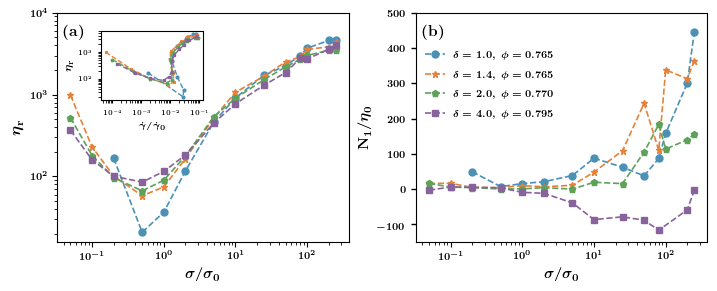

In [65]:
## Actual Fig 3 (clean version)
# Works on MAC

# --- Parameters ---
npp      = 1000
vr       = '0.5'
phi_vals = [0.765, 0.765, 0.77, 0.795]
ar_vals  = [1.0, 1.4, 2.0, 4.0]
off      = 100
numRun   = 1

line_markers  = ['o', '*', 'p', 's']
colors        = ['#4a91b5', '#e68139', '#5da258', '#87629b']
stress        = ['0.05','0.1','0.2','0.5','1','2','5','10','25','50','80','100','200','250']
stress_floats = [float(s) for s in stress]

# --- Setup figure ---
fig, axs = plt.subplots(1, 2, figsize=(fig_width, 2.8), constrained_layout=True)


#fig.set_constrained_layout_pads(w_pad=0.0, h_pad=0.1, hspace=0.2, wspace=0.0)

ax_main, ax_n1 = axs
#fig.subplots_adjust(top=0.8)

# inset_axes replacement (relative coords: [x0, y0, width, height])
ax_inset = ax_main.inset_axes([0.15, 0.62, 0.35, 0.30])  

# --- Loop over aspect ratios ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    visc, visc_std, sr, sr_std = [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress), [np.nan]*len(stress)

    for i, s in enumerate(stress):    
        path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                visc[i]     = np.mean(data[off:, 3])
                visc_std[i] = np.std(data[off:, 3])
                sr[i]       = np.mean(data[off:, 2])
                sr_std[i]   = np.std(data[off:, 2])
        except (IndexError, FileNotFoundError):
            continue

    # Filter NaNs
    mask = ~np.isnan(visc)
    stress_plot = np.array(stress_floats)[mask]
    visc_plot   = np.array(visc)[mask]
    sr_plot     = np.array(sr)[mask]

    # Plot viscosity vs stress (main plot)
    ax_main.plot(stress_plot, visc_plot, '--', marker=line_markers[j], linewidth=1.2,
                 color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij}$')

    # Plot viscosity vs shear rate (inset)
    ax_inset.plot(sr_plot, visc_plot, '--', marker=line_markers[j],
                  color=colors[j], markersize=2, linewidth=1)

# --- Format ax_main ---
labelsize = 10.5
ticksize  = 7
ax_main.set(xscale='log', yscale='log')
ax_main.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', style='italic', fontweight='bold', fontsize=labelsize)
ax_main.set_ylabel(r'$\mathbf{\eta_r}$', style='italic', fontsize=11.5, fontweight='bold')
ax_main.set_xticks([0.1, 1, 10, 100])
ax_main.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_main.set_yticks([100, 1000, 10000])
ax_main.set_yticklabels([r'$10^{2}$', r'$10^{3}$', r'$10^{4}$'], fontsize=ticksize, fontweight='bold')

# --- Format inset ---
ax_inset.set(xscale='log', yscale='log')
ax_inset.set_xlabel(r'$\mathbf{\dot \gamma/ \dot \gamma_{0}}$', fontsize=6, fontweight='bold', style='italic')
ax_inset.set_ylabel(r'$\mathbf{\eta_r}$', fontsize=7.5, fontweight='bold', style='italic')
ax_inset.tick_params(labelsize=4.6)
for axis in [ax_inset.xaxis, ax_inset.yaxis]:
    for line in axis.get_ticklines():
        line.set_markersize(line.get_markersize() * 0.7)   # scale length
        line.set_linewidth(line.get_linewidth() * 0.3)     # scale width

# --- Second subplot (N1 vs stress) ---
for j, (arj, phij) in enumerate(zip(ar_vals, phi_vals)):
    n1, n1_std = [np.nan]*len(stress), [np.nan]*len(stress)
    
    for i, s in enumerate(stress):
        if arj == 4 and s == '100':
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_2'
        else:
            path = f'{topDir}/flow_curves/stress_{s}r/NP_{npp}/phi_{phij}/ar_{arj}/Vr_{vr}/run_{numRun}'
        try:
            file = glob.glob(f'{path}/data_*.dat')[0]
            data = np.loadtxt(file)
            if data.ndim > 1:
                n1[i]     = np.mean(data[off:, 10])
                n1_std[i] = np.std(data[off:, 10])
        except (IndexError, FileNotFoundError):
            continue

    mask = ~np.isnan(n1)
    stress_plot = np.array(stress_floats)[mask]
    n1_plot     = np.array(n1)[mask]

    ax_n1.plot(stress_plot, n1_plot, '--', marker=line_markers[j], linewidth=1.2,
               color=colors[j], label=rf'$\delta = {arj:.1f}, \; \phi = {phij:.3f}$')
    
    if arj == 1:
        print(n1_plot)

# --- Format ax_n1 ---
ax_n1.set(xscale='log')
ax_n1.set_ylim([-150, 500])
ax_n1.set_xlabel(r'$\mathbf{\sigma/\sigma_{0}}$', fontsize=labelsize, fontweight='bold', style='italic')
ax_n1.set_ylabel(r'$\textbf{N}_{1}/\eta_0$', fontsize=labelsize)
ax_n1.set_xticks([0.1, 1, 10, 100])
ax_n1.set_xticklabels([r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=ticksize, fontweight='bold')
ax_n1.tick_params(axis='y', labelsize=ticksize, width=1)

# --- Add legends ---
ax_n1.legend(loc='upper left', fontsize=7, labelspacing=1.1, 
             borderpad=0.5, framealpha=0.0, bbox_to_anchor=(0, 0.875))

labels = [r'$\mathbf{(a)}$', r'$\mathbf{(b)}$', r'$\mathbf{(c)}$', r'$\mathbf{(d)}$']
for i, a in enumerate(axs):
    a.tick_params(axis='both', which='both')#, labelsize=11)  # increase tick font size
    a.text(0.02, 0.95, labels[i],
           transform=a.transAxes,
           fontsize=11,
           va='top', ha='left')

# --- Add grid lines ---
# ax_main.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.3)   # main plot
# ax_inset.grid(False, which='major', linestyle='--', linewidth=0.4, alpha=0.3)   # inset
# ax_n1.grid(True, which='major', linestyle='--', linewidth=0.5, alpha=0.3)      # second subplot

# --- Save and show ---
#plt.tight_layout()
#fig.subplots_adjust(top=0.90)

plt.savefig(f'{fig_save_path}/flowcurve_n1_.pdf', bbox_inches="tight", dpi=600)
plt.show()

In [2]:
## Jammed cases for mu = inf

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
gamma   = 20
off     = 100

for i, vri in enumerate(vrr):
    k_list = []
    phim_list = []
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if jammed:
                        print(f'jammed: /phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/')

jammed: /phi_0.77/ar_1.4/Vr_0.25/run_1/
jammed: /phi_0.77/ar_2.0/Vr_0.25/run_2/
jammed: /phi_0.78/ar_2.0/Vr_0.5/run_2/


Best alpha found: 2.4803 with MSE: 0.0000


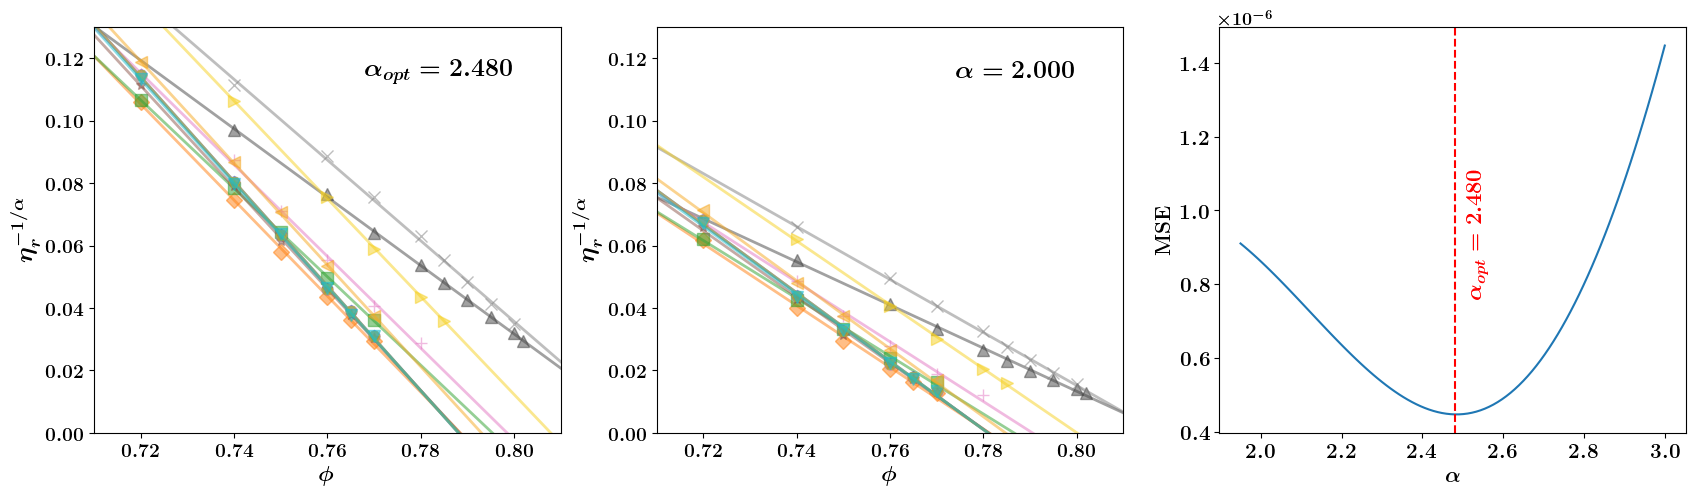

In [7]:
## finding optimum alpha using scaled alpha

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def powerlaw(phi, k, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (base ** -alpha)

def linearfit(phi, c, m):
    return c + m * phi

colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
marker_size  = [ 8,   8,   8,   8,   8,   8,   8,   8,   8,   8 ,  8 ,  8,   8 ]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
gamma   = 20
off = 100
phim_guess = [[.785, .785, .792, 0.82],
           [.785, .785, .792, 0.815],
           [.785, .785, .792, 0.8]]

fig, ax = plt.subplots(1, 3, figsize=(17, 5))

##################################
#Fig 1: Optimum alpha

alphas = np.linspace(1.95, 3, 100)  # Search range for alpha
best_alpha = None
best_err   = np.inf

mse_all = []
for alpha in alphas:
    total_err = 0
    count = 0
    for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
        for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
            visc = []
            for phi in phiv:  # Assuming phiv is defined
                phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                visc_list = []
                for run in range(numRuns):  # Assuming numRuns defined
                    vrj_used = '0.25' if arj == 1 else vrj
                    workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                    if os.path.exists(workDir):
                        dataFile = glob.glob(workDir + "data_*.dat")
                        if dataFile:
                            data   = np.loadtxt(dataFile[0])
                            jammed = any(x < 0 for x in data[:, 2])
                            if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                                visc_val = np.mean(data[off:, 3])
                                visc_list.append(visc_val)
                avg_visc = np.mean(visc_list) if visc_list else np.nan
                visc.append(avg_visc)
                
            # Filter out nans
            visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
            phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

            if len(visc_filtered) >= 2:
                popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[i][j]])
                k_opt, phim_opt = popt
                fit_vals = linearfit(np.array(phi_vals_filtered), k_opt, phim_opt)
                err = np.sum((fit_vals - visc_filtered) ** 2)
                total_err += err
                count += len(phi_vals_filtered)
                #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
    if count > 0:
        mse = total_err / count
        mse_all.append(mse)
        #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
        if mse < best_err:
            best_err   = mse
            best_alpha = alpha

print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

# --- Main plotting ---

k_all, phim_all = [], []
#best_alpha =
alpha = best_alpha
s = 0

for i, vri in enumerate(vrr):
    k_list = []
    phim_list = []
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
            k_opt, phim_opt = popt
            k_list.append(k_opt)
            phim_list.append(phim_opt)

            ax[0].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s])
           
            xx = np.linspace(0.70, .81, 100)
            yy = linearfit(xx, k_opt, phim_opt)
            ax[0].plot(xx, yy, color=colors[s], linewidth=line_width, alpha=0.5)
            s+=1
    k_all.append(k_list)
    phim_all.append(phim_list)
    
# Labels and formatting
ax[0].set_ylim(0, 0.13)
ax[0].set_xlim(0.71, 0.81)
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[0].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].text(0.9, 0.92, fr'$\alpha_{{opt}} = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

####################################################################################
# Fig 2: plot for slpah =2

k_all2, phim_all2 = [], []
alpha = 2
s=0
for i, vri in enumerate(vrr):
    k_list2 = []
    phim_list2 = []
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x**(-1/alpha) for x in visc   if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
            k_opt, phim_opt = popt
            k_list2.append(k_opt)
            phim_list2.append(phim_opt)

            ax[1].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s])
                      
            
            xx = np.linspace(0.70, .81, 100)
            yy = linearfit(xx, k_opt, phim_opt)
            ax[1].plot(xx, yy, color=colors[s], linewidth=line_width, alpha =0.5)
            s+=1

    k_all2.append(k_list2)
    phim_all2.append(phim_list2)
# Labels and formatting
ax[1].set_ylim(0, 0.13)
ax[1].set_xlim(0.71, 0.81)
ax[1].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[1].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].text(0.9, 0.92, fr'$\alpha = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[1].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

#print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

#########
# Fig 3: mse space

try:
    ax[2].plot(alphas, mse_all, linewidth=1.5)
    ax[2].set_xlabel(r'$\alpha$', fontsize=15)
    ax[2].set_ylabel(r'$\textbf{MSE}$', fontsize=15)
    #plt.ticks_params(axis='both', which='major', fontsize=15)
    ax[2].tick_params(axis='both', which='major', labelsize=15)
    ax[2].yaxis.get_offset_text().set_fontsize(13) #10^-6 fontsize
    min_idx = np.argmin(mse_all)
    #best_alpha = alphas[min_idx]
    ax[2].axvline(x=best_alpha, color='r', linestyle='--', linewidth=1.5)
    ax[2].text(best_alpha + 0.03,   # x
               min(mse_all) * 1.7,  # y
               fr'$\alpha_{{opt}} = {best_alpha:.3f}$',
               color='r', fontsize=16,
               ha='left', va='bottom',
               rotation=90)
except:
    None

if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/alpha_opt_linear{figFormat}', bbox_inches="tight",dpi=800)
    
plt.show()

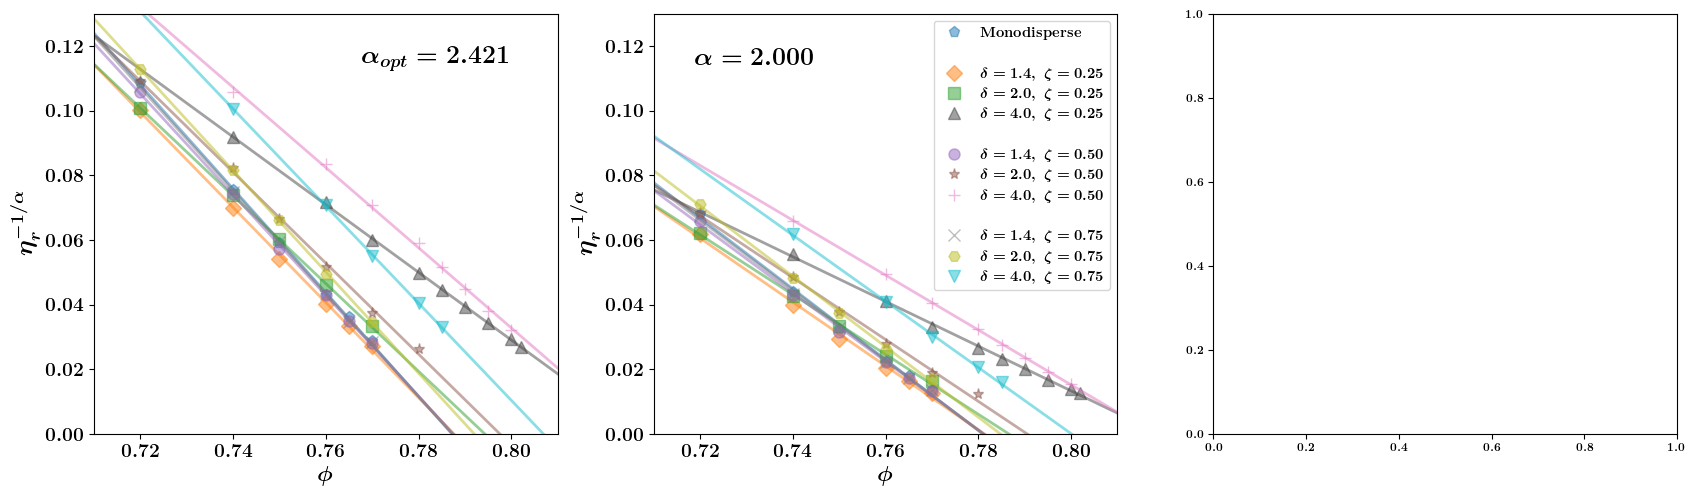

In [5]:
## finding optimum alpha using scaled alpha

## COde in progress -  sperating monodisperse cases and adding legend

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def powerlaw(phi, k, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (base ** -alpha)

def linearfit(phi, c, m):
    return c + m * phi

colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
marker_size  = [ 8,   8,   8,   8,   8,   8,   8,   8,   8,   8 ,  8 ,  8,   8 ]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns    = 2
gamma      = 20
off        = 100
phim_guess = [[.785, .785, .792, 0.82],
              [.785, .785, .792, 0.815],
              [.785, .785, .792, 0.8]]

fig, ax = plt.subplots(1, 3, figsize=(17, 5))

##################################
#Fig 1: Optimum alpha

# alphas     = np.linspace(1.95, 3, 30)  # Search range for alpha
# best_alpha = None
# best_err   = np.inf

# mse_all = []
# for alpha in alphas:
#     total_err = 0
#     count     = 0
#     visc      = []
    
#     ## For monodisperse case
#     for phi in phiv: 
#         phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
#         visc_list = []
#         for run in range(numRuns):
#             workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
#             if os.path.exists(workDir):
#                 dataFile = glob.glob(workDir + "data_*.dat")
#                 if dataFile:
#                     data   = np.loadtxt(dataFile[0])
#                     jammed = any(x < 0 for x in data[:, 2])
#                     if len(data[:, 3]) > (gamma*100 - off) and not jammed:
#                         visc_val = np.mean(data[off:, 3])
#                         visc_list.append(visc_val)
#         avg_visc = np.mean(visc_list) if visc_list else np.nan
#         visc.append(avg_visc)
        
#     # Filter out nans
#     visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
#     phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
    
#     if len(visc_filtered) >= 2:
#         popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[0][0]])
#         k_opt, phim_opt = popt
#         fit_vals = linearfit(np.array(phi_vals_filtered), k_opt, phim_opt)
#         err = np.sum((fit_vals - visc_filtered) ** 2)
#         total_err += err
#         count += len(phi_vals_filtered)
#         #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset

#     ## For bidisperse cases
#     for i, vrj in enumerate(vrr):  
#         for j, arj in enumerate(arr):
#             visc = []
#             for phi in phiv:  # Assuming phiv is defined
#                 phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
#                 visc_list = []
#                 for run in range(numRuns):  # Assuming numRuns defined
#                     workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
#                     if os.path.exists(workDir):
#                         dataFile = glob.glob(workDir + "data_*.dat")
#                         if dataFile:
#                             data   = np.loadtxt(dataFile[0])
#                             jammed = any(x < 0 for x in data[:, 2])
#                             if len(data[:, 3]) > (gamma*100 - off) and not jammed:
#                                 visc_val = np.mean(data[off:, 3])
#                                 visc_list.append(visc_val)
#                 avg_visc = np.mean(visc_list) if visc_list else np.nan
#                 visc.append(avg_visc)
            
#             # Filter out nans
#             visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
#             phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
            
#             if len(visc_filtered) >= 2:
#                 popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[i][j+1]])
#                 k_opt, phim_opt = popt
#                 fit_vals   = linearfit(np.array(phi_vals_filtered), k_opt, phim_opt)
#                 err        = np.sum((fit_vals - visc_filtered) ** 2)
#                 total_err += err
#                 count     += len(phi_vals_filtered)
#                 #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
#     if count > 0:
#         mse = total_err / count
#         mse_all.append(mse)
#         #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
#         if mse < best_err:
#             best_err   = mse
#             best_alpha = alpha

#print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err*1e6:.4f} x10^-6")

# --- Main plotting ---
# Left Plot

k_all, phim_all = np.zeros((4, 3)), np.zeros((4, 3))
best_alpha = 2.4207
alpha = best_alpha
s     = 0

## Monodisperse plot
k_list    = []
phim_list = []
visc      = []
for phi in phiv:
    phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    for run in range(numRuns):
        workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir + "data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            jammed   = any(x < 0 for x in data[:, 2])
            if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                visc_val = np.mean(data[off:, 3])
                visc_list.append(visc_val)
    visc.append(np.mean(visc_list) if visc_list else np.nan)

visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

if visc_filtered:
    popt, _         = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[0][0]])
    k_opt, phim_opt = popt
    k_list.append(k_opt)
    phim_list.append(phim_opt)

    k_all[0, :]    = k_opt
    phim_all[0, :] = phim_opt

    ax[0].plot(phi_vals_filtered, visc_filtered,
            linestyle  = 'None', alpha = 0.5,
            marker     = marker_shape[s],
            color      = colors[s],
            linewidth  = line_width,
            markersize = marker_size[s])
   
    xx = np.linspace(0.70, .81, 100)
    yy = linearfit(xx, k_opt, phim_opt)
    ax[0].plot(xx, yy, color=colors[s], linewidth=line_width, alpha=0.5)
    s += 1

## Bidisperse case
for i, vri in enumerate(vrr):
    k_list    = []
    phim_list = []
    for j, arj in enumerate(arr):
        visc  = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vri}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j+1]])
            k_opt, phim_opt = popt
            k_list.append(k_opt)
            phim_list.append(phim_opt)

            k_all[j+1, i]    = k_opt
            phim_all[j+1, i] = phim_opt
            
            ax[0].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s])
           
            xx = np.linspace(0.70, .81, 100)
            yy = linearfit(xx, k_opt, phim_opt)
            ax[0].plot(xx, yy, color=colors[s], linewidth=line_width, alpha=0.5)
            s+=1
    
    # k_all.append(k_list)
    # phim_all.append(phim_list)
    
# Labels and formatting
ax[0].set_ylim(0, 0.13)
ax[0].set_xlim(0.71, 0.81)
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[0].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].text(0.9, 0.92, fr'$\alpha_{{opt}} = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

####################################################################################
# Fig 2: plot for slpah =2

k_all2, phim_all2 = np.zeros((4, 3)), np.zeros((4, 3))
visc  = []
alpha = 2
s     = 0

## Monodisperse case
for phi in phiv:
    phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    visc_list = []
    for run in range(numRuns):
        workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir + "data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            jammed   = any(x < 0 for x in data[:, 2])
            if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                visc_val = np.mean(data[off:, 3])
                visc_list.append(visc_val)
    visc.append(np.mean(visc_list) if visc_list else np.nan)

visc_filtered     = [x**(-1/alpha) for x in visc   if not np.isnan(x)]
phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

if visc_filtered:
    popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[0][0]])
    k_opt, phim_opt = popt

    k_all2[0, :]    = k_opt
    phim_all2[0, :] = phim_opt

    ax[1].plot(phi_vals_filtered, visc_filtered,
                linestyle='None', alpha=0.5,
                marker=marker_shape[s],
                color=colors[s],
                linewidth=line_width,
                markersize=marker_size[s],
                label=r'$\textbf{Monodisperse}$')

    xx = np.linspace(0.70, .81, 100)
    yy = linearfit(xx, k_opt, phim_opt)
    ax[1].plot(xx, yy, color=colors[s], linewidth=line_width, alpha =0.5)
    s+=1

ax[1].plot([], [], ' ', label=" ")

## Bidisperse case
for i, vri in enumerate(vrr):
    phim_list2 = []
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vri}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x**(-1/alpha) for x in visc   if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j+1]])
            k_opt, phim_opt = popt

            k_all2[j+1, i]    = k_opt
            phim_all2[j+1, i] = phim_opt

            ax[1].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s],
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vri):.2f}$')
            
            xx = np.linspace(0.70, .81, 100)
            yy = linearfit(xx, k_opt, phim_opt)
            ax[1].plot(xx, yy, color=colors[s], linewidth=line_width, alpha =0.5)
            s += 1

    if vri != vrr[-1]:
        ax[1].plot([], [], ' ', label=" ") 
    
# Labels and formatting
ax[1].legend(loc='upper right', fontsize=10.5, frameon=True, labelspacing=0.5)
ax[1].set_ylim(0, 0.13)
ax[1].set_xlim(0.71, 0.81)
ax[1].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[1].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].text(0.35, 0.92, fr'$\alpha = {alpha:.3f}$',
           fontsize  = 18, ha = 'right', va = 'top',
           transform = ax[1].transAxes,
           bbox = dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

#print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

#########
# Fig 3: mse space

try:
    ax[2].plot(alphas, mse_all, linewidth=1.5)
    ax[2].set_xlabel(r'$\alpha$', fontsize=15)
    ax[2].set_ylabel(r'$\textbf{MSE}$', fontsize=15)
    #plt.ticks_params(axis='both', which='major', fontsize=15)
    ax[2].tick_params(axis='both', which='major', labelsize=15)
    ax[2].yaxis.get_offset_text().set_fontsize(13) #10^-6 fontsize
    min_idx = np.argmin(mse_all)
    #best_alpha = alphas[min_idx]
    ax[2].axvline(x=best_alpha, color='r', linestyle='--', linewidth=1.5)
    ax[2].text(best_alpha + 0.03,   # x
               min(mse_all) * 1.7,  # y
               fr'$\alpha_{{opt}} = {best_alpha:.3f}$',
               color='r', fontsize=16,
               ha='left', va='bottom',
               rotation=90)
except:
    None

if False:
    fig_save_path = '/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs' 
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/alpha_opt_linear{figFormat}', bbox_inches="tight",dpi=800)

plt.show()

In [52]:
## phim for best alpha

best_alpha = 2.4207
df = pd.DataFrame(
    -np.array(k_all) / np.array(phim_all),
    columns=[f"ζ = {z}" for z in vrr],
    index=[f"δ = {d}" for d in [1.0] + arr]
)

print("phim values")
print(df.round(3))

phim values
         ζ = 0.25  ζ = 0.5  ζ = 0.75
δ = 1.0     0.787    0.787     0.787
δ = 1.4     0.788    0.787     0.787
δ = 2.0     0.794    0.798     0.792
δ = 4.0     0.828    0.826     0.807


In [53]:
## k for best alpha

best_alpha = 2.4207
df = pd.DataFrame(
    np.array(k_all) ** (-best_alpha),
    columns=[f"ζ = {z}" for z in vrr],
    index=[f"δ = {d}" for d in [1.0] + arr]
)

print("K values\n")
print(df.round(3))

K values

         ζ = 0.25  ζ = 0.5  ζ = 0.75
δ = 1.0     0.566    0.566     0.566
δ = 1.4     0.698    0.607     0.577
δ = 2.0     0.832    0.755     0.592
δ = 4.0     1.412    0.941     0.626


In [6]:
## Params for alpha = 2
alpha = 2
df    = pd.DataFrame(
        np.array(k_all2) ** (-alpha),
        columns   = [f"ζ = {z}" for z in vrr],
        index = [f"δ = {d}" for d in [1.0] + arr])

print("K values for alpha = 2\n")
print(df.round(3))

K values for alpha = 2

         ζ = 0.25  ζ = 0.5  ζ = 0.75
δ = 1.0     1.365    1.365     1.365
δ = 1.4     1.675    1.462     1.394
δ = 2.0     1.884    1.748     1.366
δ = 4.0     3.116    2.074     1.490


In [9]:
## Phims for alpha = 2

alpha = 2
df = pd.DataFrame(
    -np.array(k_all2) / np.array(phim_all2),
    columns  = [f"ζ = {z}" for z in vrr],
    index    = [f"δ = {d}" for d in [1.0] + arr]
)

print("phim values for alpha = 2\n")
print(df.round(3))        # δ as rows, ζ as columns (original)
# print("\n--- Transposed ---\n")
# print(df.T.round(3))      # ζ as rows, δ as columns

phim values for alpha = 2

         ζ = 0.25  ζ = 0.5  ζ = 0.75
δ = 1.0     0.781    0.781     0.781
δ = 1.4     0.781    0.781     0.781
δ = 2.0     0.787    0.791     0.785
δ = 4.0     0.819    0.818     0.800


In [21]:
np.array(k_all).shape

(4, 3)

In [22]:
np.array(phim_all).shape

(4, 3)

In [23]:
vrr

['0.25', '0.5', '0.75']

In [3]:
-np.array(k_all)/np.array(phim_all)

array([[0.78810233, 0.78849422, 0.79534434, 0.82892478],
       [0.78810233, 0.78837106, 0.79850379, 0.827624  ],
       [0.78810233, 0.78813364, 0.79301017, 0.80786238]])

In [139]:
phim = -np.array(k_all)/np.array(phim_all)
phim[:,1] ## zeta = .50

array([0.78720633, 0.79424665, 0.79750388, 0.79197688])

In [ ]:
best_alpha =  2.4207
df = pd.DataFrame(np.array(k_all), index=[f"ζ = {z}" for z in vrr], columns=[f"δ = {d}" for d in arr])
print('K* values')
print('K* = k^(-1/alpha)')
print('')
print(df.round(3)) 

To show the $\phi_m$ of all cases for $\alpha = 2.981$


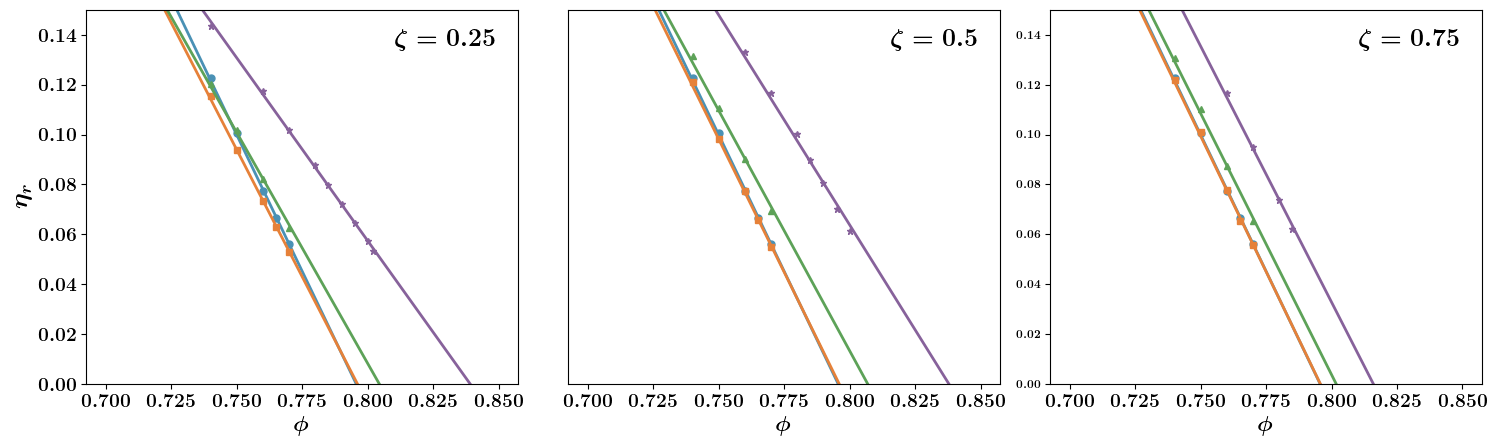

[[0.79560312 0.79607566 0.80441793 0.83912245]
 [0.79560312 0.79599847 0.80688023 0.83789678]
 [0.79560312 0.79569337 0.80173299 0.8159366 ]]


In [11]:
# maron pierce all plots
# getting phims for all

from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)
from sklearn.metrics import r2_score

def maronpierce(x,c,k):
    base = 1 - (x / k)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return 1 * (base ** -c)

def linearfit(x,c,m):
    return m*x + c

#cmap = matplotlib.colormaps['viridis_r'] #color scheme
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100
c0s    = []
mvals   = []
#alpha   = 2.2464
alpha   = 2.981

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

for i, vri in enumerate(vrr):
    c0      = [] # y intercept
    m_list  = []
    for j, arj in enumerate(arr):
        visc = []
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    #print(workDir)
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    if len(data) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan) 

        visc_filtered     = [x**(1/-alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        # curve fit
        popt, pcov   = curve_fit(linearfit, phi_vals_filtered, visc_filtered,)
        c_opt, m_opt = popt
        c0.append(c_opt)
        ax[i].plot(phi_vals_filtered, visc_filtered,
                   linestyle='None',         # or linestyle=''
                   marker=line_markers[j],   # like 'o', 'x', '^', etc.
                   color=colors[j],
                   linewidth=1.7)            # linewidth has no effect if no line, optional

        #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
        m_list.append(m_opt)

        #plotting for model
        xx = np.linspace(0.70, .85, 100)
        yy = linearfit(xx,c_opt,m_opt)
        ax[i].plot(xx, yy, color = colors[j], linewidth=2)

        # True y values
        y_true = visc_filtered
        
        # Predicted y values using the model
        y_pred = linearfit(np.array(phi_vals_filtered), c_opt, m_opt)
        
        # Compute R^2
        r2 = r2_score(y_true, y_pred)
        #print(f"R^2: {r2:.4f}")

    c0s.append(c0)
    mvals.append(m_list)
    
    #ax[i].grid(which='Both', alpha=0.2)
    #ax[i].set_xlim(.737, .80)
    ax[i].set_ylim(0, 0.15)
    ax[i].set_xlabel(r'$\phi$', fontsize=16,fontstyle='italic')
    ax[i].tick_params(axis='x', labelsize=14)
    #ax[0].legend(loc='upper left', fontsize=13, labelspacing=1.5, borderpad=1.2)
    #ax[i].set_title(fr'$\gamma = {vrr[i]}$', fontsize=13, pad=10)
    ax[i].text(0.95, 0.95, fr'$\zeta = {vrr[i]}$', 
               fontsize=18,
               ha='right', va='top',            # Align text to top-right
               transform=ax[i].transAxes,       # Use axes coordinates (0-1)
               bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
    
# plot parameters
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18,fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=14)
ax[1].set_yticks([])
ax[2].set_yticks([])

phims = -np.array(c0s) / np.array(mvals) #xintercept

fig.tight_layout()

figsave=False
if figsave:
    figFormat=".pdf"
    plt.savefig(fig_save_path+ 'Maron_Pierce_fit'+figFormat, bbox_inches="tight",dpi=500)

print(fr'To show the \phi_m of all cases for \alpha = {alpha}')

plt.show()
print(np.array(phims))

## Fig 2

alpha = 2.4207


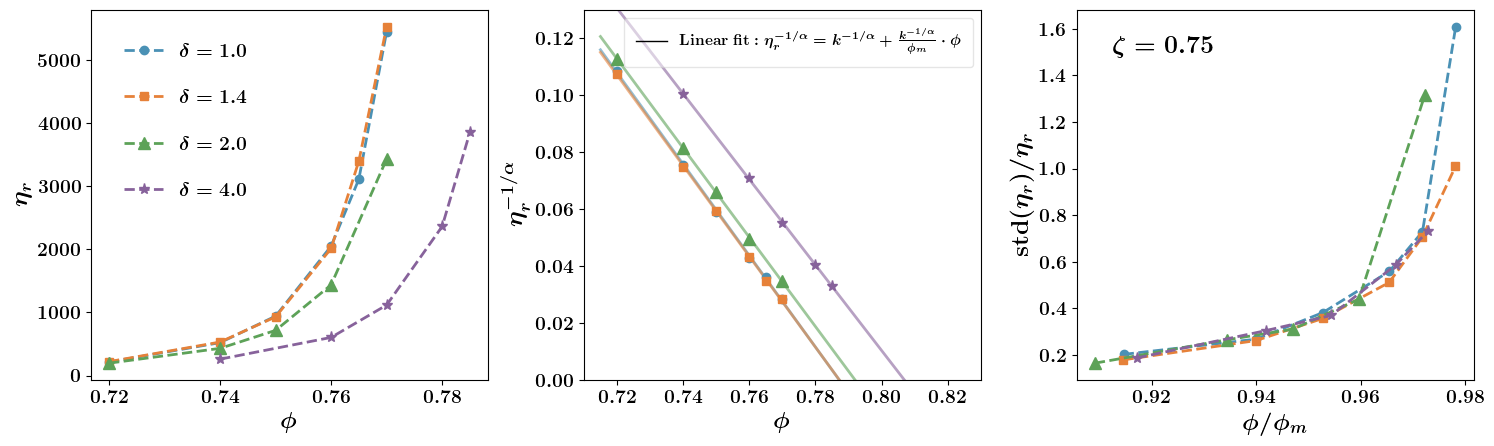

In [7]:
# Maron-Pierce All Plots

from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)
from sklearn.metrics import r2_score

def linearfit(x, c, m):
    return m * x + c

# Color and marker settings
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size = [6, 6, 8, 8, 8]
line_width = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = '0.75'
numRuns = 2
off   = 100
c0s   = []
mvals = []

# phims   = np.array([[0.78453329, 0.78486939, 0.7909178 , 0.82419867],
#                    [0.78453329, 0.78484748, 0.7927913 , 0.8228579 ],
#                    [0.78453329, 0.78464183, 0.78896423, 0.80393124]])
alpha = 2.4207 #2.4273

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

# Fig 1: Mean viscosity vs phi
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)
        visc.append(np.mean(visc_list) if visc_list else np.nan)

    visc_filtered     = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
    
    ax[0].plot(phi_vals_filtered, visc_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j], label=fr'$\delta = {arj:.1f}$')

#ax[0].set_ylim(0, 6200)
ax[0].legend(frameon=False, fontsize=14, loc="upper left", labelspacing=1.5, borderpad=1.2)
ax[0].set_xlabel(r'$\phi$', fontsize=17, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
#ax[0].legend(loc='upper left', fontsize=13, labelspacing=1.5, borderpad=1.2)
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=14)

# Fig 2: linear fit
c0     = []
m_list = []
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj     = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)
        visc.append(np.mean(visc_list) if visc_list else np.nan)
        
    visc_filtered     = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

    popt, pcov   = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
    c_opt, m_opt = popt
    c0.append(c_opt)
    ax[1].plot(phi_vals_filtered, visc_filtered, linestyle='None',
               marker     = line_markers[j], color = colors[j], linewidth = line_width,
               markersize = marker_size[j], zorder = 20)

    m_list.append(m_opt)
    xx = np.linspace(0.715, .85, 100)
    yy = linearfit(xx, c_opt, m_opt)
    ax[1].plot(xx, yy, color=colors[j], linewidth=2, alpha = 0.6)

c0s.append(c0)
mvals.append(m_list)

ax[1].plot([], [], color="k", 
           label=r"$\mathrm{Linear\ fit:}\ \eta_r^{-1/\alpha} = k^{-1/\alpha} + \frac{k^{-1/\alpha}}{\phi_m} \cdot \phi$")

leg = ax[1].legend(frameon=True, fontsize=11, loc="upper right", labelspacing=0.8, borderpad=0.8, framealpha=0.5)
leg.set_zorder(30)
ax[1].set_ylim(0, 0.13)
ax[1].set_xlim(0.71, 0.83)
ax[1].set_xlabel(r'$\phi$', fontsize=17, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)

ax[1].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='y', labelsize=14)

x_intercept = -np.array(c0s) / np.array(mvals)
phims       = list(x_intercept[0])

# Fig 3: Std deviation of viscosity vs phi
for j, arj in enumerate(arr):
    viscVar = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_var_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                    visc_var = np.std(data[off:, 3])/np.mean(data[off:, 3])
                    visc_var_list.append(visc_var)
        viscVar.append(np.mean(visc_var_list) if visc_var_list else np.nan)
    
    
    visc_var_filtered = [x for x in viscVar if not np.isnan(x)]
    phi_vals_filtered = [y/phims[j] for x, y in zip(viscVar, phiv) if not np.isnan(x)]
    #print(f'{visc_var_filtered[-1]}')
    ax[2].plot(phi_vals_filtered, visc_var_filtered, linestyle='--',
               marker     = line_markers[j], color = colors[j], linewidth = line_width,
               markersize = marker_size[j])
    
ax[2].text(0.09, 0.93, fr'$\zeta = {float(vrr):.2f}$',
           fontsize=18,
           ha='left', va='top',
           transform=ax[2].transAxes,
           bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
ax[2].set_xlabel(r'$\phi/\phi_m$', fontsize=17, fontstyle='italic')
ax[2].tick_params(axis='x', labelsize=14)
ax[2].set_ylabel(r'$\mathrm{std}(\eta_r)/ \eta_{r}$', fontsize=18, fontstyle='italic')
ax[2].tick_params(axis='y', labelsize=14)
#ax[2].set_yscale('log')

if False:
    fig_save_path = '/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs' 
    figFormat = ".pdf"
    plt.savefig(f'{fig_save_path}/Maron_Pierce_fit_vrr_{vrr}{figFormat}', bbox_inches="tight", dpi=500)

#fig.tight_layout()
print(f'alpha = {alpha}')
plt.show()

In [12]:
phims

array([[0.79560312, 0.79607566, 0.80441793, 0.83912245],
       [0.79560312, 0.79599847, 0.80688023, 0.83789678],
       [0.79560312, 0.79569337, 0.80173299, 0.8159366 ]])

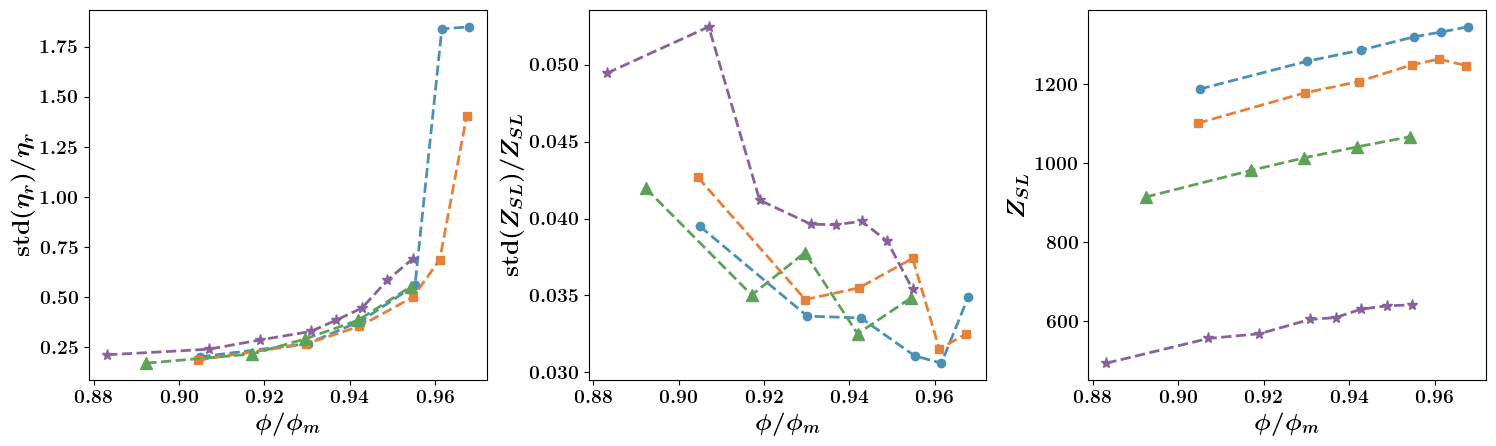

In [21]:
# Std visc and SL contacts comparison

from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)
from sklearn.metrics import r2_score


# Color and marker settings
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size = [6, 6, 8, 8, 8]
line_width = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = '0.5'
numRuns = 2
off   = 100
c0s   = []
mvals = []

phims = [0.79560312, 0.79599847, 0.80688023, 0.83789678]

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

# Fig 1: Std deviation of viscosity vs phi
for j, arj in enumerate(arr):
    viscVar = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_var_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                if len(data[off:, 3]) > off:
                    visc_var = np.std(data[off:, 3])/np.mean(data[off:, 3])
                    visc_var_list.append(visc_var)
        viscVar.append(np.mean(visc_var_list) if visc_var_list else np.nan)
    
    
    visc_var_filtered = [x for x in viscVar if not np.isnan(x)]
    phi_vals_filtered = [y/phims[j] for x, y in zip(viscVar, phiv) if not np.isnan(x)]
    #print(f'{visc_var_filtered[-1]}')
    ax[0].plot(phi_vals_filtered, visc_var_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j])

ax[0].set_xlabel(r'$\phi/\phi_m$', fontsize=17, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].set_ylabel(r'$\mathrm{std}(\eta_r)/ \eta_{r}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=14)
#ax[0].set_yscale('log')

# Fig 2: Std of SL contacts

for j, arj in enumerate(arr):
    SLconts_ar = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        cont_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                contFile = glob.glob(workDir + "contacts.txt")[0]
                data     = np.loadtxt(contFile)
                if len(data[:, 0]) > off:
                    SLconts    = data[off:, 4]#/data[off:, 5] # SL contacts per particle
                    SL_std_var = np.std(SLconts)/np.mean(SLconts)
                    
                    cont_list.append(SL_std_var)
        SLconts_ar.append(np.mean(cont_list) if cont_list else np.nan)
    
    
    data_filtered = [x for x in SLconts_ar if not np.isnan(x)]
    phi_filtered  = [y/phims[j] for x, y in zip(SLconts_ar, phiv) if not np.isnan(x)]
    #print(f'{visc_var_filtered[-1]}')
    ax[1].plot(phi_filtered, data_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j])

ax[1].set_xlabel(r'$\phi/\phi_m$', fontsize=17, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].set_ylabel(r'$\mathrm{std}(Z_{SL})/ Z_{SL}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='y', labelsize=14)
#ax[1].set_yscale('log')

# Fig 3: Std of SL contacts

for j, arj in enumerate(arr):
    SLconts_ar = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        cont_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                contFile = glob.glob(workDir + "contacts.txt")[0]
                data     = np.loadtxt(contFile)
                if len(data[:, 0]) > off:
                    SLconts = np.mean(data[off:, 4])
                    cont_list.append(SLconts)
        SLconts_ar.append(np.mean(cont_list) if cont_list else np.nan)
    
    
    data_filtered = [x for x in SLconts_ar if not np.isnan(x)]
    phi_filtered  = [y/phims[j] for x, y in zip(SLconts_ar, phiv) if not np.isnan(x)]
    #print(f'{visc_var_filtered[-1]}')
    ax[2].plot(phi_filtered, data_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j])

ax[2].set_xlabel(r'$\phi/\phi_m$', fontsize=17, fontstyle='italic')
ax[2].tick_params(axis='x', labelsize=14)
ax[2].set_ylabel(r'$Z_{SL}$', fontsize=18, fontstyle='italic')
ax[2].tick_params(axis='y', labelsize=14)
#ax[1].set_yscale('log')


figsave = False
if figsave:
    figFormat = ".pdf"
    plt.savefig(f'{fig_save_path}/Maron_Pierce_fit_vrr_{vrr}{figFormat}', bbox_inches="tight", dpi=500)

#fig.tight_layout()
plt.show()

Best alpha found: 2.4545 with MSE: 3978.0623 X1e-10


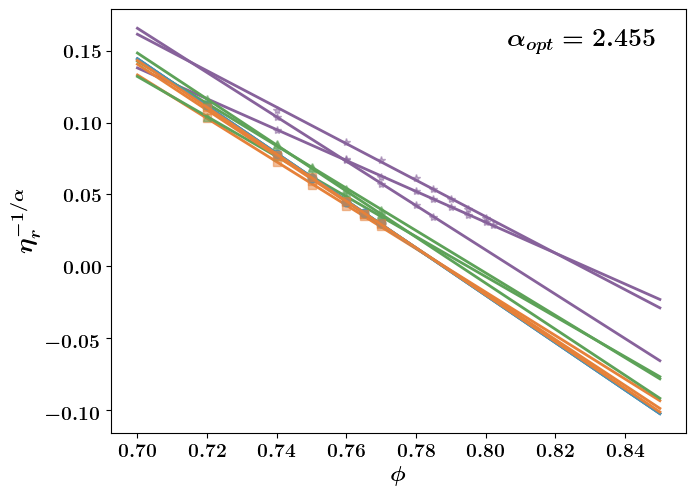

In [50]:
## finding optimum alpha

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Color and marker settings
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100

c0s = []
mvals = []
#alpha = 2.2464

# Define linear fit
def linearfit(phi, c, m):
    return c + m * phi

import numpy as np
import os, glob
from scipy.optimize import curve_fit

alphas = np.linspace(1.9, 2.8, 100)  # Search range for alpha
best_alpha = None
best_err   = np.inf

for alpha in alphas:
    total_err = 0
    count = 0
    #print(f"Testing alpha = {alpha:.4f}")  # Trace alpha value
    for vrj in vrr:  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
        for arj in arr:  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
            visc = []
            for phi in phiv:  # Assuming phiv is defined
                phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                visc_list = []
                for run in range(numRuns):  # Assuming numRuns defined
                    vrj_used = '0.25' if arj == 1 else vrj
                    workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                    if os.path.exists(workDir):
                        dataFile = glob.glob(workDir + "data_*.dat")
                        if dataFile:
                            data = np.loadtxt(dataFile[0])
                            if len(data[off:, 3]) > off:  # Assuming off defined
                                visc_val = np.mean(data[off:, 3])
                                visc_list.append(visc_val)
                avg_visc = np.mean(visc_list) if visc_list else np.nan
                visc.append(avg_visc)
            # Filter out nans
            visc_filtered     = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
            phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

            if len(visc_filtered) >= 2:
                popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
                c_opt, m_opt = popt
                fit_vals = linearfit(np.array(phi_vals_filtered), c_opt, m_opt)
                err = np.sum((fit_vals - visc_filtered) ** 2)
                total_err += err
                count += len(phi_vals_filtered)
                #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    if count > 0:
        mse = total_err / count 
        #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
        if mse < best_err:
            best_err = mse
            best_alpha = alpha

print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err*1e10:.4f} X1e-10")


# --- Main plotting ---
fig, ax = plt.subplots(figsize=(7, 5))

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
line_width = 2
marker_size = [6] * len(colors)

# Get one optimum alpha for all datasets
#alpha_opt = optimize_alpha(arr, phiv, numRuns, vrr, topDir, npp, off)
#print(f"Optimized alpha = {alpha_opt:.3f}")

c0_all, m_all = [], []

for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
            c_opt, m_opt = popt
            c0_all.append(c_opt)
            m_all.append(m_opt)

            ax.plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=line_markers[j],
                    color=colors[j % len(colors)],
                    linewidth=line_width,
                    markersize=marker_size[j % len(marker_size)])

            xx = np.linspace(0.70, .85, 100)
            yy = linearfit(xx, c_opt, m_opt)
            ax.plot(xx, yy, color=colors[j % len(colors)], linewidth=2)

# Labels and formatting
#ax.set_ylim(0, 0.15)
ax.set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax.set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.text(0.95, 0.95, fr'$\alpha_{{opt}} = {best_alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

plt.tight_layout()
plt.show()

In [29]:
## finding optimum alpha

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define linear fit
def linearfit(phi, c, m):
    return c + m * phi

# def powerlaw(phi, k, phim):
#     return k*(1 + (phi/phim))**-alpha

def powerlaw(phi, k, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (base ** -alpha)


# Color and marker settings
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns    = 2
off        = 100
phim_guess = [[.784, .785, .791, 0.824],
              [.784, .785, .793, 0.823],
              [.784, .785, .789, 0.804]]


alphas     = np.linspace(0.01, 10, 50)  # Search range for alpha
best_alpha = None
best_err   = np.inf

mse_all = []
for alpha in alphas:
    total_err = 0
    count = 0
    for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
        for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
            visc = []
            for phi in phiv:  # Assuming phiv is defined
                phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                visc_list = []
                for run in range(numRuns):  # Assuming numRuns defined
                    vrj_used = '0.25' if arj == 1 else vrj
                    workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                    if os.path.exists(workDir):
                        dataFile = glob.glob(workDir + "data_*.dat")
                        if dataFile:
                            data = np.loadtxt(dataFile[0])
                            if len(data[off:, 3]) > off:  # Assuming off defined
                                visc_val = np.mean(data[off:, 3])
                                visc_list.append(visc_val)
                avg_visc = np.mean(visc_list) if visc_list else np.nan
                visc.append(avg_visc)
            # Filter out nans
            visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
            phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

            if len(visc_filtered) >= 2:
                popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
                c_opt, m_opt = popt
                fit_vals = linearfit(np.array(phi_vals_filtered), c_opt, m_opt)
                err = np.sum((fit_vals - visc_filtered) ** 2)
                total_err += err
                count += len(phi_vals_filtered)
                #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
    if count > 0:
        mse = total_err / count
        mse_all.append(mse)
        #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
        if mse < best_err:
            best_err   = mse
            best_alpha = alpha

print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

/var/folders/7z/4v7gv78n0rq_k11539h6b9zc0000gn/T/ipykernel_69116/3669064133.py:66: RuntimeWarning: divide by zero encountered in double_scalars
  visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]


Best alpha found: 0.0000 with MSE: 0.0000


Best alpha found: 0.0000 with MSE: 0.0000


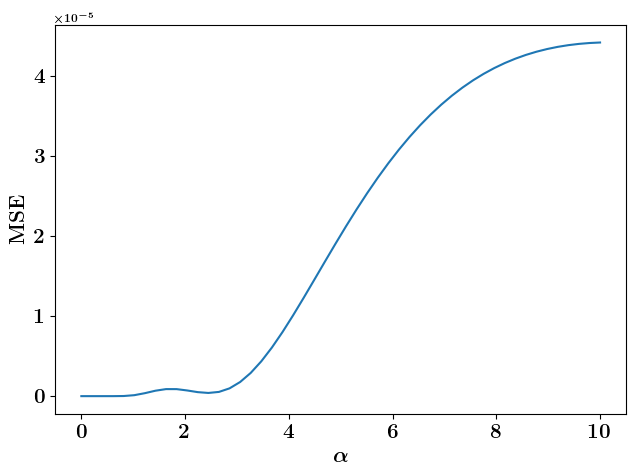

In [30]:
print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")
plt.plot(alphas, mse_all, linewidth=1.5)
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel(r'$\textbf{MSE}$', fontsize=15)
#plt.ticks_params(axis='both', which='major', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

alpha used: 2.20 with MSE: 5410.5468 X1e-10


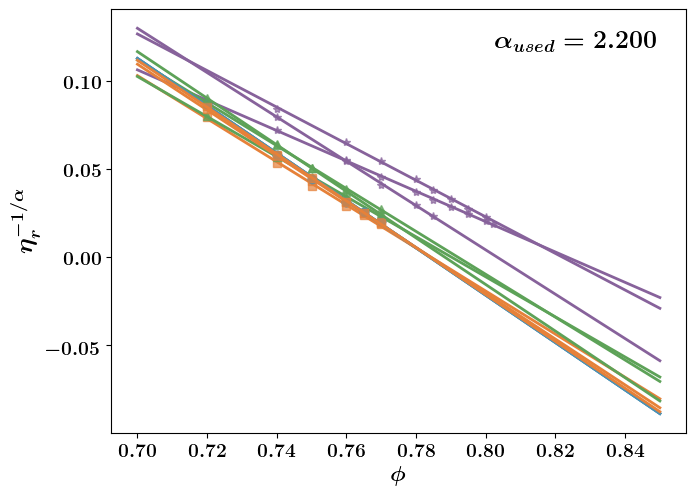

In [2]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Color and marker settings
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size = [6, 6, 8, 8, 8]
line_width = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100
c0s = []
mvals = []
#alpha = 2.2464

# Define linear fit
def linearfit(phi, c, m):
    return c + m * phi

import numpy as np
import os, glob
from scipy.optimize import curve_fit

#alphas = np.linspace(1.9, 2.8, 100)  # Search range for alpha
best_alpha = None
best_err   = np.inf

#for alpha in alphas:
alpha = 2.2
total_err = 0
count = 0
#print(f"Testing alpha = {alpha:.4f}")  # Trace alpha value
for vrj in vrr:  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
    for arj in arr:  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
        visc = []
        for phi in phiv:  # Assuming phiv is defined
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):  # Assuming numRuns defined
                vrj_used = '0.25' if arj == 1 else vrj
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")
                    if dataFile:
                        data = np.loadtxt(dataFile[0])
                        if len(data[off:, 3]) > off:  # Assuming off defined
                            visc_val = np.mean(data[off:, 3])
                            visc_list.append(visc_val)
            avg_visc = np.mean(visc_list) if visc_list else np.nan
            visc.append(avg_visc)
        # Filter out nans
        visc_filtered = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        if len(visc_filtered) >= 2:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
            c_opt, m_opt = popt
            fit_vals = linearfit(np.array(phi_vals_filtered), c_opt, m_opt)
            err = np.sum((fit_vals - visc_filtered) ** 2)
            total_err += err
            count += len(phi_vals_filtered)
            #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset

mse = total_err / count

print(f"alpha used: {alpha:.2f} with MSE: {mse*1e10:.4f} X1e-10")


# --- Main plotting ---
fig, ax = plt.subplots(figsize=(7, 5))

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
line_width = 2
marker_size = [6] * len(colors)

# Get one optimum alpha for all datasets
#alpha_opt = optimize_alpha(arr, phiv, numRuns, vrr, topDir, npp, off)
#print(f"Optimized alpha = {alpha_opt:.3f}")

c0_all, m_all = [], []

for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
            c_opt, m_opt = popt
            c0_all.append(c_opt)
            m_all.append(m_opt)

            ax.plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.7,
                    marker=line_markers[j],
                    color=colors[j % len(colors)],
                    linewidth=line_width,
                    markersize=marker_size[j % len(marker_size)])

            xx = np.linspace(0.70, .85, 100)
            yy = linearfit(xx, c_opt, m_opt)
            ax.plot(xx, yy, color=colors[j % len(colors)], linewidth=2)

# Labels and formatting
#ax.set_ylim(0, 0.15)
ax.set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax.set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.text(0.95, 0.95, fr'$\alpha_{{used}} = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

plt.tight_layout()
plt.show()

Best alpha found: 2.9814 with MSE: 1124.1735


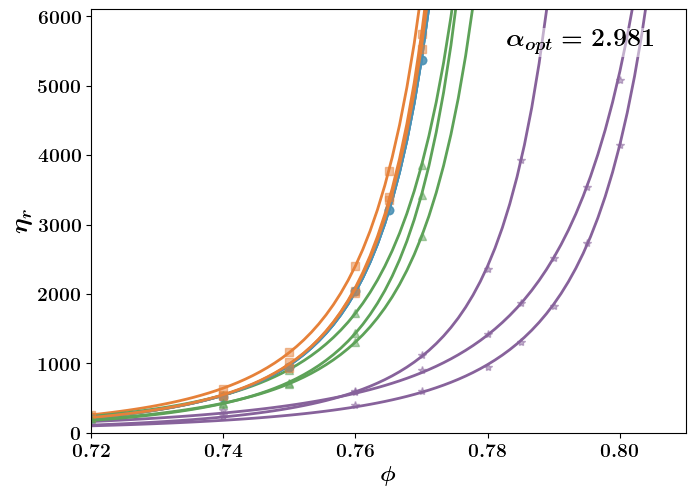

In [38]:
## finding optimum alpha

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define linear fit
def linearfit(phi, c, m):
    return c + m * phi

# def powerlaw(phi, k, phim):
#     return k*(1 + (phi/phim))**-alpha

def powerlaw(phi, k, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (base ** -alpha)

# Color and marker settings
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100
phim_guess = [[.785, .785, .792, 0.82],
           [.785, .785, .792, 0.815],
           [.785, .785, .792, 0.8]]

import numpy as np
import os, glob
from scipy.optimize import curve_fit

alphas = np.linspace(1.99, 3.5, 100)  # Search range for alpha
best_alpha = None
best_err   = np.inf

for alpha in alphas:
    total_err = 0
    count = 0
    #print(f"Testing alpha = {alpha:.4f}")  # Trace alpha value
    for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
        for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
            visc = []
            for phi in phiv:  # Assuming phiv is defined
                phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                visc_list = []
                for run in range(numRuns):  # Assuming numRuns defined
                    vrj_used = '0.25' if arj == 1 else vrj
                    workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                    if os.path.exists(workDir):
                        dataFile = glob.glob(workDir + "data_*.dat")
                        if dataFile:
                            data = np.loadtxt(dataFile[0])
                            if len(data[off:, 3]) > off:  # Assuming off defined
                                visc_val = np.mean(data[off:, 3])
                                visc_list.append(visc_val)
                avg_visc = np.mean(visc_list) if visc_list else np.nan
                visc.append(avg_visc)
            # Filter out nans
            visc_filtered     = [x for x in visc if not np.isnan(x)]
            phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

            if len(visc_filtered) >= 2:
                popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[i][j]])
                k_opt, phim_opt = popt
                fit_vals = powerlaw(np.array(phi_vals_filtered), k_opt, phim_opt)
                err = np.sum((fit_vals - visc_filtered) ** 2)
                total_err += err
                count += len(phi_vals_filtered)
                #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    if count > 0:
        mse = total_err / count 
        #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
        if mse < best_err:
            best_err   = mse
            best_alpha = alpha

print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

# --- Main plotting ---
fig, ax = plt.subplots(figsize=(7, 5))

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
line_width = 2
marker_size = [6] * len(colors)

# Get one optimum alpha for all datasets
#alpha_opt = optimize_alpha(arr, phiv, numRuns, vrr, topDir, npp, off)
#print(f"Optimized alpha = {alpha_opt:.3f}")

k_all, phim_all = [], []

alpha = best_alpha

for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
            k_opt, phim_opt = popt
            #fit_vals = powerlaw(np.array(phi_vals_filtered), k_opt, phim_opt)
            #c_opt, m_opt = popt
            k_all.append(k_opt)
            phim_all.append(phim_opt)

            ax.plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=line_markers[j],
                    color=colors[j % len(colors)],
                    linewidth=line_width,
                    markersize=marker_size[j % len(marker_size)])

            xx = np.linspace(0.70, .81, 100)
            yy = powerlaw(xx, k_opt, phim_opt)
            ax.plot(xx, yy, color=colors[j % len(colors)], linewidth=2)

# Labels and formatting
ax.set_ylim(0, 6100)
ax.set_xlim(0.72, 0.81)
ax.set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax.set_ylabel(r'$\eta_{r}$', fontsize=18, fontstyle='italic')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.text(0.95, 0.95, fr'$\alpha_{{opt}} = {best_alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

plt.tight_layout()
plt.show()

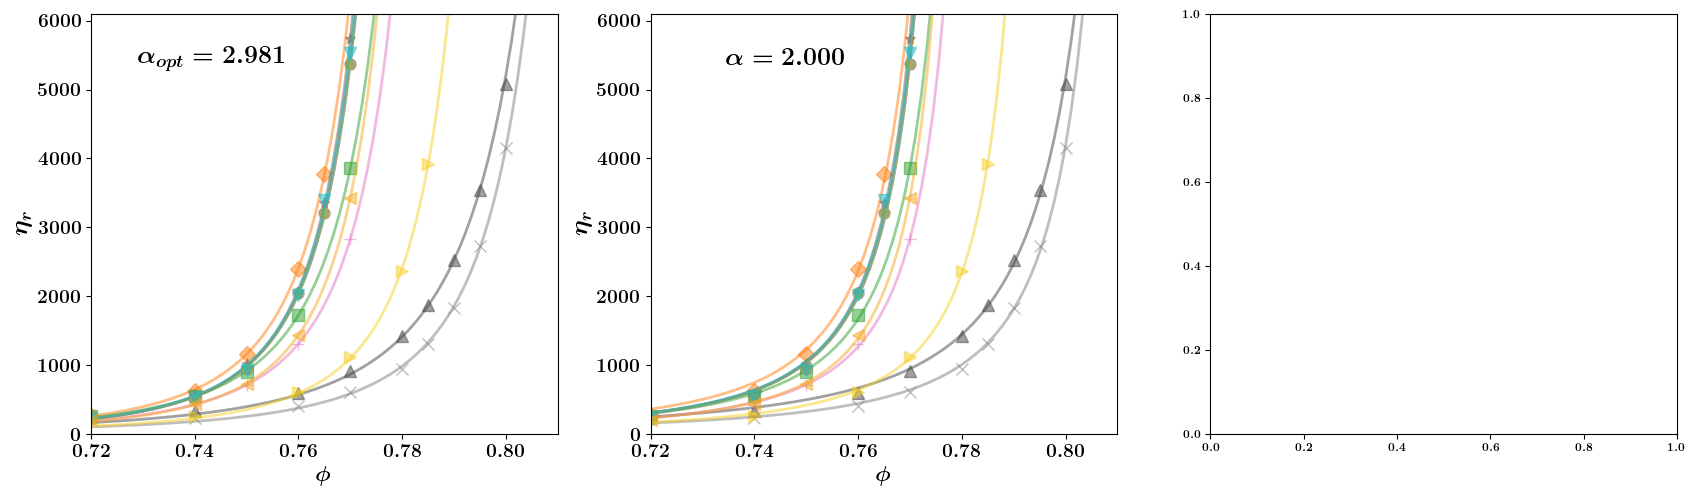

In [54]:
## finding optimum alpha

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def powerlaw(phi, k, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (base ** -alpha)

colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
marker_size  = [ 8,   8,   8,   8,   8,   8,   8,   8,   8,   8 ,  8 ,  8,   8 ]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100
phim_guess = [[.785, .785, .792, 0.82],
           [.785, .785, .792, 0.815],
           [.785, .785, .792, 0.8]]

fig, ax = plt.subplots(1, 3, figsize=(17, 5))

##################################
# Fig 1: Optimum alpha

alphas = np.linspace(1.99, 3.5, 100)  # Search range for alpha
# best_alpha = None
# best_err   = np.inf

# mse_all = []
# for alpha in alphas:
#     total_err = 0
#     count = 0
#     for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
#         for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
#             visc = []
#             for phi in phiv:  # Assuming phiv is defined
#                 phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
#                 visc_list = []
#                 for run in range(numRuns):  # Assuming numRuns defined
#                     vrj_used = '0.25' if arj == 1 else vrj
#                     workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
#                     if os.path.exists(workDir):
#                         dataFile = glob.glob(workDir + "data_*.dat")
#                         if dataFile:
#                             data = np.loadtxt(dataFile[0])
#                             if len(data[off:, 3]) > off:  # Assuming off defined
#                                 visc_val = np.mean(data[off:, 3])
#                                 visc_list.append(visc_val)
#                 avg_visc = np.mean(visc_list) if visc_list else np.nan
#                 visc.append(avg_visc)
#             # Filter out nans
#             visc_filtered     = [x for x in visc if not np.isnan(x)]
#             phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

#             if len(visc_filtered) >= 2:
#                 popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[i][j]])
#                 k_opt, phim_opt = popt
#                 fit_vals = powerlaw(np.array(phi_vals_filtered), k_opt, phim_opt)
#                 err = np.sum((fit_vals - visc_filtered) ** 2)
#                 total_err += err
#                 count += len(phi_vals_filtered)
#                 #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
#     if count > 0:
#         mse = total_err / count
#         mse_all.append(mse)
#         #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
#         if mse < best_err:
#             best_err   = mse
#             best_alpha = alpha

#print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

# --- Main plotting ---

k_all, phim_all = [], []
best_alpha= 2.9814
alpha = best_alpha
s=0

for i, vri in enumerate(vrr):
    k_list=[]
    phim_list=[]
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
            k_opt, phim_opt = popt
            k_list.append(k_opt)
            phim_list.append(phim_opt)

            ax[0].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s])
           
            xx = np.linspace(0.70, .81, 100)
            yy = powerlaw(xx, k_opt, phim_opt)
            ax[0].plot(xx, yy, color=colors[s], linewidth=line_width, alpha =0.5)
            s+=1
    k_all.append(k_list)
    phim_all.append(phim_list)
    
# Labels and formatting
ax[0].set_ylim(0, 6100)
ax[0].set_xlim(0.72, 0.81)
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].text(0.42, 0.92, fr'$\alpha_{{opt}} = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

#kvals = k_all
############
# Fig 2: plot for slpah =2

alpha = 2
s=0
for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
            k_opt, phim_opt = popt
            #k_all.append(k_opt)
            #phim_all.append(phim_opt)

            ax[1].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s])
            
            xx = np.linspace(0.70, .81, 100)
            yy = powerlaw(xx, k_opt, phim_opt)
            ax[1].plot(xx, yy, color=colors[s], linewidth=line_width, alpha =0.5)
            s+=1

# Labels and formatting
ax[1].set_ylim(0, 6100)
ax[1].set_xlim(0.72, 0.81)
ax[1].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[1].set_ylabel(r'$\eta_{r}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].text(0.42, 0.92, fr'$\alpha = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[1].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

#########
# Fig 3: mse space
try:
    ax[2].plot(alphas, mse_all, linewidth=1.5)
    ax[2].set_xlabel(r'$\alpha$', fontsize=15)
    ax[2].set_ylabel(r'$\textbf{MSE}$', fontsize=15)
    #plt.ticks_params(axis='both', which='major', fontsize=15)
    ax[2].tick_params(axis='both', which='major', labelsize=15)
    
    min_idx = np.argmin(mse_all)
    best_alpha = alphas[min_idx]
    ax[2].axvline(x=best_alpha, color='r', linestyle='--', linewidth=1.2)
    ax[2].text(best_alpha + 0.03,   # x
               min(mse_all) * 1.5,  # y
               fr'$\alpha_{{opt}} = {best_alpha:.3f}$',
               color='r', fontsize=16,
               ha='left', va='bottom',
               rotation=90)
except:
    None
    
if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/alpha_opt_powerlaw{figFormat}', bbox_inches="tight",dpi=800)
    
plt.show()

In [55]:
df = pd.DataFrame(k_all, index=[f"ζ = {z}" for z in vrr], columns=[f"δ = {d}" for d in arr])
print('K values')
print(df.round(3))

K values
          δ = 1.0  δ = 1.4  δ = 2.0  δ = 4.0
ζ = 0.25    0.197    0.235    0.266    0.454
ζ = 0.5     0.197    0.187    0.225    0.256
ζ = 0.75    0.197    0.197    0.183    0.175


In [56]:
df = pd.DataFrame(phim_all, index=[f"ζ = {z}" for z in vrr], columns=[f"δ = {d}" for d in arr])
print('phim values')
print(df.round(3))

phim values
          δ = 1.0  δ = 1.4  δ = 2.0  δ = 4.0
ζ = 0.25    0.796    0.796    0.802    0.836
ζ = 0.5     0.796    0.795    0.804    0.832
ζ = 0.75    0.796    0.796    0.799    0.813


In [50]:
## Finding MSE for alpha =2 using unscaled visc


alpha = 2

total_err = 0
count = 0
for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
    for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
        visc = []
        for phi in phiv:  # Assuming phiv is defined
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):  # Assuming numRuns defined
                vrj_used = '0.25' if arj == 1 else vrj
                workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")
                    if dataFile:
                        data = np.loadtxt(dataFile[0])
                        if len(data[off:, 3]) > off:  # Assuming off defined
                            visc_val = np.mean(data[off:, 3])
                            visc_list.append(visc_val)
            avg_visc = np.mean(visc_list) if visc_list else np.nan
            visc.append(avg_visc)
        # Filter out nans
        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

        if len(visc_filtered) >= 2:
            popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[i][j]])
            k_opt, phim_opt = popt
            fit_vals = powerlaw(np.array(phi_vals_filtered), k_opt, phim_opt)
            err = np.sum((fit_vals - visc_filtered) ** 2)
            total_err += err
            count += len(phi_vals_filtered)
            #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
    if count > 0:
        mse = total_err / count
        
print(fr"$\alpha {alpha:.3f} -> MSE: {mse:.6f}$")

$\alpha 2.0000 -> MSE: 4848.322713$


In [ ]:
# frig for mu=1 and other counterpart

topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/")
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = '0.5'
numRuns = 2
off = 100

for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = []
        paramserr = []
        zm = []
        for k, phi in enumerate(phiv):
            phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = []
            paramserr_list = []
            zlist = []
            for run in range(numRuns):
                phim_vals     = [(i - phim[l][j+1]) for i in phiv]
                workDir       = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                frigFile = workDir+"F_rig.txt"
                if os.path.exists(frigFile):
                    frigFile = workDir+"F_rig.txt"
                    frig     = np.loadtxt(frigFile)/ npp

                    znetFile = workDir+"Z_Znet.txt"
                    znet     = np.loadtxt(znetFile)[:, 2]
                    
                    if len(frig) > off:
                        param_list.append(np.mean(frig[off:]))
                        paramserr_list.append(np.var(frig[off:]))
                        zlist.append(np.mean(znet[off:]))
                    else:
                        param_list.append(np.nan)
                        paramserr_list.append(np.nan)
                        zlist.append(np.nan)
                        
            # Average over runs for this phi
            param.append(np.nanmean(param_list) if param_list else np.nan)
            paramserr.append(np.nanmean(paramserr_list) if paramserr_list else np.nan)
            zm.append(np.nanmean(zlist) if zlist else np.nan)
            
        # Clean up for plotting
        param_filtered     = [x for x in param if not np.isnan(x)]
        paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
        phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
        z_filtered         = [x for x in zm if not np.isnan(x)]
        
        ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                    s=27, color=colors[pcount], alpha=0.7,  
                    label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

In [22]:
phims = np.array([[0.79560312, 0.79607566, 0.80441793, 0.83912245],
                  [0.79560312, 0.79599847, 0.80688023, 0.83789678],
                  [0.79560312, 0.79569337, 0.80173299, 0.8159366 ]])

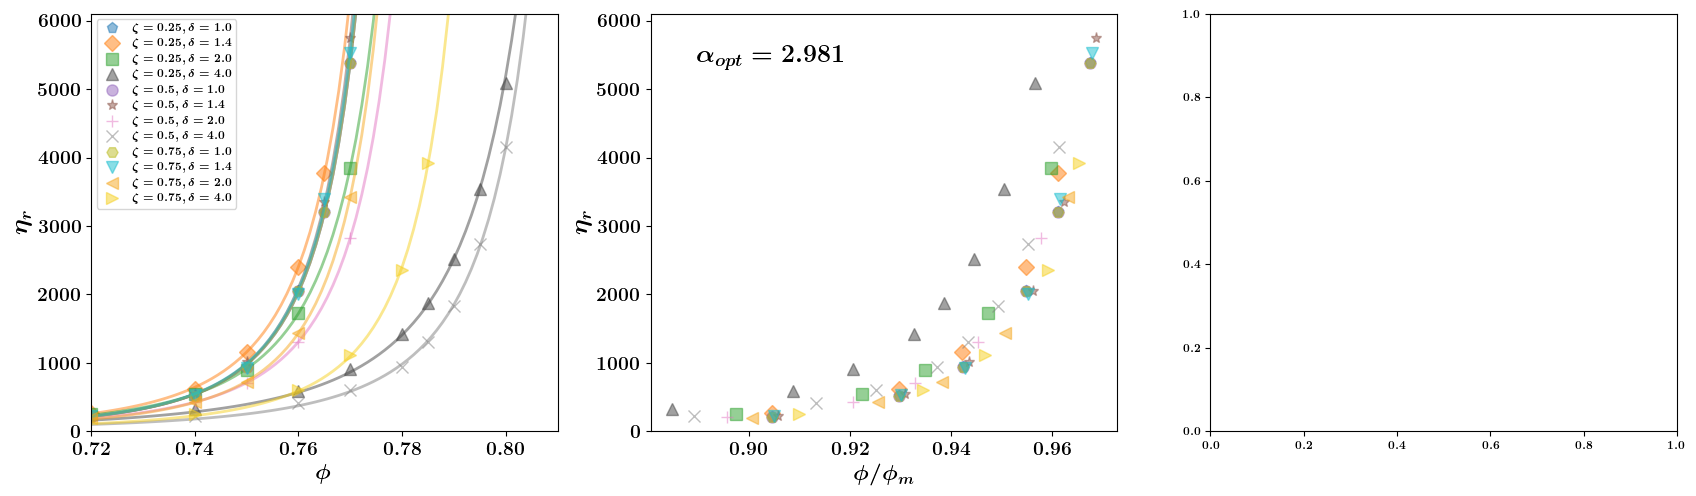

In [74]:
## finding optimum alpha

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def powerlaw(phi, k, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (base ** -alpha)

colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
marker_size  = [ 8,   8,   8,   8,   8,   8,   8,   8,   8,   8 ,  8 ,  8,   8 ]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100
phim_guess = [[.785, .785, .792, 0.82],
           [.785, .785, .792, 0.815],
           [.785, .785, .792, 0.8]]

fig, ax = plt.subplots(1, 3, figsize=(17, 5))

##################################
# Fig 1: Optimum alpha

alphas = np.linspace(1.99, 3.5, 100)  # Search range for alpha
# best_alpha = None
# best_err   = np.inf

# mse_all = []
# for alpha in alphas:
#     total_err = 0
#     count = 0
#     for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
#         for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
#             visc = []
#             for phi in phiv:  # Assuming phiv is defined
#                 phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
#                 visc_list = []
#                 for run in range(numRuns):  # Assuming numRuns defined
#                     vrj_used = '0.25' if arj == 1 else vrj
#                     workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
#                     if os.path.exists(workDir):
#                         dataFile = glob.glob(workDir + "data_*.dat")
#                         if dataFile:
#                             data = np.loadtxt(dataFile[0])
#                             if len(data[off:, 3]) > off:  # Assuming off defined
#                                 visc_val = np.mean(data[off:, 3])
#                                 visc_list.append(visc_val)
#                 avg_visc = np.mean(visc_list) if visc_list else np.nan
#                 visc.append(avg_visc)
#             # Filter out nans
#             visc_filtered     = [x for x in visc if not np.isnan(x)]
#             phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

#             if len(visc_filtered) >= 2:
#                 popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[i][j]])
#                 k_opt, phim_opt = popt
#                 fit_vals = powerlaw(np.array(phi_vals_filtered), k_opt, phim_opt)
#                 err = np.sum((fit_vals - visc_filtered) ** 2)
#                 total_err += err
#                 count += len(phi_vals_filtered)
#                 #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
#     if count > 0:
#         mse = total_err / count
#         mse_all.append(mse)
#         #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
#         if mse < best_err:
#             best_err   = mse
#             best_alpha = alpha

#print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

# --- Main plotting ---

k_all, phim_all = [], []
best_alpha= 2.9814
alpha = best_alpha
s=0

for i, vri in enumerate(vrr):
    k_list=[]
    phim_list=[]
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
            k_opt, phim_opt = popt
            k_list.append(k_opt)
            phim_list.append(phim_opt)

            ax[0].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s],
                    label = fr'$\zeta = {vri}, \delta = {arj}$')
           
            xx = np.linspace(0.70, .81, 100)
            yy = powerlaw(xx, k_opt, phim_opt)
            ax[0].plot(xx, yy, color=colors[s], linewidth=line_width, alpha =0.5)
            s+=1
    k_all.append(k_list)
    phim_all.append(phim_list)
    
# Labels and formatting
ax[0].set_ylim(0, 6100)
ax[0].set_xlim(0.72, 0.81)
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
# ax[0].text(0.42, 0.92, fr'$\alpha_{{opt}} = {alpha:.3f}$',
#         fontsize=18, ha='right', va='top',
#         transform=ax[0].transAxes,
#         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
ax[0].legend()
#kvals = k_all
############
# Fig 2: plot for slpah =2

#alpha = 2
s=0
for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y/phim_all[i][j] for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
        #     popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
        #     k_opt, phim_opt = popt
            #k_all.append(k_opt)
            #phim_all.append(phim_opt)

            ax[1].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s])
            
            # xx = np.linspace(0.70, .81, 100)
            # yy = powerlaw(xx, k_opt, phim_opt)
            # ax[1].plot(xx, yy, color=colors[s], linewidth=line_width, alpha =0.5)
            s+=1

# Labels and formatting
ax[1].set_ylim(0, 6100)
#ax[1].set_xlim(0.72, 0.81)
ax[1].set_xlabel(r'$\phi/\phi_m$', fontsize=16, fontstyle='italic')
ax[1].set_ylabel(r'$\eta_{r}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].text(0.42, 0.92, fr'$\alpha_{{opt}} = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[1].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

#########
# Fig 3: mse space
try:
    ax[2].plot(alphas, mse_all, linewidth=1.5)
    ax[2].set_xlabel(r'$\alpha$', fontsize=15)
    ax[2].set_ylabel(r'$\textbf{MSE}$', fontsize=15)
    #plt.ticks_params(axis='both', which='major', fontsize=15)
    ax[2].tick_params(axis='both', which='major', labelsize=15)
    
    min_idx = np.argmin(mse_all)
    best_alpha = alphas[min_idx]
    ax[2].axvline(x=best_alpha, color='r', linestyle='--', linewidth=1.2)
    ax[2].text(best_alpha + 0.03,   # x
               min(mse_all) * 1.5,  # y
               fr'$\alpha_{{opt}} = {best_alpha:.3f}$',
               color='r', fontsize=16,
               ha='left', va='bottom',
               rotation=90)
except:
    None
    
if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/alpha_opt_powerlaw{figFormat}', bbox_inches="tight",dpi=800)
    
plt.show()

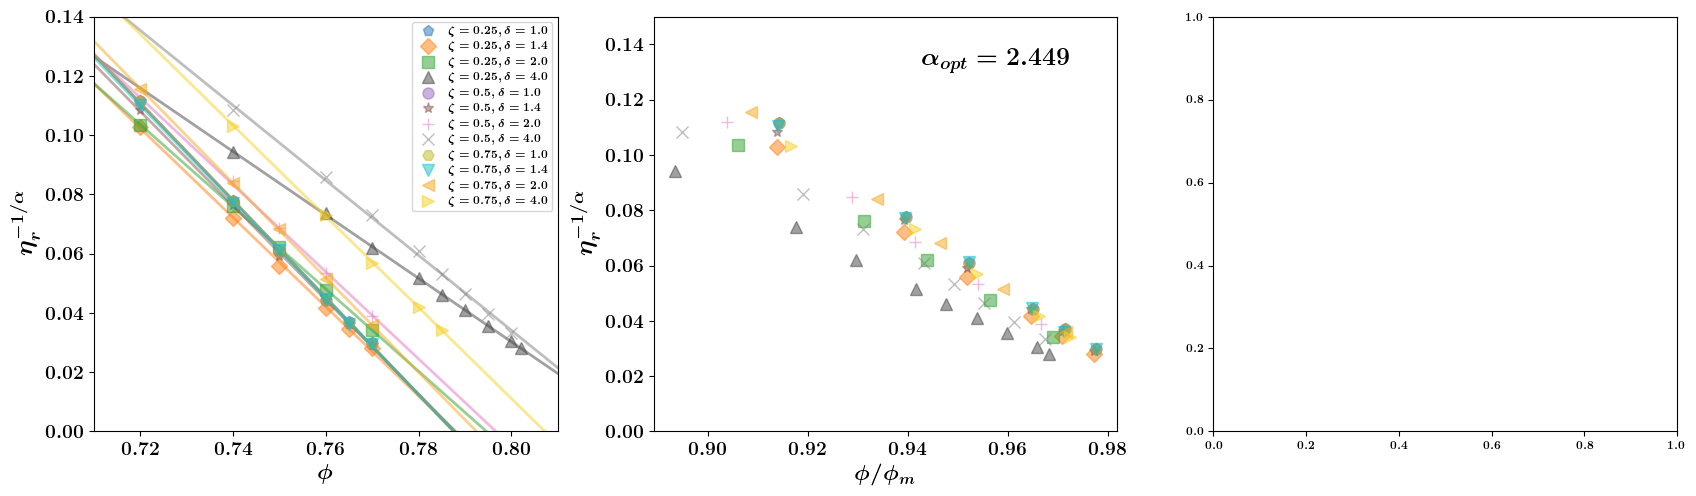

In [78]:
## finding optimum alpha using scaled alpha

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def powerlaw(phi, k, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (base ** -alpha)

def linearfit(phi, c, m):
    return c + m * phi

colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
marker_size  = [ 8,   8,   8,   8,   8,   8,   8,   8,   8,   8 ,  8 ,  8,   8 ]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100
phim_guess = [[.785, .785, .792, 0.82],
           [.785, .785, .792, 0.815],
           [.785, .785, .792, 0.8]]

fig, ax = plt.subplots(1, 3, figsize=(17, 5))

##################################
#Fig 1: Optimum alpha

# alphas = np.linspace(1.95, 3, 100)  # Search range for alpha
# best_alpha = None
# best_err   = np.inf

# mse_all = []
# for alpha in alphas:
#     total_err = 0
#     count = 0
#     for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
#         for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
#             visc = []
#             for phi in phiv:  # Assuming phiv is defined
#                 phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
#                 visc_list = []
#                 for run in range(numRuns):  # Assuming numRuns defined
#                     vrj_used = '0.25' if arj == 1 else vrj
#                     workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
#                     if os.path.exists(workDir):
#                         dataFile = glob.glob(workDir + "data_*.dat")
#                         if dataFile:
#                             data = np.loadtxt(dataFile[0])
#                             if len(data[off:, 3]) > off:  # Assuming off defined
#                                 visc_val = np.mean(data[off:, 3])
#                                 visc_list.append(visc_val)
#                 avg_visc = np.mean(visc_list) if visc_list else np.nan
#                 visc.append(avg_visc)
#             # Filter out nans
#             visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
#             phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

#             if len(visc_filtered) >= 2:
#                 popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[i][j]])
#                 k_opt, phim_opt = popt
#                 fit_vals = linearfit(np.array(phi_vals_filtered), k_opt, phim_opt)
#                 err = np.sum((fit_vals - visc_filtered) ** 2)
#                 total_err += err
#                 count += len(phi_vals_filtered)
#                 #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
#     if count > 0:
#         mse = total_err / count
#         mse_all.append(mse)
#         #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
#         if mse < best_err:
#             best_err   = mse
#             best_alpha = alpha

#print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

# --- Main plotting ---

k_all, phim_all = [], []
best_alpha = 2.4485
alpha = best_alpha
s = 0

for i, vri in enumerate(vrr):
    k_list = []
    phim_list = []
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
            k_opt, phim_opt = popt
            k_list.append(k_opt)
            phim_list.append(phim_opt)

            ax[0].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s],
                      label=fr'$\zeta={vri}, \delta={arj}$')
           
            xx = np.linspace(0.70, .81, 100)
            yy = linearfit(xx, k_opt, phim_opt)
            ax[0].plot(xx, yy, color=colors[s], linewidth=line_width, alpha=0.5)
            s+=1
    k_all.append(k_list)
    phim_all.append(phim_list)
    
# Labels and formatting
ax[0].set_ylim(0, 0.14)
ax[0].set_xlim(0.71, 0.81)
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[0].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
# ax[0].text(0.9, 0.92, fr'$\alpha_{{opt}} = {alpha:.3f}$',
#         fontsize=18, ha='right', va='top',
#         transform=ax[0].transAxes,
#         bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
ax[0].legend()

phim_all = -np.array(k_all)/np.array(phim_all)

####################################################################################
# Fig 2: plot for slpah =2

#alpha = 2
s=0
for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y/phim_all[i][j] for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            # popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[i][j]])
            # k_opt, phim_opt = popt
            # #k_all.append(k_opt)
            #phim_all.append(phim_opt)

            ax[1].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.5,
                    marker=marker_shape[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s])
            
            # xx = np.linspace(0.70, .81, 100)
            # yy = linearfit(xx, k_opt, phim_opt)
            # ax[1].plot(xx, yy, color=colors[s], linewidth=line_width, alpha =0.5)
            s+=1

# Labels and formatting
ax[1].set_ylim(0, 0.15)
#ax[1].set_xlim(0.71, 0.81)
ax[1].set_xlabel(r'$\phi/\phi_m$', fontsize=16, fontstyle='italic')
ax[1].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].text(0.9, 0.92, fr'$\alpha_{{opt}} = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[1].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

#print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

#########
# Fig 3: mse space

try:
    ax[2].plot(alphas, mse_all, linewidth=1.5)
    ax[2].set_xlabel(r'$\alpha$', fontsize=15)
    ax[2].set_ylabel(r'$\textbf{MSE}$', fontsize=15)
    #plt.ticks_params(axis='both', which='major', fontsize=15)
    ax[2].tick_params(axis='both', which='major', labelsize=15)
    min_idx = np.argmin(mse_all)
    #best_alpha = alphas[min_idx]
    ax[2].axvline(x=best_alpha, color='r', linestyle='--', linewidth=1.5)
    ax[2].text(best_alpha + 0.03,   # x
               min(mse_all) * 1.7,  # y
               fr'$\alpha_{{opt}} = {best_alpha:.3f}$',
               color='r', fontsize=16,
               ha='left', va='bottom',
               rotation=90)
except:
    None


if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/alpha_opt_linear{figFormat}', bbox_inches="tight",dpi=800)
    
plt.show()

In [ ]:
## finding optimum alpha

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define linear fit
def linearfit(phi, c, m):
    return c + m * phi

# def powerlaw(phi, k, phim):
#     return k*(1 + (phi/phim))**-alpha

def powerlaw(phi, k, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Prevent negative or zero base
    return k * (base ** -alpha)


# Color and marker settings
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns    = 2
off        = 100
phim_guess = [[.784, .785, .791, 0.824],
              [.784, .785, .793, 0.823],
              [.784, .785, .789, 0.804]]


alphas     = np.linspace(1.99, 4.5, 100)  # Search range for alpha
best_alpha = None
best_err   = np.inf

mse_all = []
for alpha in alphas:
    total_err = 0
    count = 0
    for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
        for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
            visc = []
            for phi in phiv:  # Assuming phiv is defined
                phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                visc_list = []
                for run in range(numRuns):  # Assuming numRuns defined
                    vrj_used = '0.25' if arj == 1 else vrj
                    workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                    if os.path.exists(workDir):
                        dataFile = glob.glob(workDir + "data_*.dat")
                        if dataFile:
                            data = np.loadtxt(dataFile[0])
                            if len(data[off:, 3]) > off:  # Assuming off defined
                                visc_val = np.mean(data[off:, 3])
                                visc_list.append(visc_val)
                avg_visc = np.mean(visc_list) if visc_list else np.nan
                visc.append(avg_visc)
            # Filter out nans
            visc_filtered     = [x for x in visc if not np.isnan(x)]
            phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

            if len(visc_filtered) >= 2:
                popt, _ = curve_fit(powerlaw, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[i][j]])
                k_opt, phim_opt = popt
                fit_vals = powerlaw(np.array(phi_vals_filtered), k_opt, phim_opt)
                err = np.sum((fit_vals - visc_filtered) ** 2)
                total_err += err
                count += len(phi_vals_filtered)
                #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
    if count > 0:
        mse = total_err / count
        mse_all.append(mse)
        #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
        if mse < best_err:
            best_err   = mse
            best_alpha = alpha

print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

Best alpha found: 2.9788 with MSE: 1124.2346


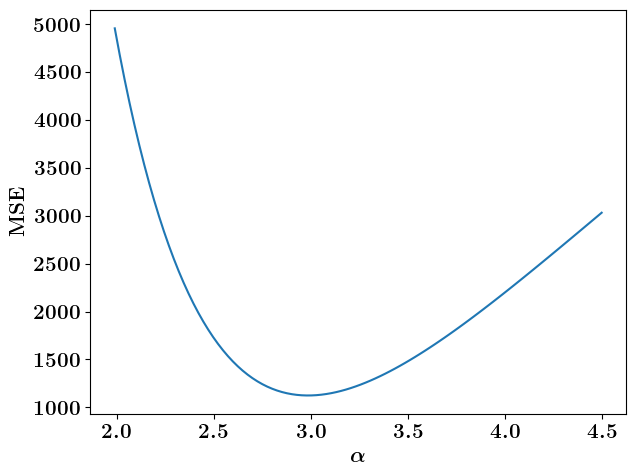

In [19]:
print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")
plt.plot(alphas, mse_all, linewidth=1.5)
plt.xlabel(r'$\alpha$', fontsize=15)
plt.ylabel(r'$\textbf{MSE}$', fontsize=15)
#plt.ticks_params(axis='both', which='major', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [8]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

# --- Power law with fixed alpha & k ---
def powerlaw(phi, k, alpha, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Avoid negative/zero
    return k * (base ** -alpha)

# Parameters
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100
phim_guess = [[.785, .785, .792, 0.82],
              [.785, .785, .792, 0.815],
              [.785, .785, .792, 0.8]]

alphas = np.linspace(1.5, 2.4, 30)
ks     = np.linspace(3, 8, 30)

mse_matrix = np.zeros((len(alphas), len(ks)))

# Loop over alpha and k
for ai, alpha in enumerate(alphas):
    for ki, k in enumerate(ks):
        total_err = 0
        count     = 0
        
        # Loop over datasets
        for i, vrj in enumerate(vrr):
            for j, arj in enumerate(arr):
                visc = []
                for phi in phiv:
                    phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                    visc_list = []
                    for run in range(numRuns):
                        vrj_used = '0.25' if arj == 1 else vrj
                        workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                        if os.path.exists(workDir):
                            dataFile = glob.glob(workDir + "data_*.dat")
                            if dataFile:
                                data = np.loadtxt(dataFile[0])
                                if len(data[off:, 3]) > 0:
                                    visc_val = np.mean(data[off:, 3])
                                    visc_list.append(visc_val)
                    avg_visc = np.mean(visc_list) if visc_list else np.nan
                    visc.append(avg_visc)
                
                visc_filtered     = [x for x in visc if not np.isnan(x)]
                phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
                
                if len(visc_filtered) >= 2:
                    phim_val = phim_guess[i][j]
                    fit_vals = powerlaw(np.array(phi_vals_filtered), k, alpha, phim_val)
                    err = np.sum((fit_vals - visc_filtered) ** 2)
                    total_err += err
                    count += len(phi_vals_filtered)

        mse_matrix[ai, ki] = total_err / count if count > 0 else np.nan

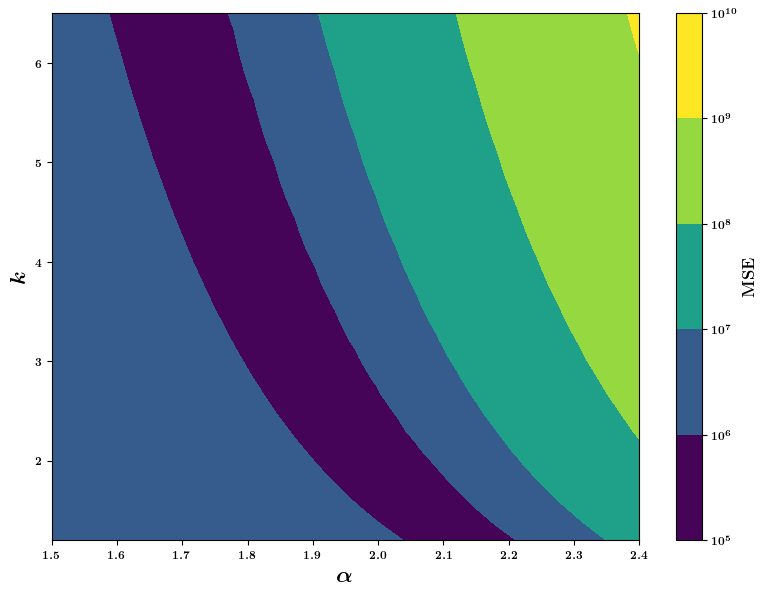

Best alpha: 1.779
Best k: 4.672
Min MSE: 2.94e+05


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# --- Surface/contour plot in log scale ---
A, K = np.meshgrid(ks, alphas)

plt.figure(figsize=(8, 6))
cp = plt.contourf(
    K, A, mse_matrix,
    levels=50,
    cmap="viridis",
    norm=LogNorm(vmin=np.nanmin(mse_matrix), vmax=np.nanmax(mse_matrix))
)
cbar = plt.colorbar(cp)
cbar.set_label(r"$\textbf{MSE}$", fontsize=12)
plt.xlabel(r"$\alpha$", fontsize=16)
plt.ylabel(r"$k$", fontsize=16)
#plt.title("MSE surface for alpha vs k (log scale)")
plt.show()

# Find minimum
min_idx = np.nanargmin(mse_matrix)
min_alpha_idx, min_k_idx = np.unravel_index(min_idx, mse_matrix.shape)
print(f"Best alpha: {alphas[min_alpha_idx]:.3f}")
print(f"Best k: {ks[min_k_idx]:.3f}")
print(f"Min MSE: {mse_matrix[min_alpha_idx, min_k_idx]:.2e}")

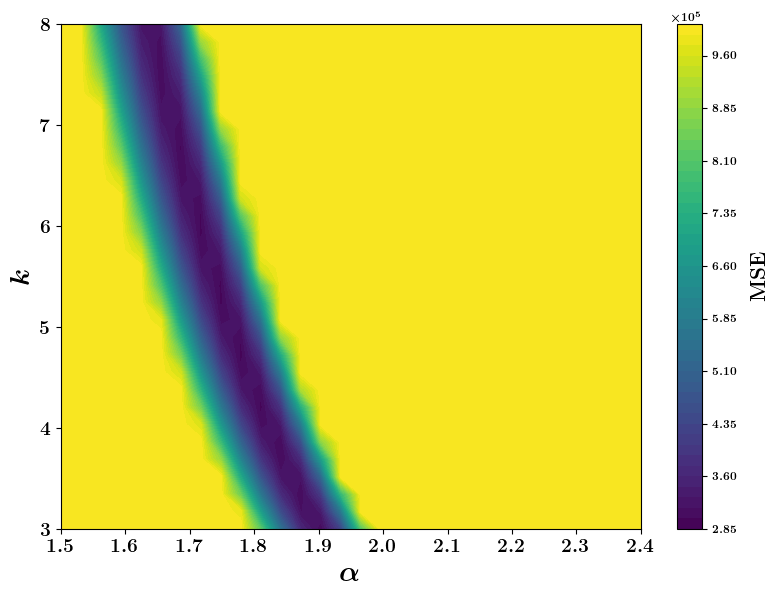

Best alpha: 1.779
Best k: 4.724
Min MSE: 2.93e+05


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- Clip MSE matrix to max value 1e6 ---
mse_clipped = np.clip(mse_matrix, a_min=None, a_max=1e6)

# --- Surface/contour plot ---
A, K = np.meshgrid(ks, alphas)

plt.figure(figsize=(8, 6))
cp = plt.contourf(
    K, A, mse_clipped,
    levels=50,
    cmap="viridis"
)
cbar = plt.colorbar(cp)
cbar.set_label(r"$\textbf{MSE}$", fontsize=15, labelpad=10)
cbar.formatter = ticker.ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((0, 0))  # Always use scientific notation
cbar.update_ticks()

plt.xlabel(r"$\alpha$", fontsize=20)
plt.ylabel(r"$k$", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)  # 14 pt font
#plt.title("MSE surface for alpha vs k (linear scale, clipped at 1e6)")
plt.show()

# Find minimum
min_idx = np.nanargmin(mse_matrix)  # still use original for min
min_alpha_idx, min_k_idx = np.unravel_index(min_idx, mse_matrix.shape)
print(f"Best alpha: {alphas[min_alpha_idx]:.3f}")
print(f"Best k: {ks[min_k_idx]:.3f}")
print(f"Min MSE: {mse_matrix[min_alpha_idx, min_k_idx]:.2e}")

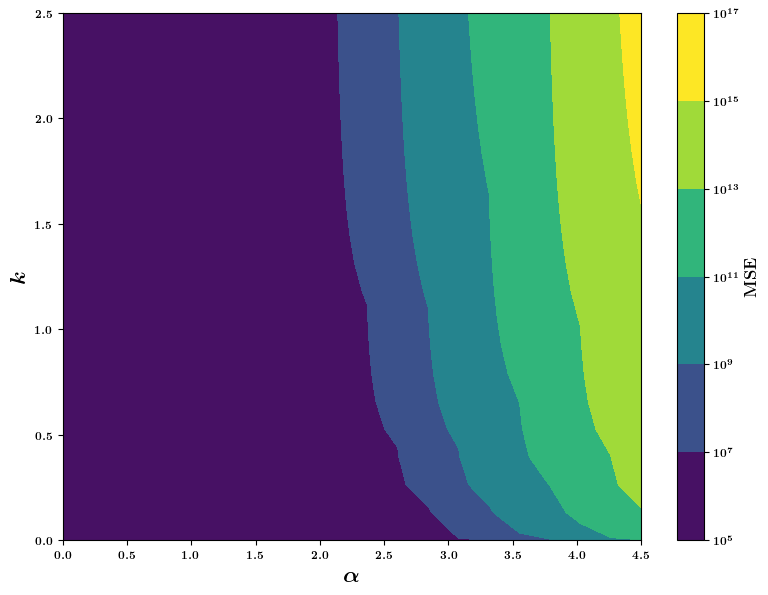

Best alpha: 2.132
Best k: 1.184
Min MSE: 3.68e+05


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# --- Surface/contour plot ---
A, K = np.meshgrid(ks, alphas)

plt.figure(figsize=(8, 6))
cp = plt.contourf(
    K, A, mse_matrix,
    levels=50,
    cmap="viridis",
    norm=LogNorm(vmin=np.nanmin(mse_matrix), vmax=np.nanmax(mse_matrix))
)
cbar = plt.colorbar(cp)
cbar.set_label(r"$\textbf{MSE}$", fontsize=12)
plt.xlabel(r"$\alpha$", fontsize=16)
plt.ylabel(r"$k$", fontsize=16)
#plt.title("MSE surface for alpha vs k (log scale)")
plt.show()

# Find minimum
min_idx = np.nanargmin(mse_matrix)
min_alpha_idx, min_k_idx = np.unravel_index(min_idx, mse_matrix.shape)
print(f"Best alpha: {alphas[min_alpha_idx]:.3f}")
print(f"Best k: {ks[min_k_idx]:.3f}")
print(f"Min MSE: {mse_matrix[min_alpha_idx, min_k_idx]:.2e}")

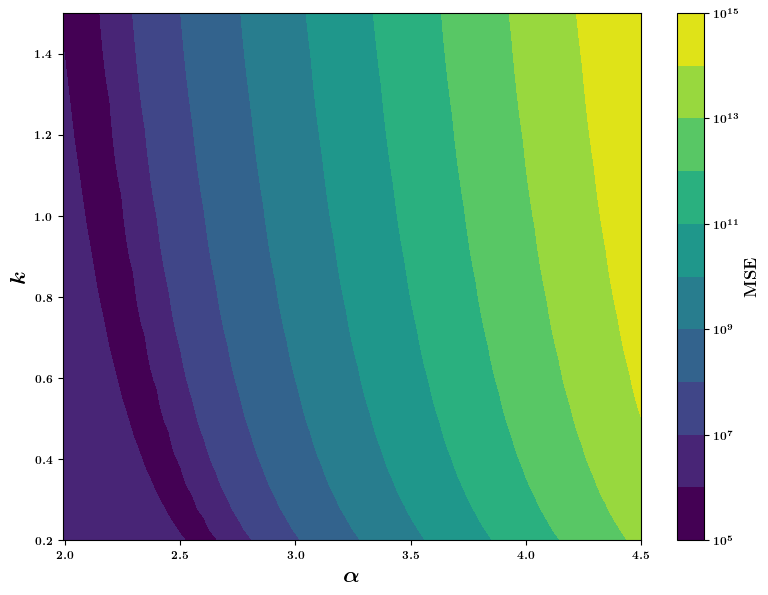

Best alpha: 2.092
Best k: 1.447
Min MSE: 3.42e+05


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# --- Surface/contour plot ---
A, K = np.meshgrid(ks, alphas)

plt.figure(figsize=(8, 6))
cp = plt.contourf(
    K, A, mse_matrix,
    levels=50,
    cmap="viridis",
    norm=LogNorm(vmin=np.nanmin(mse_matrix), vmax=np.nanmax(mse_matrix))
)
cbar = plt.colorbar(cp)
cbar.set_label(r"$\textbf{MSE}$", fontsize=12)
plt.xlabel(r"$\alpha$", fontsize=16)
plt.ylabel(r"$k$", fontsize=16)
#plt.title("MSE surface for alpha vs k (log scale)")
plt.show()

# Find minimum
min_idx = np.nanargmin(mse_matrix)
min_alpha_idx, min_k_idx = np.unravel_index(min_idx, mse_matrix.shape)
print(f"Best alpha: {alphas[min_alpha_idx]:.3f}")
print(f"Best k: {ks[min_k_idx]:.3f}")
print(f"Min MSE: {mse_matrix[min_alpha_idx, min_k_idx]:.2e}")

In [38]:
phim_arr = np.array(phim_all).reshape(3, 4)
phim_arr

array([[0.79393214, 0.79401501, 0.79982593, 0.83375916],
       [0.79393214, 0.7929937 , 0.80132705, 0.82978286],
       [0.79393214, 0.79364567, 0.79722089, 0.81113498]])

In [33]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

# --- Power law with fixed alpha & k ---
def powerlaw(phi, k, alpha, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Avoid negative/zero
    return k * (base ** -alpha)

# Parameters
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100
phim_guess = [[.785, .785, .792, 0.82],
              [.785, .785, .792, 0.815],
              [.785, .785, .792, 0.8]]

alphas = np.linspace(1.5, 2.4, 30)
ks     = np.linspace(3, 8, 30)

mse_matrix = np.zeros((len(alphas), len(ks)))

# Loop over alpha and k
for ai, alpha in enumerate(alphas):
    for ki, k in enumerate(ks):
        total_err = 0
        count     = 0
        
        # Loop over datasets
        for i, vrj in enumerate(vrr):
            for j, arj in enumerate(arr):
                visc = []
                for phi in phiv:
                    phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                    visc_list = []
                    for run in range(numRuns):
                        vrj_used = '0.25' if arj == 1 else vrj
                        workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                        if os.path.exists(workDir):
                            dataFile = glob.glob(workDir + "data_*.dat")
                            if dataFile:
                                data = np.loadtxt(dataFile[0])
                                if len(data[off:, 3]) > 0:
                                    visc_val = np.mean(data[off:, 3])
                                    visc_list.append(visc_val)
                    avg_visc = np.mean(visc_list) if visc_list else np.nan
                    visc.append(avg_visc)
                
                visc_filtered     = [x for x in visc if not np.isnan(x)]
                phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
                
                if len(visc_filtered) >= 2:
                    phim_val = phim_guess[i][j]
                    fit_vals = powerlaw(np.array(phi_vals_filtered), k, alpha, phim_val)
                    err = np.sum((fit_vals - visc_filtered) ** 2)
                    total_err += err
                    count += len(phi_vals_filtered)

        mse_matrix[ai, ki] = total_err / count if count > 0 else np.nan

NoneType

In [32]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

# --- Power law with fixed alpha & k ---
def powerlaw(phi, k, alpha, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Avoid negative/zero
    return k * (base ** -alpha)

# Parameters
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100
phim_guess = [[.785, .785, .792, 0.82],
              [.785, .785, .792, 0.815],
              [.785, .785, .792, 0.8]]

alphas = np.linspace(1.5, 2.4, 30)
#ks     = np.linspace(3, 8, 30)
ks     = np.linspace(1, 5, 5)

mse_matrix = np.zeros((len(alphas), len(ks)))

# Loop over alpha and k
for ai, alpha in enumerate(alphas):
    for ki, k in enumerate(ks):
        total_err = 0
        count     = 0
        
        # Loop over datasets
        for i, vrj in enumerate(vrr):
            for j, arj in enumerate(arr):
                visc = []
                for phi in phiv:
                    phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                    visc_list = []
                    for run in range(numRuns):
                        vrj_used = '0.25' if arj == 1 else vrj
                        workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                        if os.path.exists(workDir):
                            dataFile = glob.glob(workDir + "data_*.dat")
                            if dataFile:
                                data = np.loadtxt(dataFile[0])
                                if len(data[off:, 3]) > 0:
                                    visc_val = np.mean(data[off:, 3])
                                    visc_list.append(visc_val)
                    avg_visc = np.mean(visc_list) if visc_list else np.nan
                    visc.append(avg_visc)
                
                visc_filtered     = [x for x in visc if not np.isnan(x)]
                phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
                
                if len(visc_filtered) >= 2:
                    phim_val = phim_guess[i][j]
                    fit_vals = powerlaw(np.array(phi_vals_filtered), k, alpha, phim_val)
                    err = np.sum((fit_vals - visc_filtered) ** 2)
                    total_err += err
                    count += len(phi_vals_filtered)

        mse_matrix[ai, ki] = total_err / count if count > 0 else np.nan

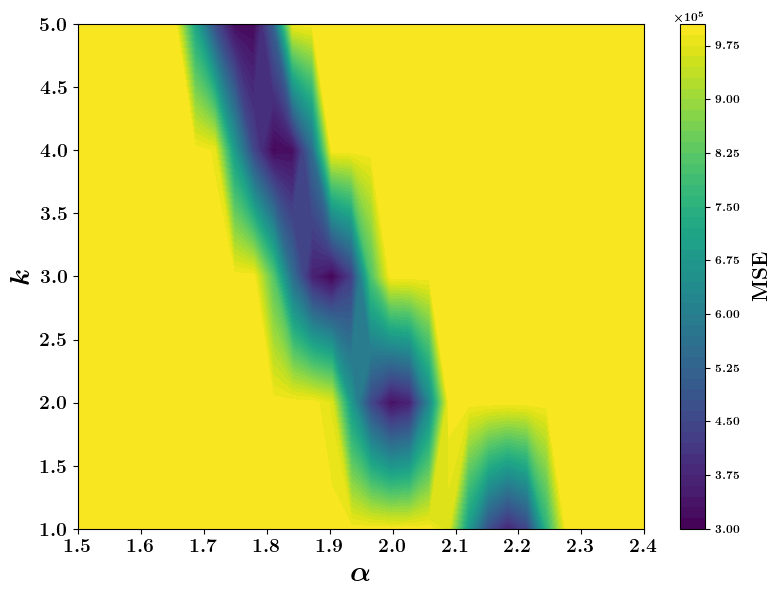

Best alpha: 1.903
Best k: 3.000
Min MSE: 3.03e+05


In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# --- Clip MSE matrix to max value 1e6 ---
mse_clipped = np.clip(mse_matrix, a_min=None, a_max=1e6)

# --- Surface/contour plot ---
A, K = np.meshgrid(ks, alphas)

plt.figure(figsize=(8, 6))
cp = plt.contourf(
    K, A, mse_clipped,
    levels=50,
    cmap="viridis"
)
cbar = plt.colorbar(cp)
cbar.set_label(r"$\textbf{MSE}$", fontsize=15, labelpad=10)
cbar.formatter = ticker.ScalarFormatter(useMathText=True)
cbar.formatter.set_powerlimits((0, 0))  # Always use scientific notation
cbar.update_ticks()

plt.xlabel(r"$\alpha$", fontsize=20)
plt.ylabel(r"$k$", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=14)  # 14 pt font
#plt.title("MSE surface for alpha vs k (linear scale, clipped at 1e6)")
plt.show()

# Find minimum
min_idx = np.nanargmin(mse_matrix)  # still use original for min
min_alpha_idx, min_k_idx = np.unravel_index(min_idx, mse_matrix.shape)
print(f"Best alpha: {alphas[min_alpha_idx]:.3f}")
print(f"Best k: {ks[min_k_idx]:.3f}")
print(f"Min MSE: {mse_matrix[min_alpha_idx, min_k_idx]:.2e}")

In [3]:
import numpy as np
import os, glob
import matplotlib.pyplot as plt

# --- Power law with fixed alpha & k ---
def powerlaw(phi, k, alpha, phim):
    base = 1 - (phi / phim)
    base = np.maximum(base, 1e-10)  # Avoid negative/zero
    return k * (base ** -alpha)

# Parameters
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100

phim_guess = [[.785, .785, .792, 0.82],
              [.785, .785, .792, 0.815],
              [.785, .785, .792, 0.8]]

alphas  = np.linspace(1.8, 3.1, 50)
ks      = [0, 0.05, 0.1, 0.25, 0.5, 1, 2, 3]
mse_all = []

# Loop over alpha and k
for ki, k in enumerate(ks):
    mse_line = []
    for ai, alpha in enumerate(alphas):
        total_err = 0
        count     = 0
        
        # Loop over datasets
        for i, vrj in enumerate(vrr):
            for j, arj in enumerate(arr):
                visc = []
                for phi in phiv:
                    phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                    visc_list = []
                    for run in range(numRuns):
                        vrj_used = '0.25' if arj == 1 else vrj
                        workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj_used}/run_{run+1}/"
                        if os.path.exists(workDir):
                            dataFile = glob.glob(workDir + "data_*.dat")
                            if dataFile:
                                data = np.loadtxt(dataFile[0])
                                if len(data[off:, 3]) > 0:
                                    visc_val = np.mean(data[off:, 3])
                                    visc_list.append(visc_val)
                    avg_visc = np.mean(visc_list) if visc_list else np.nan
                    visc.append(avg_visc)
                
                visc_filtered     = [x for x in visc if not np.isnan(x)]
                phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
                
                if len(visc_filtered) >= 2:
                    phim_val = phim_guess[i][j]
                    fit_vals = powerlaw(np.array(phi_vals_filtered), k, alpha, phim_val)
                    err = np.sum((fit_vals - visc_filtered) ** 2)
                    total_err += err
                    count += len(phi_vals_filtered)
        
        mse = total_err / count if count > 0 else np.nan
        mse_line.append(mse)
    mse_all.append(mse_line)

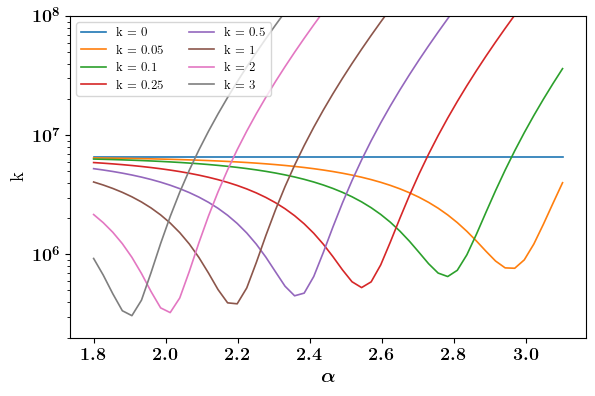

In [4]:
fig, ax = plt.subplots(figsize=(6,4))

for i in range(len(mse_all)):
    plt.plot(alphas, mse_all[i], label=f'k = {ks[i]}',
             linestyle='-', linewidth=1.2)
    
plt.legend(fontsize=9, labelspacing=0.5, loc='upper left', ncols=2)
plt.ylim(2e5, 1e8)
plt.yscale('log')
plt.xlabel(r'$\alpha$', fontsize=14)
plt.ylabel('k', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=13)
plt.show()

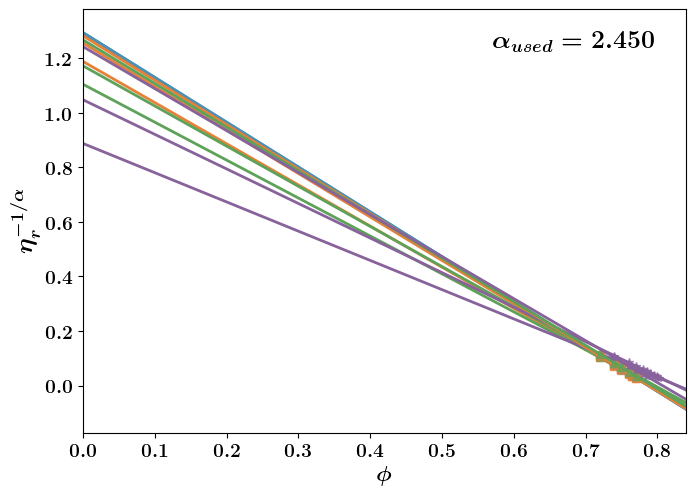

In [66]:
# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.25', '0.5', '0.75']
numRuns = 2
off = 100

# Define linear fit
def linearfit(phi, c, m):
    return c + m * phi

alpha = 2.45

c0_all, m_all = [], []
fig, ax = plt.subplots(figsize=(7, 5))

colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
line_width = 2
marker_size = [6] * len(colors)

for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                vrj = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data = np.loadtxt(dataFile)
                    if len(data[off:, 3]) > off:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
            c_opt, m_opt = popt
            c0_all.append(c_opt)
            m_all.append(m_opt)

            ax.plot(phi_vals_filtered, visc_filtered,
                    linestyle='None', alpha=0.7,
                    marker=line_markers[j],
                    color=colors[j % len(colors)],
                    linewidth=line_width,
                    markersize=marker_size[j % len(marker_size)])

            xx = np.linspace(-.01, .85, 100)
            yy = linearfit(xx, c_opt, m_opt)
            ax.plot(xx, yy, color=colors[j % len(colors)], linewidth=2)

# Labels and formatting
#ax.set_ylim(0, 0.16)
ax.set_xlim(0, 0.84)
ax.set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax.set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.text(0.95, 0.95, fr'$\alpha_{{used}} = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

plt.tight_layout()
plt.show()

In [60]:
from prettytable import PrettyTable
import numpy as np

c0_arr = np.array(c0_all)
m_arr = np.array(m_all)
x_int = -c0_arr / m_arr

t = PrettyTable(["#", "c0", "m", "-c0/m"])
for i, (c, m, x) in enumerate(zip(c0_arr, m_arr, x_int)):
    t.add_row([i, f"{c:.4f}", f"{m:.4f}", f"{x:.4f}"])
print(t)

+----+--------+---------+--------+
| #  |   c0   |    m    | -c0/m  |
+----+--------+---------+--------+
| 0  | 1.2934 | -1.6423 | 0.7876 |
| 1  | 1.1880 | -1.5077 | 0.7879 |
| 2  | 1.1044 | -1.3899 | 0.7946 |
| 3  | 0.8875 | -1.0714 | 0.8283 |
| 4  | 1.2934 | -1.6423 | 0.7876 |
| 5  | 1.2555 | -1.5934 | 0.7879 |
| 6  | 1.1719 | -1.4710 | 0.7967 |
| 7  | 1.0475 | -1.2667 | 0.8270 |
| 8  | 1.2934 | -1.6423 | 0.7876 |
| 9  | 1.2818 | -1.6273 | 0.7877 |
| 10 | 1.2671 | -1.5988 | 0.7925 |
| 11 | 1.2423 | -1.5390 | 0.8072 |
+----+--------+---------+--------+


In [30]:
visc_filtered

[0.0038393882507398234,
 0.0016541192606125714,
 0.0008949186192442793,
 0.0004233150087395526,
 0.00025474960170949367]

## Fig 3

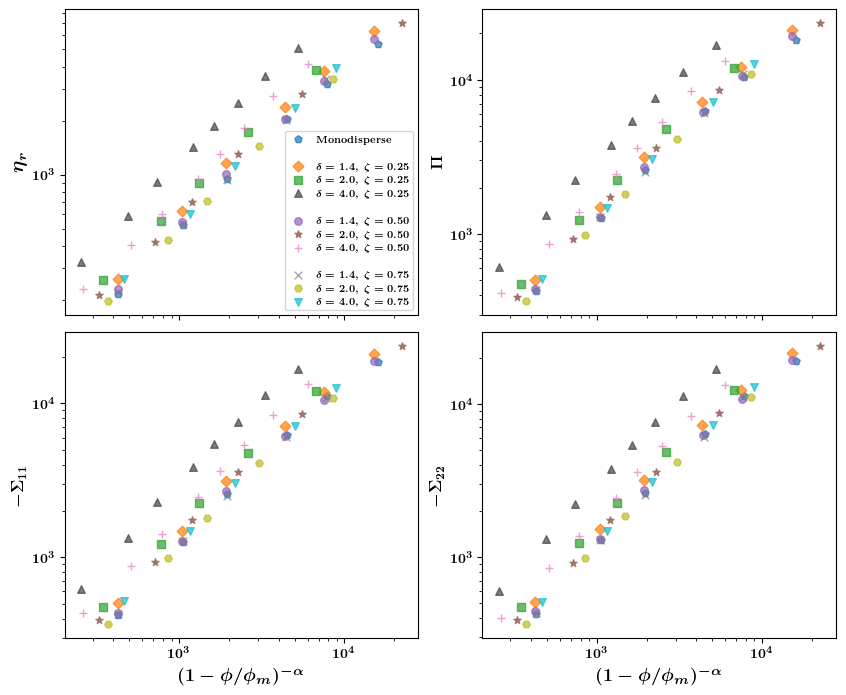

In [15]:
# Rheo plots for all cases

## Defining phi maxes
phims = np.array([[0.78453329, 0.78486939, 0.7909178 , 0.82419867],
                   [0.78453329, 0.78484748, 0.7927913 , 0.8228579 ],
                   [0.78453329, 0.78464183, 0.78896423, 0.80393124]])

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 4 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
# alpha        = 2.2464
alpha        = 2.4273 #2.4803
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']
param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]
fig, ax      = plt.subplots(nrows, ncols, figsize=(8.5, 7))

## plotting ar = 1 and vr = 0.25 case first
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc     = data[off:, 3]
            pp       = data[off:, 8]/data[off:, 2]
            sigma_11 = -(data[off:, 10] + data[off:, 11])
            sigma_22 = -(data[off:, 11])
            datasets = [visc, pp, sigma_11, sigma_22]
            
            for ii, datset in enumerate(datasets):
                param_list[ii].append(np.mean(datset) if len(datset) > off else None)
                paramserr_list[ii].append(np.std(datset) if len(datset) > off else None)
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(totParams):
    row, col = divmod(kk, 2)
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [(1 - (y / phims[0][0])) ** -alpha for x, y in zip(param[kk], phiv) if not np.isnan(x)]
    
    ax[row, col].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                         s=30, color=colors[pcount], alpha=0.7,  
                         label=r'$\textbf{Monodisperse}$')
    
pcount += 1
ax[0,0].plot([], [], ' ', label=" ")

# plotting other cases
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc     = data[off:, 3]
                    pp       = data[off:, 8]/data[off:, 2]
                    sigma_11 = -(data[off:, 10]+data[off:, 11])
                    sigma_22 = -(data[off:, 11])
                    datasets = [visc, pp, sigma_11, sigma_22]
                    
                    for ii, datset in enumerate(datasets):
                        param_list[ii].append(np.mean(datset) if len(datset) > off else np.nan)
                        paramserr_list[ii].append(np.std(datset) if len(datset) > off else np.nan)
                                                  
                    
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            row, col = divmod(kk, 2)
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [(1 - (y / phims[l][j+1])) ** -alpha for x, y in zip(param[kk], phiv) if not np.isnan(x)]
            
            ax[row, col].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                     s=30, color=colors[pcount], alpha=0.7, zorder = 20,
                     label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1

    if vrl != '0.75':
        ax[0,0].plot([], [], ' ', label=" ") 

for ll in range(totParams):
    row, col  = divmod(ll, 2)
    ax[row][col].set_ylabel(ylables[ll], fontsize=12)
    ax[0][0].set_ylabel(ylables[0], fontsize=14)
    ax[0][col].tick_params(axis='x', labelbottom=False)  # hides labels keeps ticks
    ax[1][col].set_xlabel(r'$(1 - \phi/\phi_m)^{-\alpha}$', fontsize=13)
    ax[1][col].tick_params(axis='x', labelsize=10)  # set x-tick label size
    ax[row][col].tick_params(axis='y', labelsize=10)
    ax[row][col].set_xscale('log')
    ax[row][col].set_yscale('log')
    legend = ax[0][0].legend(loc='lower right', fontsize=7, frameon=True, labelspacing=0.5)
    legend.set_zorder(-20)
    
fig.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/powerlaw_all_phim2{figFormat}', bbox_inches="tight",dpi=800)
plt.show()

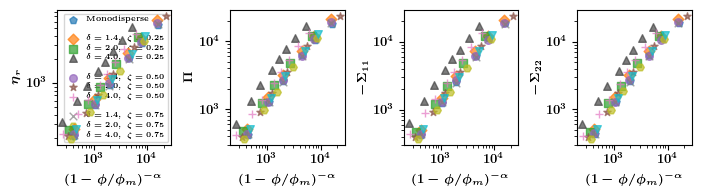

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob

# -----------------------
# Defining phi maxes
# -----------------------
phims = np.array([[0.78453329, 0.78486939, 0.7909178 , 0.82419867],
                  [0.78453329, 0.78484748, 0.7927913 , 0.8228579 ],
                  [0.78453329, 0.78464183, 0.78896423, 0.80393124]])

# -----------------------
# Parameters
# -----------------------
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0]   # 1.0 is a separate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 4  # total plots
alpha        = 2.4273  # exponent

colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']

marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']

ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']

param        = [[] for _ in range(totParams)]
paramserr    = [[] for _ in range(totParams)]

# -----------------------
# Create 1x4 figure
# -----------------------
#fig_height = fig_width/totParams * 1.5
fig_height = 2
#fig, ax    = plt.subplots(1, totParams, figsize=(16, 4))
fig, ax = plt.subplots(1, totParams, figsize=(fig_width, fig_height))

# -----------------------
# Plotting ar = 1.0 and vr = 0.25 (Monodisperse case)
# -----------------------
for k, phi in enumerate(phiv):
    phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    param_list     = [[] for _ in range(totParams)]
    paramserr_list = [[] for _ in range(totParams)]
    for run in range(numRuns):
        workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir+"data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc     = data[off:, 3]
            pp       = data[off:, 8]/data[off:, 2]
            sigma_11 = -(data[off:, 10] + data[off:, 11])
            sigma_22 = -(data[off:, 11])
            datasets = [visc, pp, sigma_11, sigma_22]
            
            for ii, datset in enumerate(datasets):
                if len(datset) > off:
                    param_list[ii].append(np.mean(datset))
                    paramserr_list[ii].append(np.std(datset))
                
    for jj in range(totParams):
        param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
        paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)

for kk in range(totParams):
    param_filtered      = [x for x in param[kk] if not np.isnan(x)]
    paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
    phim_vals_filtered  = [(1 - (y / phims[0][0])) ** -alpha 
                           for x, y in zip(param[kk], phiv) if not np.isnan(x)]
    
    ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                   s=30, color=colors[pcount], alpha=0.7,  
                   label=r'$\textbf{Monodisperse}$')

pcount += 1
ax[0].plot([], [], ' ', label=" ")

# -----------------------
# Plotting other cases
# -----------------------
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        param     = [[] for _ in range(totParams)]
        paramserr = [[] for _ in range(totParams)]
        for k, phi in enumerate(phiv):
            phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            param_list     = [[] for _ in range(totParams)]
            paramserr_list = [[] for _ in range(totParams)]
            for run in range(numRuns):
                workDir   = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir+"F_rig.txt"):
                    dataFile = glob.glob(workDir+"data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc     = data[off:, 3]
                    pp       = data[off:, 8]/data[off:, 2]
                    sigma_11 = -(data[off:, 10]+data[off:, 11])
                    sigma_22 = -(data[off:, 11])
                    datasets = [visc, pp, sigma_11, sigma_22]
                    
                    for ii, datset in enumerate(datasets):
                        if len(datset) > off:
                            param_list[ii].append(np.mean(datset))
                            paramserr_list[ii].append(np.std(datset))
                                                  
            for jj in range(totParams):
                param[jj].append(np.mean(param_list[jj]) if param_list[jj] else np.nan)
                paramserr[jj].append(np.mean(paramserr_list[jj]) if paramserr_list[jj] else np.nan)
        
        for kk in range(totParams):
            param_filtered      = [x for x in param[kk] if not np.isnan(x)]
            paramerr_filtered   = [x for x in paramserr[kk] if not np.isnan(x)]
            phim_vals_filtered  = [(1 - (y / phims[l][j+1])) ** -alpha 
                                   for x, y in zip(param[kk], phiv) if not np.isnan(x)]
            
            ax[kk].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                           s=30, color=colors[pcount], alpha=0.7, zorder=20,
                           label = fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1

    if vrl != '0.75':
        ax[0].plot([], [], ' ', label=" ") 

# -----------------------
# Axis formatting
# -----------------------
for ll in range(totParams):
    ax[ll].set_ylabel(ylables[ll], fontsize=9)
    ax[ll].set_xscale('log')
    ax[ll].set_yscale('log')
    ax[ll].set_xlabel(r'$(1 - \phi/\phi_m)^{-\alpha}$', fontsize=9)
    ax[ll].tick_params(axis='x', labelsize=9)
    ax[ll].tick_params(axis='y', labelsize=9)

legend = ax[0].legend(loc='lower right', fontsize=5, frameon=True, labelspacing=0.5)
legend.set_zorder(-20)

fig.tight_layout()

# -----------------------
# Save figure
# -----------------------
if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/powerlaw_all_phim2{figFormat}', 
                bbox_inches="tight", dpi=800)

plt.show()

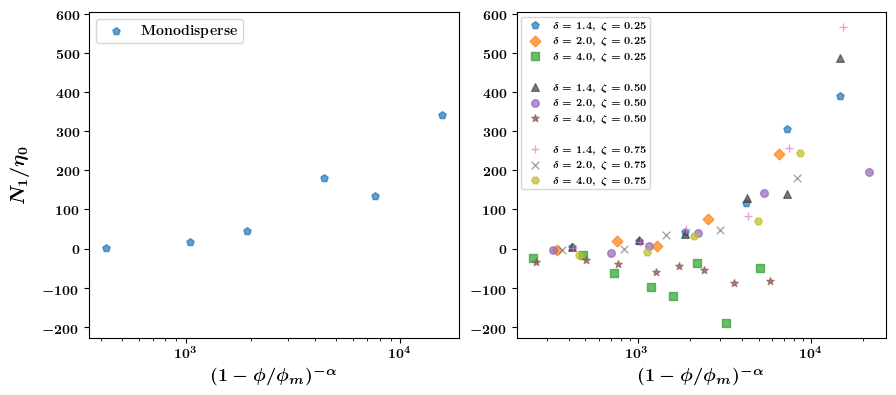

In [7]:
# for supplementary material
# N1 plot for all cases

phims = np.array([[0.78453329, 0.78486939, 0.7909178 , 0.82419867],
                   [0.78453329, 0.78484748, 0.7927913 , 0.8228579 ],
                   [0.78453329, 0.78464183, 0.78896423, 0.80393124]])

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 4 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
alpha        = 2.4207 #2.4273 #2.2464
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']


fig, axes = plt.subplots(1, 2, figsize=(9, 4))
pcount = 0

# ---- Left subplot: Monodisperse case ----
ax = axes[0]

visc_vals = []
scaled_x  = []

for phi in phiv:
    phir     = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    run_visc = []

    for run in range(numRuns):
        workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir + "data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc     = data[off:, 10] # N1
            if len(visc) > 0:
                run_visc.append(np.mean(visc))

    if run_visc:
        phim_val = phims[0][0]
        delta = 1 - (phi / phim_val)
        if delta > 0:
            visc_vals.append(np.mean(run_visc))
            scaled_x.append(delta ** -alpha)

ax.scatter(scaled_x, visc_vals, marker=marker_shape[pcount],
           s=30, color=colors[pcount], alpha=0.7,
           label=r'$\textbf{Monodisperse}$')

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel(r'$(1 - \phi/\phi_m)^{-\alpha}$', fontsize=13)
ax.set_ylabel(r'$N_1/\eta_0$', fontsize=14, labelpad=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(loc='upper left', fontsize=10, labelspacing=1)
#ax.set_title('Monodisperse ($\\delta=1$)', fontsize=14)

pcount += 1

# ---- Right subplot: Other cases ----
ax = axes[1]
pcount = 0

for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc_vals = []
        scaled_x  = []

        for phi in phiv:
            phir     = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            run_visc = []

            for run in range(numRuns):
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc     = data[off:, 10]  # N1
                    if len(visc) > 0:
                        run_visc.append(np.mean(visc))

            if run_visc:
                phim_val = phims[l][j+1]
                delta = 1 - (phi / phim_val)
                if delta > 0:
                    visc_vals.append(np.mean(run_visc))
                    scaled_x.append(delta ** -alpha)

        ax.scatter(scaled_x, visc_vals, marker=marker_shape[pcount],
                   s=30, color=colors[pcount], alpha=0.7, zorder=20,
                   label=fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')

        pcount += 1

    if vrl != '0.75':
        ax.plot([], [], ' ', label=" ")

ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel(r'$(1 - \phi/\phi_m)^{-\alpha}$', fontsize=13)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(loc='upper left', fontsize=7, frameon=True, labelspacing=0.7)
#ax.set_title('Bidisperse Cases', fontsize=14)

# Ensure both subplots have the same y-limits
ymin = min(axes[0].get_ylim()[0], axes[1].get_ylim()[0])
ymax = max(axes[0].get_ylim()[1], axes[1].get_ylim()[1])

for ax in axes:
    ax.set_ylim([ymin, ymax])

fig.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/n1_allcases{figFormat}', bbox_inches="tight",dpi=800)
plt.show()

[1.6085133857443448, 17.509095313203577, 44.79707251709627, 179.3434295473435, 133.82031536296688, 342.5025092422409]


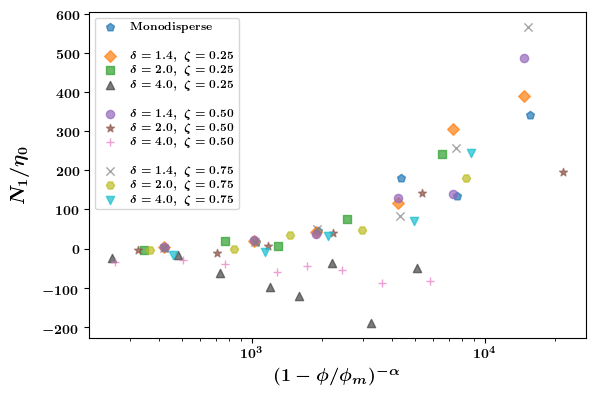

In [2]:
# for supplementary material
# N1 plot for all cases

phims = np.array([[0.78453329, 0.78486939, 0.7909178 , 0.82419867],
                   [0.78453329, 0.78484748, 0.7927913 , 0.8228579 ],
                   [0.78453329, 0.78464183, 0.78896423, 0.80393124]])

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 4 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
alpha        = 2.4207 #2.4273 #2.2464
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']


fig, ax = plt.subplots(figsize=(6, 4))  # Single plot

pcount = 0

# ---- Monodisperse case ----
visc_vals = []
scaled_x  = []

for phi in phiv:
    phir     = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    run_visc = []

    for run in range(numRuns):
        workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir + "data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc     = data[off:, 10] # N1
            if len(visc) > 0:
                run_visc.append(np.mean(visc))

    if run_visc:
        phim_val = phims[0][0]
        delta = 1 - (phi / phim_val)
        if delta > 0:
            visc_vals.append(np.mean(run_visc))
            scaled_x.append(delta ** -alpha)

ax.scatter(scaled_x, visc_vals, marker=marker_shape[pcount],
           s=35, color=colors[pcount], alpha=0.7,
           label=r'$\textbf{Monodisperse}$')
print(visc_vals)
pcount += 1
ax.plot([], [], ' ', label=" ")

# ---- Bidisperse cases ----
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc_vals = []
        scaled_x  = []

        for phi in phiv:
            phir     = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            run_visc = []

            for run in range(numRuns):
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc     = data[off:, 10]  # N1
                    if len(visc) > 0:
                        run_visc.append(np.mean(visc))

            if run_visc:
                phim_val = phims[l][j+1]
                delta = 1 - (phi / phim_val)
                if delta > 0:
                    visc_vals.append(np.mean(run_visc))
                    scaled_x.append(delta ** -alpha)

        ax.scatter(scaled_x, visc_vals, marker=marker_shape[pcount],
                   s=35, color=colors[pcount], alpha=0.7,
                   label=fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        pcount += 1

    #dummy point
    if vrl != vrr[-1]:
        ax.plot([], [], ' ', label=" ")

# ---- Formatting ----
ax.set_xscale('log')
ax.set_xlabel(r'$(1 - \phi/\phi_m)^{-\alpha}$', fontsize=13)
ax.set_ylabel(r'$N_1/\eta_0\dot{\gamma}$$', fontsize=14, labelpad=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(loc='upper left', fontsize=8, frameon=True, labelspacing=0.4)

fig.tight_layout()

if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/n1_allcases_single{figFormat}', bbox_inches="tight", dpi=800)

plt.show()

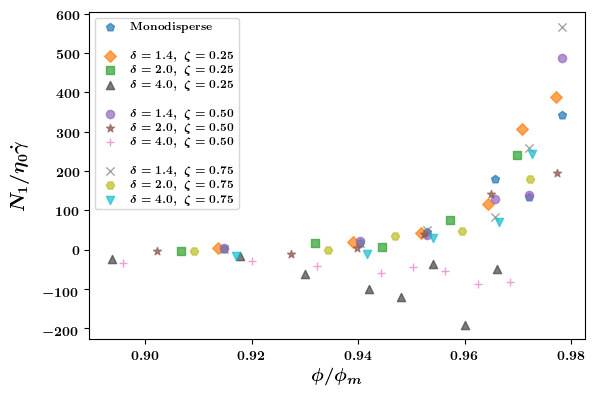

In [39]:
# for supplementary material
# N1 plot for all cases
# new corrected one


phims = np.array([[0.787, 0.788, 0.794 , 0.828],
                   [0.787, 0.787, 0.798 , 0.826 ],
                   [0.787, 0.787, 0.792, 0.807]])

# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 4 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
alpha        = 2.4207 #2.4273 #2.2464
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']


fig, ax = plt.subplots(figsize=(6, 4))  # Single plot

pcount = 0

# ---- Monodisperse case ----
visc_vals = []
scaled_x  = []

for phi in phiv:
    phir     = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    run_visc = []

    for run in range(numRuns):
        workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir + "data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc     = data[off:, 10] # N1
            if len(visc) > 0:
                run_visc.append(np.mean(visc))

    if run_visc:
        phim_val = phims[0][0]
        #delta = 1 - (phi / phim_val)
        #if delta > 0:
        visc_vals.append(np.mean(run_visc))
        scaled_x.append(phi / phim_val)

ax.scatter(scaled_x, visc_vals, marker=marker_shape[pcount],
           s=35, color=colors[pcount], alpha=0.7,
           label=r'$\textbf{Monodisperse}$')

pcount += 1
ax.plot([], [], ' ', label=" ")

# ---- Bidisperse cases ----
for l, vrl in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc_vals = []
        scaled_x  = []

        for phi in phiv:
            phir     = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            run_visc = []

            for run in range(numRuns):
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrl}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    visc     = data[off:, 10]  # N1
                    if len(visc) > 0:
                        run_visc.append(np.mean(visc))

            if run_visc:
                phim_val = phims[l][j+1]
                # delta = 1 - (phi / phim_val)
                # if delta > 0:
                visc_vals.append(np.mean(run_visc))
                scaled_x.append(phi / phim_val)

        ax.scatter(scaled_x, visc_vals, marker=marker_shape[pcount],
                   s=35, color=colors[pcount], alpha=0.7,
                   label=fr'$\delta = {arj:.1f},\; \zeta = {float(vrl):.2f}$')
        pcount += 1

    #dummy point
    if vrl != vrr[-1]:
        ax.plot([], [], ' ', label=" ")

# ---- Formatting ----
#ax.set_xscale('log')
ax.set_xlabel(r'$\phi/\phi_m$', fontsize=13)
ax.set_ylabel(r'$N_1/\eta_0\dot{\gamma}$', fontsize=14, labelpad=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(loc='upper left', fontsize=8, frameon=True, labelspacing=0.4)

fig.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/n1_allcases_single{figFormat}', bbox_inches="tight", dpi=800)

plt.show()

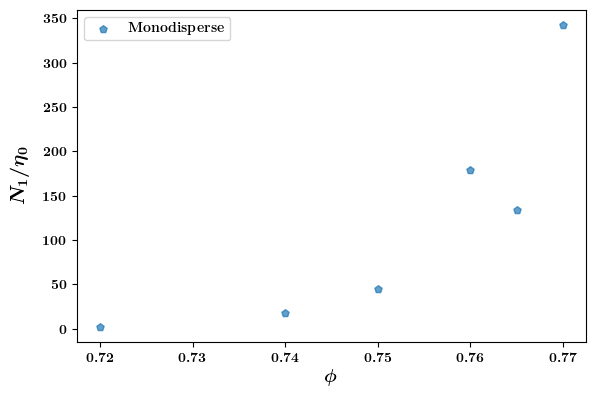

In [5]:
# Parameters
npp          = 1000
phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.4, 2.0, 4.0]  # 1.0 is a separate case
vrr          = ['0.25', '0.5', '0.75']
numRuns      = 2
off          = 100
pcount       = 0
alpha        = 2.4207
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [r'$\eta_r$', r'$\Pi$', 
                r'$ - \Sigma_{11} $', r'$ - \Sigma_{22} $']

# ---- Single plot ----
fig, ax = plt.subplots(figsize=(6, 4))  # one figure, one axis

visc_vals = []
scaled_x  = []

for phi in phiv:
    phir     = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
    run_visc = []

    for run in range(numRuns):
        workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_1.0/Vr_0.25/run_{run+1}/"
        if os.path.exists(workDir):
            dataFile = glob.glob(workDir + "data_*.dat")[0]
            data     = np.loadtxt(dataFile)
            visc     = data[off:, 10]
            if len(visc) > 0:
                run_visc.append(np.mean(visc))

    if run_visc:
        visc_vals.append(np.mean(run_visc))
        scaled_x.append(phi)

# ---- Plot ----
ax.scatter(scaled_x, visc_vals, marker=marker_shape[pcount],
           s=30, color='#1f77b4', alpha=0.7,
           label=r'$\textbf{Monodisperse}$')

#ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\phi$', fontsize=13)
ax.set_ylabel(r'$N_1/\eta_0$', fontsize=14, labelpad=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.legend(loc='upper left', fontsize=10, labelspacing=1)

plt.tight_layout()
plt.show()

In [41]:
-0.019277869914126722**alpha

-0.00014046128573418936

5679.144812395704, 11444.175100101062, 17123.319912496765
4388.527476488719, 13751.94453759058, 18140.4720140793
2095.1418908869214, 2250.9124869409734, 4346.054377827895
3092.358806973027, 3914.055028914139, 7006.413835887166


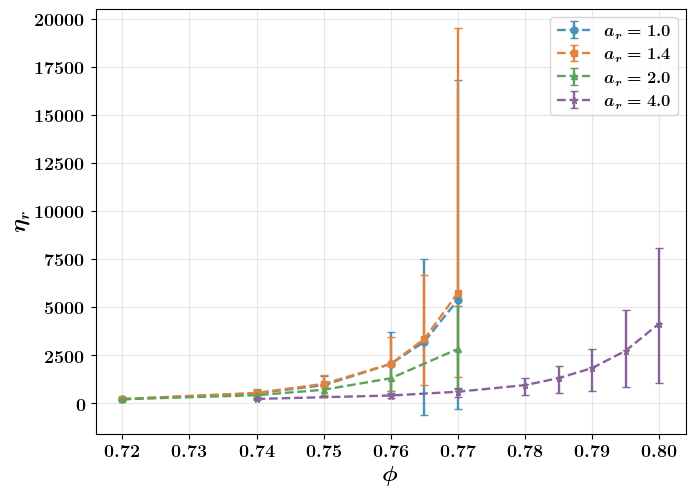

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob

# Setup
fig, ax = plt.subplots(figsize=(7, 5))  # single axes
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

for j, arj in enumerate(arr):
    visc = []
    visc_all_vals = []
    err_lower = []
    err_upper = []

    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []

        for run in range(numRuns):
            vrr_use = '0.25' if arj == 1 else vrr  # Fix vrr conflict
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr_use}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                if len(data[off:, 3]) > 0:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)
                    visc_all_vals.extend(data[off:, 3])

        if visc_list:
            mean_visc = np.mean(visc_list)
            visc.append(mean_visc)

            # Asymmetric error calculation
            deviations = [x - mean_visc for x in visc_all_vals]
            #neg_dev = [-d for d in deviations if d < 0]
            neg_dev = [ d**2 for d in deviations if d < 0]
            pos_dev = [ d**2 for d in deviations if d > 0]

            err_minus = np.sqrt(np.mean(neg_dev)) if neg_dev else 0.0
            err_plus  = np.sqrt(np.mean(pos_dev)) if pos_dev else 0.0

            err_lower.append(abs(err_minus))
            err_upper.append(err_plus)
        else:
            visc.append(np.nan)
            err_lower.append(np.nan)
            err_upper.append(np.nan)

    # Filter NaNs
    visc_filtered = [v for v in visc if not np.isnan(v)]
    phi_vals_filtered = [p for v, p in zip(visc, phiv) if not np.isnan(v)]
    err_low_filtered = [e for v, e in zip(visc, err_lower) if not np.isnan(v)]
    err_up_filtered  = [e for v, e in zip(visc, err_upper) if not np.isnan(v)]
    print(f'{err_low_filtered[-1]}, {err_up_filtered[-1]}, {err_low_filtered[-1] + err_up_filtered[-1]}')
    
    # Plot with error bars
    ax.errorbar(phi_vals_filtered, visc_filtered,
                yerr=[err_low_filtered, err_up_filtered],
                fmt=line_markers[j],
                linestyle='--',
                color=colors[j],
                capsize=3,
                label=fr'$a_r = {arj:.1f}$',
                linewidth=1.7)

# Labels and style
ax.set_xlabel(r'$\phi$', fontsize=16)
ax.set_ylabel(r'$\eta_{r}$', fontsize=16)
ax.tick_params(labelsize=13)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
fig.tight_layout()

plt.show()

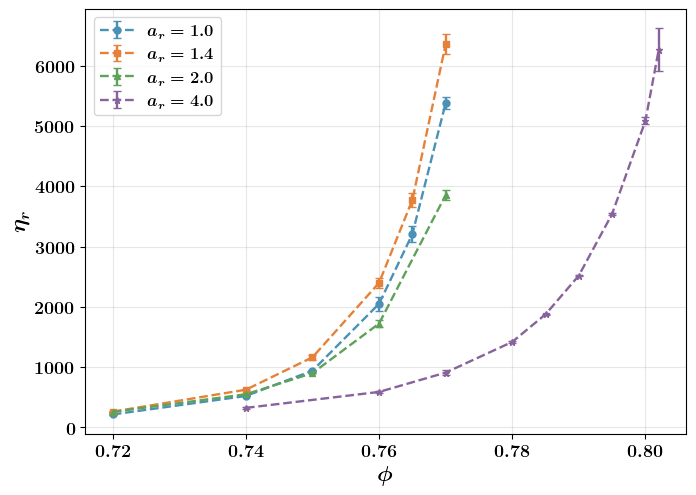

In [136]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob

# Setup
fig, ax = plt.subplots(figsize=(7, 5))  # single plot
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

for j, arj in enumerate(arr):
    visc = []
    err_std = []

    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []

        for run in range(numRuns):
            vrr_use = '0.25' if arj == 1 else vrr  # avoid name conflict
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr_use}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                if len(data[off:, 3]) > 0:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)

        if visc_list:
            mean_visc = np.mean(visc_list)
            std_visc  = np.std(visc_list, ddof=1)  # sample standard deviation

            visc.append(mean_visc)
            err_std.append(std_visc)
        else:
            visc.append(np.nan)
            err_std.append(np.nan)

    # Filter NaNs
    visc_filtered = [v for v in visc if not np.isnan(v)]
    phi_vals_filtered = [p for v, p in zip(visc, phiv) if not np.isnan(v)]
    err_std_filtered  = [e for v, e in zip(visc, err_std) if not np.isnan(v)]

    # Plot with symmetric error bars
    ax.errorbar(phi_vals_filtered, visc_filtered,
                yerr=err_std_filtered,
                fmt=line_markers[j],
                linestyle='--',
                color=colors[j],
                capsize=3,
                label=fr'$a_r = {arj:.1f}$',
                linewidth=1.7)

# Labels and style
ax.set_xlabel(r'$\phi$', fontsize=16)
ax.set_ylabel(r'$\eta_{r}$', fontsize=16)
ax.tick_params(labelsize=13)
ax.legend(fontsize=12)
ax.grid(True, alpha=0.3)
fig.tight_layout()

plt.show()

## Getting all viscoity values in a table

In [125]:
## Getting viscoity values for all data

import pandas as pd

# Parameters
npp     = 1000
phiv    = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr     = [1.0, 1.4, 2.0, 4.0]
vrr     = ['0.25', '0.5', '0.75']
numRuns = 2
off     = 100

visc_arr = np.zeros((len(phiv), len(arr), len(vrr)))


for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        for k, phik in enumerate(phiv):
            visc = []
            phir = f"{phik:.3f}" if phik != round(phik, 2) else f"{phik:.2f}"
            for l in range(numRuns):
                vrm = '0.25' if arj == 1 else vri
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrm}/run_{run+1}/"
                if os.path.exists(workDir):
                    datFile = glob.glob(f'{workDir}/data*.dat')[0]
                    data    = np.loadtxt(datFile)
                    viscVal = np.mean(data[off:, 3])
                    visc.append(viscVal)
            if visc:
                visc_arr[k, j, i] = np.mean(visc)
            else:
                visc_arr[k, j, i] = np.nan

# function to display visc values for a partcular vrr value

def visc_vrr(vrr_target):
    vrr_index = vrr.index(vrr_target)
    visc_slice = visc_arr[:, :, vrr_index]
    columns = [f"ar={arj}" for arj in arr]

    formatted_data = [
        [f"{int(round(val)):,}" if not pd.isna(val) else '' for val in row]
        for row in visc_slice
    ]

    df_vr = pd.DataFrame(formatted_data, columns=columns)
    df_vr.insert(0, 'phiv', phiv)

    #print(df_vr.to_string(index=False))
    return df_vr

In [160]:
visc_vrr('0.25')

phiv ar=1.0 ar=1.4 ar=2.0 ar=4.0
0   0.720    218    258    255       
1   0.740    523    626    550    334
2   0.750    950  1,190    899       
3   0.760  2,135  2,338  1,763    598
4   0.765  3,112  3,690              
5   0.770  5,450  6,235  3,915    876
6   0.780                       1,406
7   0.785                       1,882
8   0.790                       2,516
9   0.795                       3,556
10  0.800                       5,123

In [161]:
visc_vrr('0.5')

phiv ar=1.0 ar=1.4 ar=2.0 ar=4.0
0   0.720    218    232    213       
1   0.740    523    553    419    225
2   0.750    950    978    732       
3   0.760  2,135  2,101  1,307    403
4   0.765  3,112  3,334              
5   0.770  5,450  6,043  2,790    602
6   0.780                         955
7   0.785                       1,323
8   0.790                       1,819
9   0.795                       2,701
10  0.800                       4,368

In [162]:
visc_vrr('0.75')

phiv ar=1.0 ar=1.4 ar=2.0 ar=4.0
0   0.720    218    224    196       
1   0.740    523    544    434    255
2   0.750    950    954    714       
3   0.760  2,135  2,076  1,408    591
4   0.765  3,112  3,309              
5   0.770  5,450         3,448  1,072
6   0.780                       2,390
7   0.785                       3,997
8   0.790                            
9   0.795                            
10  0.800

## Fig 7 - PDF plots

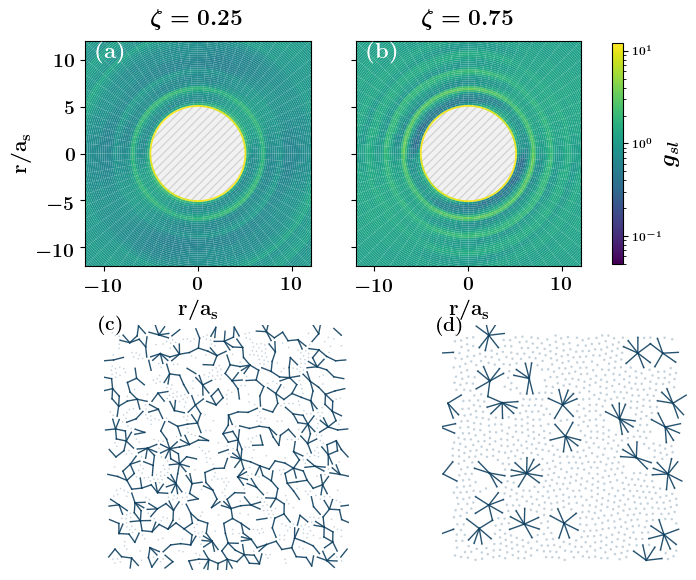

In [68]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Wedge
from matplotlib.patches import Circle
import matplotlib as mpl

import readFiles  # Custom module

# Parameters
npp        = 1000
numRun     = 1
vrr        = ['0.25', '0.75']
phi        = [0.795, 0.785]
ar         = 4.0
sizePair   = 'sl'
label_list = [r'$\mathbf{(a)}$', r'$\mathbf{(b)}$',
              r'$\mathbf{(c)}$', r'$\mathbf{(d)}$']

particleFile    = 'par_*.dat'
interactionFile = 'int_*.dat'

# === Create 2x2 subplots ===
fig, axs = plt.subplots(2, 2, figsize=(8, 7), constrained_layout=False)
# # fig.subplots_adjust(hspace=0.5)
# fig, axs = plt.subplots(2, 2, figsize=(8, 7), gridspec_kw={'hspace': 0.5})

# --- TOP TWO COLUMNS: wedge plots (axs[0, 0] and axs[0, 1])
for idx, vri in enumerate(vrr):
    ax = axs[0, idx]
    phii     = phi[idx]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'

    if os.path.exists(dataname): 
        datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        ds     = 1
        plim   = 12
        tdist  = ds * plim
        r1     = np.abs(rbin - ds*2).argmin()
        rlim   = np.abs(rbin - tdist * np.sqrt(2) * 1.1).argmin()

        g_r_submat = g_r_theta[r1:rlim, :]
        norm = LogNorm(vmin=5e-2, vmax=np.max(g_r_submat))
        cmap = plt.cm.viridis

        for ii in range(r1, rlim):
            r_start = rbin[ii]
            r_end   = rbin[ii + 1]
            for jj in range(len(thetabin) - 1):
                theta_start = np.degrees(thetabin[jj])
                theta_end   = np.degrees(thetabin[jj + 1])
                wedge       = Wedge((0, 0), r_end, theta_start, theta_end,
                                    width       = r_end - r_start,
                                    facecolor   = cmap(norm(g_r_theta[ii, jj])),
                                    edgecolor   = 'none',
                                    transform   = ax.transData._b,
                                    antialiased = True,
                                    rasterized  = True,
                                    zorder = 20)
                ax.add_patch(wedge)
                
    mpl.rcParams['hatch.linewidth'] = 0.8
    center_circle = Circle((0, 0), rbin[r1]*4,
                           facecolor="lightgrey",
                           hatch="////",             # style: '/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*'
                           edgecolor="grey", alpha=0.3)
    
    for spine in ax.spines.values():
        spine.set_zorder(25)
    
    ax.add_patch(center_circle)
    ax.set_aspect('equal')
    ax.set_xlim([-tdist, tdist])
    ax.set_ylim([-tdist, tdist])
    ax.tick_params(axis='both', which='both', labelsize=14)
    if idx == 1:
        ax.set_yticklabels([])

    ax.grid(False)
    ax.set_title(fr'$\zeta = {float(vri):.2f}$', fontsize=16.5, pad = 11)
    ax.text(-tdist * 0.9, tdist * 0.85, label_list[idx], fontsize=16, weight='bold', color='white', zorder = 30)
    ax.set_xlabel(r'$\mathbf{r / a_s}$', fontsize=15)
    if idx == 0:
        ax.set_ylabel(r'$\mathbf{r / a_s}$', fontsize=15)


# After defining `cmap` and `norm` from your wedge plot:
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for older versions of matplotlib

# Add colorbar aligned to the first row of subplots
cbar = fig.colorbar(sm, ax=[axs[0, 0], axs[0, 1]], location='right', shrink=0.9, pad=0.05)
cbar.set_label(r'$g_{sl}$', fontsize=16, labelpad=-2)

for idx, vri in enumerate(vrr):
    # --- Contact network plot (below)
    ax2      = axs[1, idx]
    phii     = phi[idx]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'
    if os.path.exists(dataname): 
        intPath  = open(glob.glob(f'{dataname}/{interactionFile}')[0])
        intList  = readFiles.interactionsList(intPath)
        parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
        parLines = parPath.readlines()
        parList1 = readFiles.readParFile(parPath)

        Lx = float(parLines[3].split()[2]) 
        Lz = float(parLines[3].split()[2])
        newLx = Lx + 1.5 * ar
        newLz = Lz + 1.5 * ar

        #frameSet = random.sample(range(0, len(parList1)), 1)
        #print(frameSet)
        if vri == '0.25':
            frameSet = [1703]
        if vri == '0.75':
            frameSet = [830]
            
        for frame in frameSet:
            px = parList1[frame][:,2]
            pz = parList1[frame][:,3]
            pr = parList1[frame][:,1]
            NP = len(pr)

            frameList = intList[frame]
            pi        = np.array([int(x) for x in frameList[:,0]])
            pj        = np.array([int(x) for x in frameList[:,1]])
            normxij   = frameList[:,2]
            normzij   = frameList[:,4]
            gapij     = frameList[:,5]
            contState = frameList[:,10]
            numInts   = len(contState)

            for j in range(npp):
                circle = plt.Circle((px[j], pz[j]), 0.4, facecolor='#9fb5c4', fill=True, edgecolor='none', alpha=0.6)            
                ax2.add_artist(circle)

            for ii in range(numInts):
                p1   = pi[ii]
                p2   = pj[ii]
                pos1 = np.array([px[p1], pz[p1]])
                pos2 = np.array([px[p2], pz[p2]])
                gap  = gapij[ii]
                nij  = np.array([normxij[ii], normzij[ii]])
                pir  = pr[p1]
                pjr  = pr[p2]
                rij  = nij * (gap + 2.) * (pir + pjr) * 0.5
                p11  = pos1 + rij
                if (contState[ii] == 2 or contState[ii] == 3) and pir != pjr:
                    ax2.plot([pos1[0], p11[0]], [pos1[1], p11[1]], color='#0f4060', linewidth=1, alpha=0.9)
                    if (np.sign(nij[0]) != np.sign((pos2 - pos1)[0])) or (np.sign(nij[1]) != np.sign((pos2 - pos1)[1])):
                        p22 = pos2 - rij
                        ax2.plot([pos2[0], p22[0]], [pos2[1], p22[1]], color='#0f4060', linewidth=1, alpha=0.9)

        ax2.set_xlim([-(newLx/2+0.2), (newLx/2+0.2)])
        ax2.set_ylim([-(newLz/2+0.2), (newLz/2+0.2)])
        #ax2.axis('off')
        ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax2.text(-newLx * 0.52, newLz * 0.48, label_list[2+idx], fontsize=14, weight='bold', color='black')
        alpha = 0.0
        for spine in ax2.spines.values():
            spine.set_edgecolor((alpha, alpha, alpha, alpha))  # RGBA: black with alpha=0 (fully transparent)
        ax2.set_aspect('equal')
        
if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/PDF_sl_ar_4_2{figFormat}', bbox_inches="tight",dpi=800)
plt.show()

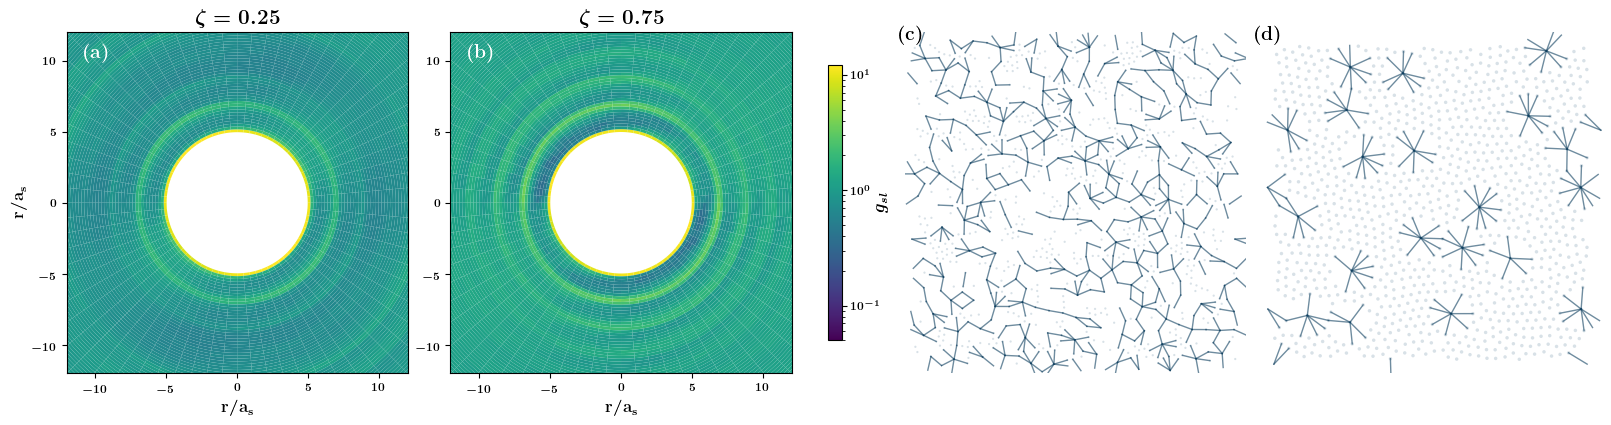

In [2]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Wedge

import readFiles  # Custom module

# Parameters
npp             = 1000
numRun          = 1
vrr             = ['0.25', '0.75']
phi             = [0.795, 0.785]
ar              = 4.0
sizePair        = 'sl'
label_list = [r'$\mathbf{(a)}$', r'$\mathbf{(b)}$',
              r'$\mathbf{(c)}$', r'$\mathbf{(d)}$']

particleFile    = 'par_*.dat'
interactionFile = 'int_*.dat'

# Directory variables
# (make sure topDir and fig_save_path are defined before running)
# topDir = "/path/to/data"
# fig_save_path = "/path/to/save"

# === Create 1x4 subplots ===
fig, axs = plt.subplots(1, 4, figsize=(16, 4), constrained_layout=True)

# --- FIRST TWO: wedge plots ---
for idx, vri in enumerate(vrr):
    ax = axs[idx]
    phii     = phi[idx]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'

    if os.path.exists(dataname):
        datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        ds     = 1
        plim   = 12
        tdist  = ds * plim
        r1     = np.abs(rbin - ds*2).argmin()
        rlim   = np.abs(rbin - tdist * np.sqrt(2) * 1.1).argmin()

        g_r_submat = g_r_theta[r1:rlim, :]
        norm = LogNorm(vmin=5e-2, vmax=np.max(g_r_submat))
        cmap = plt.cm.viridis

        for ii in range(r1, rlim):
            r_start = rbin[ii]
            r_end   = rbin[ii + 1]
            for jj in range(len(thetabin) - 1):
                theta_start = np.degrees(thetabin[jj])
                theta_end   = np.degrees(thetabin[jj + 1])
                wedge       = Wedge((0, 0), r_end, theta_start, theta_end,
                                    width       = r_end - r_start,
                                    facecolor   = cmap(norm(g_r_theta[ii, jj])),
                                    edgecolor   = 'none',
                                    transform   = ax.transData._b,
                                    antialiased = True,
                                    rasterized  = True)
                ax.add_patch(wedge)

    ax.set_aspect('equal')
    ax.set_xlim([-tdist, tdist])
    ax.set_ylim([-tdist, tdist])
    ax.grid(False)
    ax.set_title(fr'$\zeta = {float(vri):.2f}$', fontsize=15)
    ax.text(-tdist * 0.9, tdist * 0.85, label_list[idx], fontsize=14, weight='bold', color='white')
    ax.set_xlabel(r'$\mathbf{r / a_s}$', fontsize=12)
    if idx == 0:
        ax.set_ylabel(r'$\mathbf{r / a_s}$', fontsize=12)

# Add colorbar for wedge plots
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=[axs[0], axs[1]], location='right', shrink=0.75, pad=0.05)
cbar.set_label(r'$g_{sl}$', fontsize=12, labelpad=-5)

# --- LAST TWO: contact network plots ---
for idx, vri in enumerate(vrr):
    ax2 = axs[2 + idx]
    phii     = phi[idx]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'

    if os.path.exists(dataname):
        intPath  = open(glob.glob(f'{dataname}/{interactionFile}')[0])
        intList  = readFiles.interactionsList(intPath)
        parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
        parLines = parPath.readlines()
        parList1 = readFiles.readParFile(parPath)

        Lx = float(parLines[3].split()[2])
        Lz = float(parLines[3].split()[2])
        newLx = Lx + 1.5 * ar
        newLz = Lz + 1.5 * ar

        frameSet = random.sample(range(0, len(parList1)), 1)
        for frame in frameSet:
            px = parList1[frame][:, 2]
            pz = parList1[frame][:, 3]
            pr = parList1[frame][:, 1]
            NP = len(pr)

            frameList = intList[frame]
            pi        = np.array([int(x) for x in frameList[:, 0]])
            pj        = np.array([int(x) for x in frameList[:, 1]])
            normxij   = frameList[:, 2]
            normzij   = frameList[:, 4]
            gapij     = frameList[:, 5]
            contState = frameList[:, 10]
            numInts   = len(contState)

            for j in range(npp):
                circle = plt.Circle((px[j], pz[j]), 0.4,
                                    facecolor='#9fb5c4', fill=True,
                                    edgecolor='none', alpha=0.4)
                ax2.add_artist(circle)

            for ii in range(numInts):
                p1   = pi[ii]
                p2   = pj[ii]
                pos1 = np.array([px[p1], pz[p1]])
                pos2 = np.array([px[p2], pz[p2]])
                gap  = gapij[ii]
                nij  = np.array([normxij[ii], normzij[ii]])
                pir  = pr[p1]
                pjr  = pr[p2]
                rij  = nij * (gap + 2.) * (pir + pjr) * 0.5
                p11  = pos1 + rij
                if (contState[ii] == 2 or contState[ii] == 3) and pir != pjr:
                    ax2.plot([pos1[0], p11[0]], [pos1[1], p11[1]],
                             color='#0f4060', linewidth=1, alpha=0.6)
                    if (np.sign(nij[0]) != np.sign((pos2 - pos1)[0])) or \
                       (np.sign(nij[1]) != np.sign((pos2 - pos1)[1])):
                        p22 = pos2 - rij
                        ax2.plot([pos2[0], p22[0]], [pos2[1], p22[1]],
                                 color='#0f4060', linewidth=1, alpha=0.6)

        ax2.set_xlim([-(newLx/2+0.2), (newLx/2+0.2)])
        ax2.set_ylim([-(newLz/2+0.2), (newLz/2+0.2)])
        ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax2.text(-newLx * 0.52, newLz * 0.48, label_list[2+idx], fontsize=14, weight='bold', color='black')
        alpha = 0.0
        for spine in ax2.spines.values():
            spine.set_edgecolor((alpha, alpha, alpha, alpha))
        ax2.set_aspect('equal')

# Save and show
if False:
    figFormat = ".pdf"
    plt.savefig(f'{fig_save_path}/PDF_sl_ar_4_2{figFormat}', bbox_inches="tight", dpi=800)
plt.show()

[919]
[462]


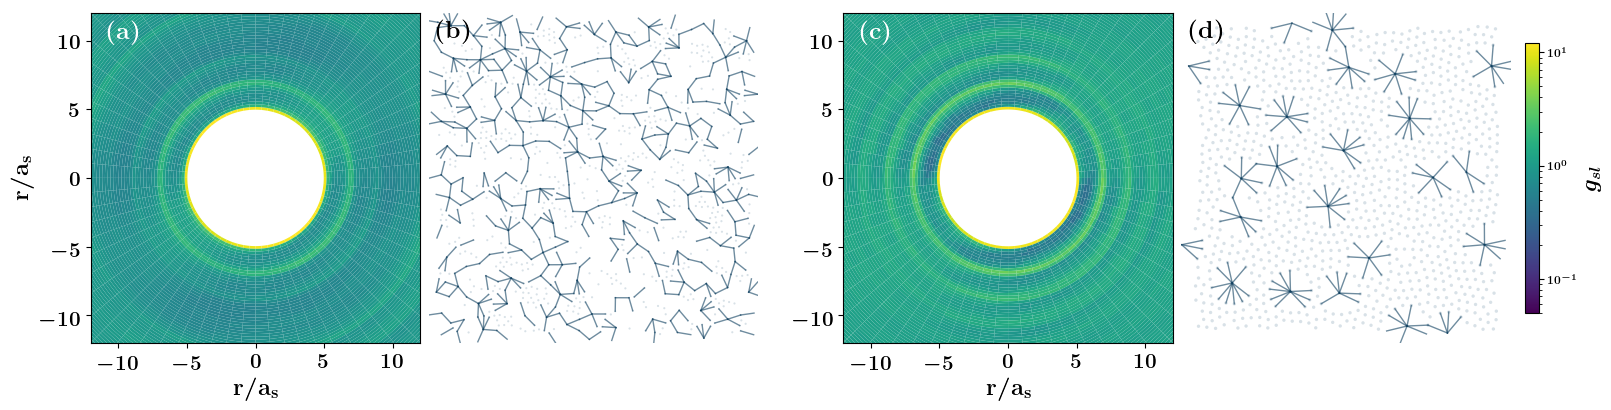

In [33]:
import os
import glob
import random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.patches import Wedge

import readFiles  # Custom module

# Parameters
npp             = 1000
numRun          = 1
vrr             = ['0.25', '0.75']
phi             = [0.795, 0.785]
ar              = 4.0
sizePair        = 'sl'
label_list = [r'$\mathbf{(a)}$', r'$\mathbf{(c)}$',
              r'$\mathbf{(b)}$', r'$\mathbf{(d)}$']

particleFile    = 'par_*.dat'
interactionFile = 'int_*.dat'

# Directory variables
# topDir = "/path/to/data"
# fig_save_path = "/path/to/save"

import matplotlib.gridspec as gridspec

# Create figure and gridspec with a spacer column (width ratio 0.3)
fig = plt.figure(figsize=(16, 4), constrained_layout=True)
gs = gridspec.GridSpec(1, 5, width_ratios=[1, 1, 0.05, 1, 1], figure=fig)

axs = [fig.add_subplot(gs[i]) for i in range(5)]

# Map subplots to variables for clarity
ax_a_pdf = axs[0]   # (a) PDF ζ=0.25
ax_c_cont = axs[1]  # (c) Contact ζ=0.25
ax_spacer = axs[2]  # Spacer, will remain empty
ax_b_pdf = axs[3]   # (b) PDF ζ=0.75
ax_d_cont = axs[4]  # (d) Contact ζ=0.75

# Hide spacer axis completely
ax_spacer.axis('off')

# --- FIRST: PDF wedge plots ---
for idx, vri in enumerate(vrr):
    if idx == 0:
        ax = ax_a_pdf
        label_idx = 0  # (a)
    else:
        ax = ax_b_pdf
        label_idx = 1  # (b)

    phii     = phi[idx]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'

    if os.path.exists(dataname):
        datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        ds     = 1
        plim   = 12
        tdist  = ds * plim
        r1     = np.abs(rbin - ds*2).argmin()
        rlim   = np.abs(rbin - tdist * np.sqrt(2) * 1.1).argmin()

        g_r_submat = g_r_theta[r1:rlim, :]
        norm = LogNorm(vmin=5e-2, vmax=np.max(g_r_submat))
        cmap = plt.cm.viridis

        for ii in range(r1, rlim):
            r_start = rbin[ii]
            r_end   = rbin[ii + 1]
            for jj in range(len(thetabin) - 1):
                theta_start = np.degrees(thetabin[jj])
                theta_end   = np.degrees(thetabin[jj + 1])
                wedge       = Wedge((0, 0), r_end, theta_start, theta_end,
                                    width       = r_end - r_start,
                                    facecolor   = cmap(norm(g_r_theta[ii, jj])),
                                    edgecolor   = 'none',
                                    transform   = ax.transData._b,
                                    antialiased = True,
                                    rasterized  = True)
                ax.add_patch(wedge)

        ax.set_aspect('equal')
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_xlim([-tdist, tdist])
        ax.set_ylim([-tdist, tdist])
        ax.grid(False)
        #ax.set_title(fr'$\zeta = {float(vri):.2f}$', fontsize=15)
        ax.text(-tdist * 0.9, tdist * 0.85, label_list[label_idx], fontsize=18, weight='bold', color='white')
        ax.set_xlabel(r'$\mathbf{r / a_s}$', fontsize=17)
        if idx == 0:
            ax.set_ylabel(r'$\mathbf{r / a_s}$', fontsize=17)

# --- SECOND: contact network plots ---
for idx, vri in enumerate(vrr):
    if idx == 0:
        ax2 = ax_c_cont
        label_idx = 2  # (c)
    else:
        ax2 = ax_d_cont
        label_idx = 3  # (d)

    phii     = phi[idx]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'

    if os.path.exists(dataname):
        intPath  = open(glob.glob(f'{dataname}/{interactionFile}')[0])
        intList  = readFiles.interactionsList(intPath)
        parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
        parLines = parPath.readlines()
        parList1 = readFiles.readParFile(parPath)

        Lx = float(parLines[3].split()[2])
        Lz = float(parLines[3].split()[2])
        newLx = Lx + 1.5 * ar
        newLz = Lz + 1.5 * ar
        
        if vri == '0.75':
            frameSet = [462]
        else:
            frameSet = random.sample(range(0, len(parList1)), 1)
        print(frameSet)
        
        for frame in frameSet:
            px = parList1[frame][:, 2]
            pz = parList1[frame][:, 3]
            pr = parList1[frame][:, 1]
            NP = len(pr)

            frameList = intList[frame]
            pi        = np.array([int(x) for x in frameList[:, 0]])
            pj        = np.array([int(x) for x in frameList[:, 1]])
            normxij   = frameList[:, 2]
            normzij   = frameList[:, 4]
            gapij     = frameList[:, 5]
            contState = frameList[:, 10]
            numInts   = len(contState)

            for j in range(npp):
                circle = plt.Circle((px[j], pz[j]), 0.4,
                                    facecolor='#9fb5c4', fill=True,
                                    edgecolor='none', alpha=0.4)
                ax2.add_artist(circle)

            for ii in range(numInts):
                p1   = pi[ii]
                p2   = pj[ii]
                pos1 = np.array([px[p1], pz[p1]])
                pos2 = np.array([px[p2], pz[p2]])
                gap  = gapij[ii]
                nij  = np.array([normxij[ii], normzij[ii]])
                pir  = pr[p1]
                pjr  = pr[p2]
                rij  = nij * (gap + 2.) * (pir + pjr) * 0.5
                p11  = pos1 + rij
                if (contState[ii] == 2 or contState[ii] == 3) and pir != pjr:
                    ax2.plot([pos1[0], p11[0]], [pos1[1], p11[1]],
                             color='#0f4060', linewidth=1, alpha=0.6)
                    if (np.sign(nij[0]) != np.sign((pos2 - pos1)[0])) or \
                       (np.sign(nij[1]) != np.sign((pos2 - pos1)[1])):
                        p22 = pos2 - rij
                        ax2.plot([pos2[0], p22[0]], [pos2[1], p22[1]],
                                 color='#0f4060', linewidth=1, alpha=0.6)

        ax2.set_xlim([-(newLx/2+0.2), (newLx/2+0.2)])
        ax2.set_ylim([-(newLz/2+0.2), (newLz/2+0.2)])
        ax2.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
        ax2.text(-newLx * 0.48, newLz * 0.43, label_list[label_idx], fontsize=18, weight='bold', color='black')
        alpha = 0.0
        for spine in ax2.spines.values():
            spine.set_edgecolor((alpha, alpha, alpha, alpha))
        ax2.set_aspect('equal')

# Add colorbar for PDF plots (axes 0 and 3)
# Use last cmap and norm from the last PDF loaded
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

cbar = fig.colorbar(sm, ax=[axs[0], axs[4]], location='right', shrink=0.8, pad=0.01)
cbar.set_label(r'$g_{sl}$', fontsize=16, labelpad=3)

# Save and show
if True:
    figFormat = ".pdf"
    plt.savefig(f'{fig_save_path}/PDF_sl_ar_4_2{figFormat}', bbox_inches="tight", dpi=800)
plt.show()

In [21]:
np.mean(g_r_theta)

0.9999999999999999

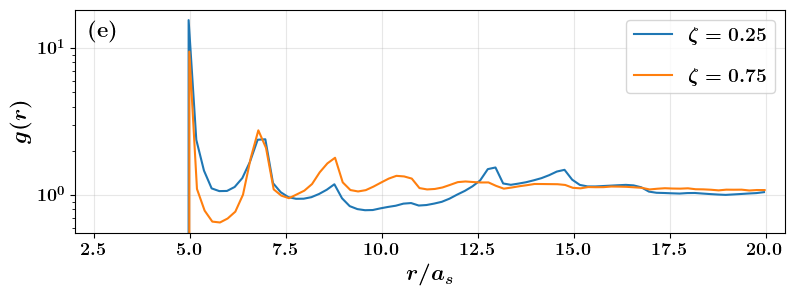

In [12]:
## Gr plot

vrr = ['0.25', '0.75']
phi = [0.79, 0.78]
ar              = 4.0
sizePair        = 'sl'

# Create figure with length twice the height
fig, ax = plt.subplots(figsize=(8, 3))  # Width=8, Height=4 → width is twice height

for i, vri in enumerate(vrr):
    phii = phi[i]
    phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'

    if os.path.exists(dataname):
        datFile = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        rbin = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        rlim = 20
        indx = (np.abs(rbin - rlim)).argmin() + 1
        gr = np.mean(g_r_theta, axis=1)

        ax.plot(rbin[:indx], gr[:indx], linestyle='-', label=fr'$\zeta = {float(vri):.2f}$',
                linewidth=1.5)

# Legend with updated fontsize and label spacing
ax.legend(fontsize=14, labelspacing=1.2, frameon=True)

ax.set_xlabel(r'$r / a_s$', fontsize=16, fontweight='bold')
ax.set_ylabel(r'$g(r)$', fontsize=16,  fontweight='bold')
ax.grid(False)
ax.set_yscale('log')

ax.text(0.02, 0.95, r'$\mathbf{(e)}$', fontsize=16, weight='bold', color='black',
        transform=ax.transAxes, ha='left', va='top')

ax.tick_params(axis='both', which='major', labelsize=13)
#plt.tight_layout()
plt.xlim(2,rlim+0.5)
plt.tight_layout()
plt.grid('True', alpha=0.3)

if True:
    figFormat=".pdf"
    fig.savefig(f'{fig_save_path}/gr{figFormat}', bbox_inches="tight",dpi=800)
plt.show()

# Supplementary figure
## Znet for jamming

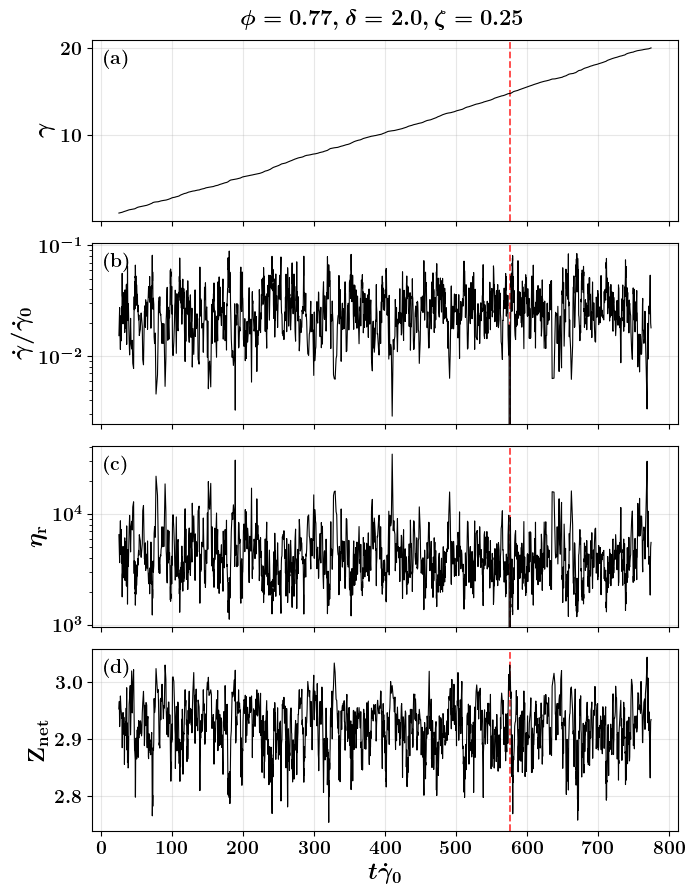

In [21]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

# Parameters
npp    = 1000
vrr    = '0.25'
phi    = 0.77
ar     = 2.0
numRun = 2
off    = 100

# Create figure with shared x-axis
fig, ax = plt.subplots(4, 1, figsize=(7, 9), sharex=True)

# File path
dataname = f'{topDir}/NP_{npp}/phi_{phi}/ar_{ar:.1f}/Vr_{vrr}/run_{numRun}/'

if os.path.exists(dataname): 
    dataFile = glob.glob(dataname + "data_*.dat")[0]
    data     = np.loadtxt(dataFile)

    znetFile = dataname+"Z_Znet.txt"
    znet     = np.loadtxt(znetFile)[off:, 2]

    shearstress = data[off:, -2]
    cumStrain   = data[off:, 1]
    shearrate   = data[off:, 2]
    viscosity   = data[off:, 3]
    time        = data[off:, 0]

    y_data   = [cumStrain, shearrate, viscosity, znet]
    y_labels = [r'$\mathbf{\gamma}$', r'$\mathbf{\dot{\gamma}/\dot{\gamma}_0}$',
                r'$\mathbf{\eta_r}$', r'$\mathbf{Z_{\mathrm{net}}}$']

    for i, (y, ylabel) in enumerate(zip(y_data, y_labels)):
        ax[i].plot(time, y, linestyle='-', color='k', linewidth=0.8, zorder=10)
        ax[i].set_ylabel(ylabel, fontsize=17)
        ax[i].grid('True', alpha =0.3)
    
        indexes = np.where(shearrate < 0)[0]
        for idx in indexes:
            ax[i].axvline(x=time[idx], color='red', linestyle='--', linewidth=1.3, alpha=0.75)

else:
    print(f'{dataname} - Path DNE')

ax[-1].set_xlabel(r'$t\dot{\gamma}_{0}$', fontsize=17)
#ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')

for a in ax[:-1]:
    a.tick_params(labelbottom=False)
for a in ax:
    a.tick_params(axis='both', which='both', labelsize=14)

labels = [r'$\mathbf{(a)}$', r'$\mathbf{(b)}$', r'$\mathbf{(c)}$', r'$\mathbf{(d)}$']
for i, a in enumerate(ax):
    a.tick_params(axis='both', which='both', labelsize=14)  # increase tick font size
    a.text(0.02, 0.95, labels[i],
           transform=a.transAxes,
           fontsize=14,
           va='top', ha='left')
    
#fig.suptitle(fr'$\phi = {phi:.3f}, \; \mathrm{{Monodisperse}}$', fontsize=16, x=0.55, y=0.985)
fig.suptitle(fr'$\phi = {phi:.2f}, \delta = {ar:.1f}, \zeta = {vrr}$', fontsize=16, x=0.55, y=0.985) 

plt.tight_layout()

if True:
    figFormat=".pdf"
    fig.savefig(f'{fig_save_path}/time_Series_phi_{phi:.3f}_delta_{ar:.1f}_zeta_{vrr}{figFormat}', bbox_inches="tight",dpi=800)
plt.show()

In [88]:
idx = np.where(viscosity < 0)[0]
idx

array([920])

In [168]:
## Checking negative shearrate for mu =inf
# Jamming

if platform.system() == "Darwin":  # macOS
    topDir = "/Users/rahul/mnt/sshfs_darwin/simulations/mu=1"
elif platform.system() == "Linux":  # Linux
    topDir = "/media/rahul/rahul_2TB/high_bidispersity/new_data/"
else:
    raise RuntimeError("Unsupported OS")

#######################################
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr  = [1.0, 1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr  = ['0.25', '0.5', '0.75']

numRuns  = 2
maxGamma = 20
off = 0
s   = 0

for phii in phiv:
    phir = f"{phii:.3f}" if phii != round(phii, 2) else f"{phii:.2f}"
    for arj in arr:
        for vr in vrr:
            vrk = '0.25' if arj == 1 else vr
            for run in range(1, numRuns + 1):
                datDir  = f'{topDir}/NP_{npp}/phi_{phir}/ar_{arj}/Vr_{vrk}/run_{run}'
                if os.path.exists(datDir):
                    datFile = glob.glob(str(f'{datDir}/data_*.dat'))[0]
                    with open(datFile, 'r') as file:
                        data = np.loadtxt(file)
                        visc = data[off:,3]
                        sr   = data[off:, 2]
            
                    if any(x < 0 for x in sr):
                        print(f'Negative sr in - /phi_{phir}/ar_{arj}/Vr_{vrk}/run_{run}')
                        s+=1

print(f'\ntotal cases jammed: {s}')

Negative sr in - /phi_0.765/ar_1.0/Vr_0.25/run_1
Negative sr in - /phi_0.765/ar_1.0/Vr_0.25/run_1
Negative sr in - /phi_0.765/ar_1.0/Vr_0.25/run_1
Negative sr in - /phi_0.77/ar_1.0/Vr_0.25/run_1
Negative sr in - /phi_0.77/ar_1.0/Vr_0.25/run_1
Negative sr in - /phi_0.77/ar_1.0/Vr_0.25/run_1
Negative sr in - /phi_0.77/ar_1.4/Vr_0.25/run_1
Negative sr in - /phi_0.77/ar_2.0/Vr_0.25/run_2
Negative sr in - /phi_0.78/ar_2.0/Vr_0.5/run_2

total cases jammed: 9


## Mu =1 plots

Best alpha found: 1.7083 with MSE: 0.0000


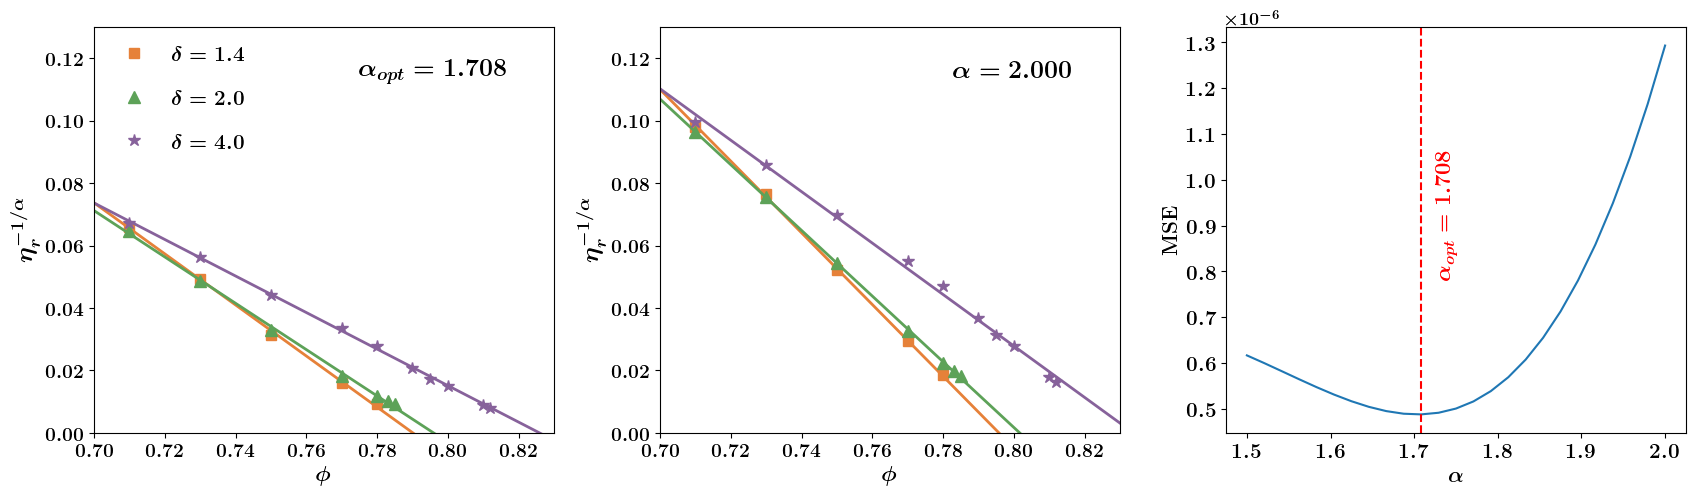

In [140]:
## finding optimum alpha using scaled alpha for mu =1

import numpy as np
import os, glob
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import platform

if platform.system() == "Darwin":  # macOS
    topDir = "/Users/rahul/rahul_2TB/high_bidispersity/new_data/mu=1/"
elif platform.system() == "Linux":  # Linux
    topDir = "/media/rahul/rahul_2TB/high_bidispersity/new_data/mu=1/"
else:
    raise RuntimeError("Unsupported OS")
#########################################################

def linearfit(phi, c, m):
    return c + m * phi

colors = ['#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['s', '^', '*', 'p']
marker_size = [7, 8, 9, 8]
line_width = 2

# Parameters
npp  = 1000
phiv = [0.71, 0.73, 0.75, 0.77, 0.78, 0.783, 0.785, 0.786, 0.788, 0.79, 0.791, 
        0.792, 0.795, 0.80, 0.81, 0.812, 0.815, 0.82, 0.83, 0.85]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = ['0.5']
numRuns = 2
gamma   = 20
off     = 100
phim_guess = [.785, .785, .792, 0.815]

fig, ax = plt.subplots(1, 3, figsize=(17, 5))

##################################
#Fig 1: Optimum alpha

alphas     = np.linspace(1.5, 2, 25)  # Search range for alpha
best_alpha = None
best_err   = np.inf

mse_all = []
for alpha in alphas:
    total_err = 0
    count     = 0
    for i, vrj in enumerate(vrr):  # Assuming vrr is defined as your list ['0.25', '0.5', '0.75']
        for j, arj in enumerate(arr):  # Assuming arr is defined, e.g. [1.0, 1.4, 2.0, 4.0]
            visc = []
            for phi in phiv:  # Assuming phiv is defined
                phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
                visc_list = []
                for run in range(numRuns):  # Assuming numRuns defined
                    workDir  = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
                    if os.path.exists(workDir):
                        dataFile = glob.glob(workDir + "data_*.dat")
                        if dataFile:
                            data   = np.loadtxt(dataFile[0])
                            jammed = any(x < 0 for x in data[:, 2])
                            if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                                visc_val = np.mean(data[off:, 3])
                                visc_list.append(visc_val)
                avg_visc = np.mean(visc_list) if visc_list else np.nan
                visc.append(avg_visc)
                
            # Filter out nans
            visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
            phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

            if len(visc_filtered) >= 2:
                popt, _         = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0 = [0.35, phim_guess[j]])
                k_opt, phim_opt = popt
                fit_vals = linearfit(np.array(phi_vals_filtered), k_opt, phim_opt)
                err = np.sum((fit_vals - visc_filtered) ** 2)
                total_err += err
                count += len(phi_vals_filtered)
                #print(f"  ar={arj}, vr={vrj}, err={err:.4f}, count={count}")  # Trace error per dataset
    
    if count > 0:
        mse = total_err / count
        mse_all.append(mse)
        #print(f"Alpha {alpha:.4f} -> MSE: {mse:.6f}")
        if mse < best_err:
            best_err   = mse
            best_alpha = alpha

print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

# --- Main plotting ---

k_all, phim_all = [], []
#best_alpha =
alpha = best_alpha
s = 0

for i, vri in enumerate(vrr):
    k_list = []
    phim_list = []
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vri}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)

        visc_filtered     = [x**(-1/alpha) for x in visc if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[j]])
            k_opt, phim_opt = popt
            k_list.append(k_opt)
            phim_list.append(phim_opt)

            ax[0].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None',
                    marker=line_markers[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s],
                    label=fr'$\delta = {arj:.1f}$')
           
            xx = np.linspace(0.68, .83, 100)
            yy = linearfit(xx, k_opt, phim_opt)
            ax[0].plot(xx, yy, color=colors[s], linewidth=line_width)
            s+=1
    k_all.append(k_list)
    phim_all.append(phim_list)
    
# Labels and formatting
ax[0].set_ylim(0, 0.13)
ax[0].set_xlim(0.70, 0.83)
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[0].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[0].legend(fontsize=15, labelspacing=1.2, frameon=False, loc = 'upper left')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[0].text(0.9, 0.92, fr'$\alpha_{{opt}} = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[0].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

####################################################################################
# Fig 2: plot for slpah =2

k_all_2, phim_all_2 = [], []
alpha = 2
s     = 0
for i, vri in enumerate(vrr):
    for j, arj in enumerate(arr):
        visc = []
        for phi in phiv:
            phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
            visc_list = []
            for run in range(numRuns):
                workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vri}/run_{run+1}/"
                if os.path.exists(workDir):
                    dataFile = glob.glob(workDir + "data_*.dat")[0]
                    data     = np.loadtxt(dataFile)
                    jammed   = any(x < 0 for x in data[:, 2])
                    if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                        visc_val = np.mean(data[off:, 3])
                        visc_list.append(visc_val)
            visc.append(np.mean(visc_list) if visc_list else np.nan)
        
        visc_filtered     = [x**(-1/alpha) for x in visc   if not np.isnan(x)]
        phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
        
        if visc_filtered:
            popt, _ = curve_fit(linearfit, phi_vals_filtered, visc_filtered, p0=[0.35, phim_guess[j]])
            k_opt, phim_opt = popt
            k_all_2.append(k_opt)
            phim_all_2.append(phim_opt)

            ax[1].plot(phi_vals_filtered, visc_filtered,
                    linestyle='None',
                    marker=line_markers[s],
                    color=colors[s],
                    linewidth=line_width,
                    markersize=marker_size[s])
            
            xx = np.linspace(0.68, .83, 100)
            yy = linearfit(xx, k_opt, phim_opt)
            ax[1].plot(xx, yy, color=colors[s], linewidth=line_width)
            s+=1

# Labels and formatting
ax[1].set_ylim(0, 0.13)
ax[1].set_xlim(0.70, 0.83)
ax[1].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[1].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].text(0.9, 0.92, fr'$\alpha = {alpha:.3f}$',
        fontsize=18, ha='right', va='top',
        transform=ax[1].transAxes,
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))

#print(f"Best alpha found: {best_alpha:.4f} with MSE: {best_err:.4f}")

#########
# Fig 3: mse space

try:
    ax[2].plot(alphas, mse_all, linewidth=1.5)
    ax[2].set_xlabel(r'$\alpha$', fontsize=15)
    ax[2].set_ylabel(r'$\textbf{MSE}$', fontsize=15)
    #plt.ticks_params(axis='both', which='major', fontsize=15)
    ax[2].tick_params(axis='both', which='major', labelsize=15)
    ax[2].yaxis.get_offset_text().set_fontsize(13) #10^-6 fontsize
    min_idx = np.argmin(mse_all)
    #best_alpha = alphas[min_idx]
    ax[2].axvline(x=best_alpha, color='r', linestyle='--', linewidth=1.5)
    ax[2].text(best_alpha + 0.018,   # x
               min(mse_all) * 1.6,  # y
               fr'$\alpha_{{opt}} = {best_alpha:.3f}$',
               color='r', fontsize=16,
               ha='left', va='bottom',
               rotation=90)
except:
    None

if False:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/alpha_opt_linear_mu_1{figFormat}', bbox_inches="tight",dpi=800)
    
plt.show()

In [141]:
print("k_all:", k_all)
print("phim_all:", phim_all)
print("phim_all_2:", phim_all_2)
print("k_all_2:", k_all_2)

k_all: [[0.6465592189422049, 0.5908884879967808, 0.4833457319298885]]
phim_all: [[-0.8183400949288294, -0.7423938253091185, -0.5852613591033986]]
phim_all_2: [-1.1491873904810346, -1.0524738857482308, -0.8242155034633856]
k_all_2: [0.9144952134327593, 0.8437015278874752, 0.687206447540014]


In [57]:
# k_all      = [0.6465592197330841, 0.5908884896690455, 0.48334573194436914]
# phim_all   = [-0.8183400959861543, -0.7423938275144408, -0.5852613591220909]
# phim_all_2 = [-1.1491873930657621, -1.0524738864590746, -0.8242155001660132]
# k_all_2    = [0.9144952153661356, 0.843701528426498, 0.6872064449855394]

In [143]:
## alpha = opt
alpha = 1.708
phim = -np.array(k_all[0])/np.array(phim_all[0])
k_opt = np.array(k_all[0])**(-alpha)

alpha = 2
phim2 = -np.array(k_all_2[0])/np.array(phim_all_2[0])
k_2 = np.array(k_all_2[0])**(-alpha)

# make dataframe for clean display
df = pd.DataFrame({
    "δ": [1.4, 2.0, 4.0],   # or however many δ you have
    "phi_m (α=1.708)": np.round(phim, 3),
    "k (α=1.708)": np.round(k_opt, 3),
    "phi_m (α=2.0)": np.round(phim2, 3),
    "k (α=2.0)": np.round(k_2, 3)
})

print(df.to_string(index=False))

  δ  phi_m (α=1.708)  k (α=1.708)  phi_m (α=2.0)  k (α=2.0)
1.4            0.790        2.106          0.796      1.196
2.0            0.796        2.456          0.796      1.196
4.0            0.826        3.462          0.796      1.196


In [144]:
phim

array([0.7900862 , 0.79592323, 0.82586305])

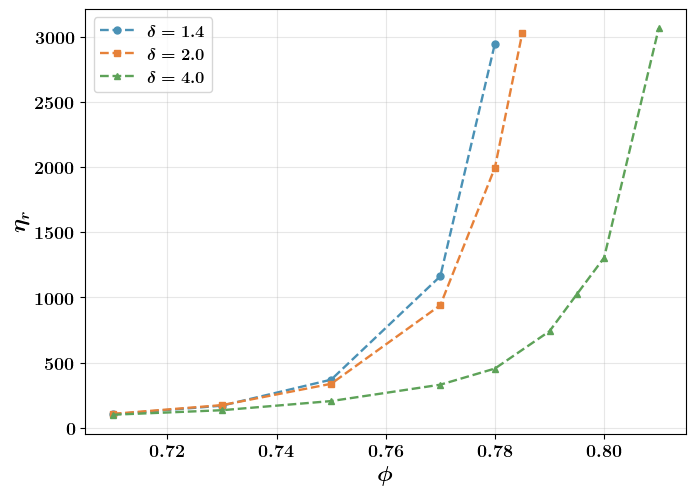

In [12]:
## mu =1 data plots

import matplotlib.pyplot as plt
import numpy as np
import os, glob
import platform

if platform.system() == "Darwin":  # macOS
    topDir = "/Users/rahul/mnt/sshfs_darwin/simulations/mu=1/"
elif platform.system() == "Linux":  # Linux
    topDir = "/home/rahul/mnt/sshfs_darwin/simulations/mu=1/"
else:
    raise RuntimeError("Unsupported OS")
#########################################################

# Setup
fig, ax = plt.subplots(figsize=(7, 5))  # single plot
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']

npp   = 1000
phiv  = [0.71, 0.73, 0.75, 0.77, 0.78, 0.781, 0.782, 0.783, 0.784, 0.785, 0.786, 0.788, 0.79, 0.791, 
        0.792, 0.795, 0.80, 0.81, 0.812, 0.815, 0.82, 0.83, 0.85]
arr  = [1.4, 2.0, 4.0]
vrr  = '0.5'
numRuns = 2
off     = 100

for j, arj in enumerate(arr):
    visc    = []
    err_std = []

    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []

        for run in range(numRuns):
            vrr_use = '0.25' if arj == 1 else vrr  # avoid name conflict
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                if len(data[:, 3]) > 1900:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)

        if visc_list:
            mean_visc = np.mean(visc_list)
            std_visc  = np.std(visc_list, ddof=0)  # sample standard deviation

            visc.append(mean_visc)
            err_std.append(std_visc)
        else:
            visc.append(np.nan)
            err_std.append(np.nan)

    # Filter NaNs
    visc_filtered     = [v for v in visc if not np.isnan(v)]
    phi_vals_filtered = [p for v, p in zip(visc, phiv) if not np.isnan(v)]
    err_std_filtered  = [e for v, e in zip(visc, err_std) if not np.isnan(v)]

    # Plot with symmetric error bars
#     ax.errorbar(phi_vals_filtered, visc_filtered, yerr=err_std_filtered, fmt=line_markers[j],
#                 linestyle='--', color=colors[j], capsize=3, label=fr'$\delta_r = {arj:.1f}$',
#                 linewidth=1.7)
    ax.plot(phi_vals_filtered, visc_filtered, line_markers[j],
            linestyle="--", color=colors[j], linewidth=1.7, label=fr'$\delta = {arj:.1f}$')


# Labels and style
ax.set_xlabel(r'$\phi$', fontsize=16)
ax.set_ylabel(r'$\eta_{r}$', fontsize=16)
ax.tick_params(labelsize=13)
ax.legend(fontsize=12, loc='upper left')
ax.grid(True, alpha=0.3)
fig.tight_layout()
plt.show()

For mu =1


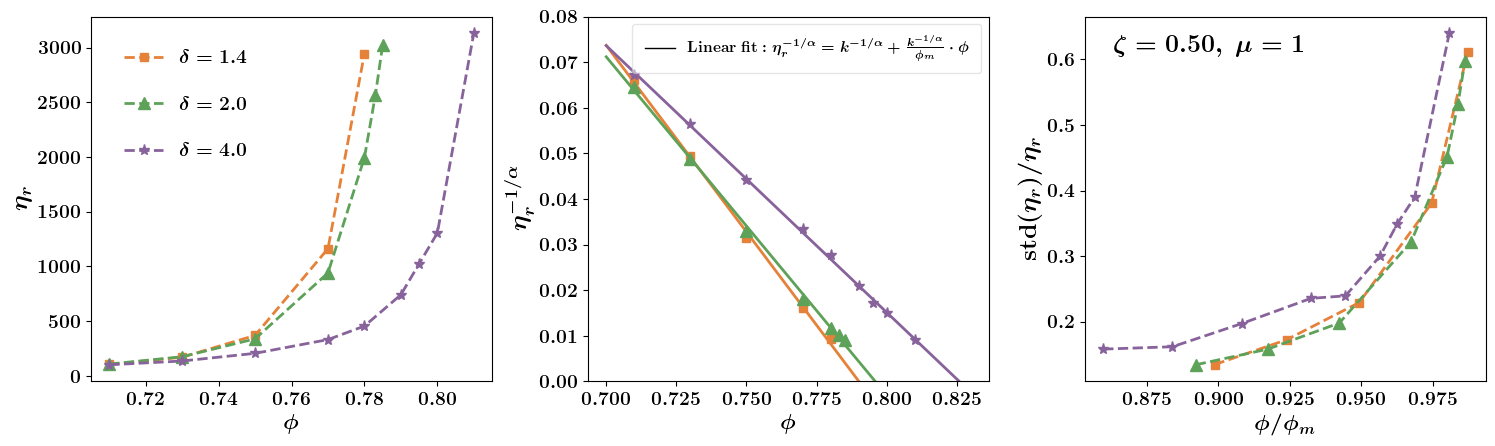

In [11]:
# Maron-Pierce for mu =1

from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import platform
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)
from sklearn.metrics import r2_score

if platform.system() == "Darwin":  # macOS
    topDir = "/Users/rahul/mnt/sshfs_darwin/simulations/mu=1/"
elif platform.system() == "Linux":  # Linux
    topDir = "/home/rahul/mnt/sshfs_darwin/simulations/mu=1/"
else:
    raise RuntimeError("Unsupported OS")
    
def linearfit(x, c, m):
    return m * x + c
#########################################################

# Color and marker settings
colors = ['#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['s', '^', '*', 'p']
marker_size = [6, 8, 8, 8]
line_width = 2

npp   = 1000
phiv  = [0.71, 0.73, 0.75, 0.77, 0.78, 0.783, 0.785, 0.786, 0.788, 0.79, 0.791, 
         0.792, 0.795, 0.80, 0.81, 0.812, 0.815, 0.82, 0.83, 0.85]
arr   = [1.4, 2.0, 4.0]
vrr   = '0.5'
numRuns = 2
gamma   = 20
off     = 100

c0s   = []
mvals = []

alpha = 1.7083 ## optimised based on linear fit

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

# Fig 1: Mean viscosity vs phi
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                if len(data[:, 3]) > 1900:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)
        visc.append(np.mean(visc_list) if visc_list else np.nan)

    visc_filtered     = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
    ax[0].plot(phi_vals_filtered, visc_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j], label=fr'$\delta = {arj:.1f}$')

#ax[0].set_ylim(0, 6200)
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].legend(frameon = False, loc='upper left', fontsize=14, labelspacing=1.5, borderpad=1.2)
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=14)


# Fig 2: Maron-Pierce fit
c0     = []
m_list = []
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir      = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                    visc_val = np.mean(data[off:, 3])
                    visc_list.append(visc_val)
        visc.append(np.mean(visc_list) if visc_list else np.nan)

    visc_filtered     = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
    
    popt, pcov   = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
    c_opt, m_opt = popt
    c0.append(c_opt)
    ax[1].plot(phi_vals_filtered, visc_filtered, linestyle='None',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j])

    m_list.append(m_opt)
    xx = np.linspace(0.70, .83, 100)
    yy = linearfit(xx, c_opt, m_opt)
    ax[1].plot(xx, yy, color=colors[j], linewidth=2)

c0s.append(c0)
mvals.append(m_list)

ax[1].plot([], [], color="k", 
           label=r"$\mathrm{Linear\ fit:}\ \eta_r^{-1/\alpha} = k^{-1/\alpha} + \frac{k^{-1/\alpha}}{\phi_m} \cdot \phi$")

leg = ax[1].legend(frameon=True, fontsize=11, loc="upper right", labelspacing=0.8, borderpad=0.8, framealpha=0.5)

ax[1].set_ylim(0, 0.08)
ax[1].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='y', labelsize=14)

x_intercept = -np.array(c0s) / np.array(mvals)
phims = list(x_intercept[0])

# Fig 3: Std deviation of viscosity vs phi
for j, arj in enumerate(arr):
    viscVar = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_var_list = []
        for run in range(numRuns):
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                if len(data[:, 3]) > (gamma*100 - off) and not jammed:
                    visc_var = np.std(data[off:, 3])/np.mean(data[off:, 3])
                    visc_var_list.append(visc_var)
        viscVar.append(np.mean(visc_var_list) if visc_var_list else np.nan)
    
    
    visc_var_filtered = [x for x in viscVar if not np.isnan(x)]
    phi_vals_filtered = [y/phims[j] for x, y in zip(viscVar, phiv) if not np.isnan(x)]
    #print(f'{visc_var_filtered[-1]}')
    ax[2].plot(phi_vals_filtered, visc_var_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j])

ax[2].text(0.55, 0.95, fr'$\zeta = {float(vrr):.2f}, \; \mu = 1$',
           fontsize=18,
           ha='right', va='top',
           transform=ax[2].transAxes,
           bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
ax[2].set_xlabel(r'$\phi/\phi_m$', fontsize=16, fontstyle='italic')
ax[2].tick_params(axis='x', labelsize=14)
ax[2].set_ylabel(r'$\mathrm{std}(\eta_r)/ \eta_{r}$', fontsize=18, fontstyle='italic')
ax[2].tick_params(axis='y', labelsize=14)
#ax[2].set_yscale('log')

fig.tight_layout()

if True:
    figFormat = ".pdf"
    plt.savefig(f'{fig_save_path}/linear_fit_mu=1{figFormat}', bbox_inches="tight", dpi=500)

print('For mu =1')
plt.show()

In [77]:
phims

[0.8015026164864472, 0.8076023667510134, 0.8402484766856277]

In [ ]:
## Frig and znet for mu =1

/tmp/ipykernel_876198/3753803362.py:71: RuntimeWarning: Mean of empty slice
  param.append(np.nanmean(param_list) if len(param_list) > 0 else np.nan)
/tmp/ipykernel_876198/3753803362.py:72: RuntimeWarning: Mean of empty slice
  paramserr.append(np.nanmean(paramserr_list) if len(paramserr_list) > 0 else np.nan)
/tmp/ipykernel_876198/3753803362.py:73: RuntimeWarning: Mean of empty slice
  zm.append(np.nanmean(zlist) if len(zlist) > 0 else np.nan)


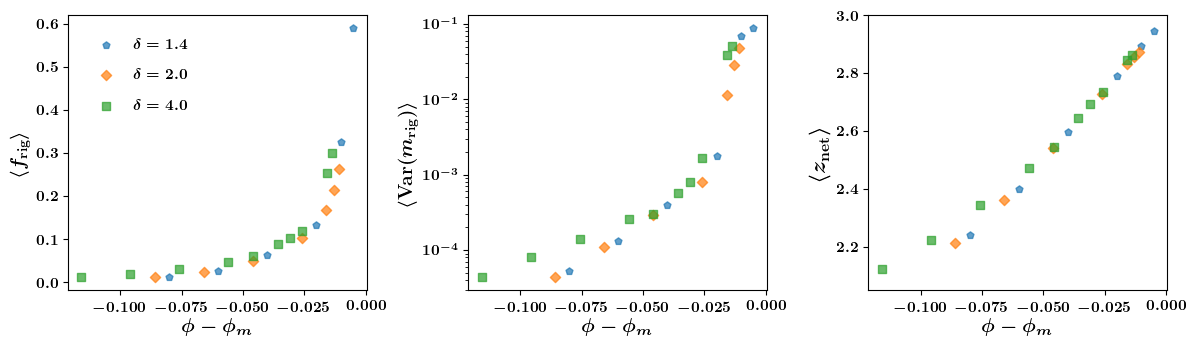

In [3]:
# import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML, display, Math
from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
import matplotlib.patches as patches

topDir = '/media/rahul/rahul_2TB/high_bidispersity/new_data/mu=1'

# Parameters
npp          = 1000
phiv = [0.71, 0.73, 0.75, 0.77, 0.78, 0.783, 0.785, 0.786, 0.788, 0.79, 0.791, 
        0.792, 0.795, 0.80, 0.81, 0.812, 0.815, 0.82, 0.83, 0.85]
phim  = np.array([0.7900862 , 0.79592323, 0.82586305])
arr          = [1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = '0.5'
numRuns      = 2
off          = 100
pcount       = 0
totParams    = 2 # total plots
ncols        = 2
nrows        = int(totParams/ ncols)
colors       = ['#1f77b4', '#ff7f0e', '#2ca02c', '#444444',
                '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
                '#bcbd22', '#17becf', '#f6a821', '#f6d020',
                '#003366', '#cc6699']
marker_shape = ['p', 'D', 's', '^', 'o', '*', '+', 'x', 'H', 'v', '<', '>', '|']
ylables      = [ r'$f_{rig}$', r'$\langle Z_{{net}} \rangle$']

phimall      = []
param        = []
paramserr    = []
zm = []
fig, ax= plt.subplots(1, 3, figsize=(12,3.5))


for j, arj in enumerate(arr):
    param     = []
    paramserr = []
    zm        = []
    for k, phi in enumerate(phiv):
        phir           = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        param_list     = []
        paramserr_list = []
        zlist = []
        for run in range(numRuns):
            phim_vals     = [(i - phim[j]) for i in phiv]
            workDir       = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrr}/run_{run+1}/"
            frigFile = workDir+"F_rig.txt"
            znetfile = workDir+"Z_Znet.txt"
            if os.path.exists(frigFile) and os.path.exists(znetfile):
                frigFile = workDir+"F_rig.txt"
                frig     = np.loadtxt(frigFile)/ npp

                znetFile = workDir+"Z_Znet.txt"
                znet     = np.loadtxt(znetFile)[:, 2]
                
                if len(frig) > off:
                    param_list.append(np.mean(frig[off:]))
                    paramserr_list.append(np.var(frig[off:]))
                    zlist.append(np.mean(znet[off:]))
                else:
                    param_list.append(np.nan)
                    paramserr_list.append(np.nan)
                    zlist.append(np.nan)
                    
        # Average over runs for this phi
        param.append(np.nanmean(param_list) if len(param_list) > 0 else np.nan)
        paramserr.append(np.nanmean(paramserr_list) if len(paramserr_list) > 0 else np.nan)
        zm.append(np.nanmean(zlist) if len(zlist) > 0 else np.nan)
        
    # Clean up for plotting
    param_filtered     = [x for x in param if not np.isnan(x)]
    paramerr_filtered  = [x for x in paramserr if not np.isnan(x)]
    phim_vals_filtered = [y for x, y in zip(param, phim_vals) if not np.isnan(x)]
    z_filtered         = [x for x in zm if not np.isnan(x)]
    
    ax[0].scatter(phim_vals_filtered, param_filtered, marker=marker_shape[pcount], 
                s=27, color=colors[pcount], alpha=0.7,  
                label = fr'$\delta = {arj:.1f}$')
    ax[1].scatter(phim_vals_filtered, paramerr_filtered, marker=marker_shape[pcount], 
                s=27, color=colors[pcount], alpha=0.7,  
                label = fr'$\delta = {arj:.1f}$')
    ax[2].scatter(phim_vals_filtered, z_filtered, marker=marker_shape[pcount], 
                  s=27, color=colors[pcount], alpha=0.7,  
                  label = fr'$\delta = {arj:.1f}$')    
    
    pcount += 1

# ax[0].plot([], [], ' ', label=" ") 
# ax[1].plot([], [], ' ', label=" ") 

labelfont = 14
tickfont  = 11  # You can adjust this as needed

for ax_i in ax:
    ax_i.tick_params(axis='both', labelsize=tickfont)

ax[0].set_xlabel(r'$\phi - \phi_m$', fontsize=labelfont)
ax[0].set_ylabel(r'$\langle f_{\mathrm{rig}} \rangle$', fontsize=labelfont)

ax[1].set_xlabel(r'$\phi - \phi_m$', fontsize=labelfont)
ax[1].set_ylabel(r'$\langle \mathrm{Var}(m_{\mathrm{rig}}) \rangle$', fontsize=labelfont)
ax[1].set_yscale('log')

ax[2].set_ylim(2.05, 3)
ax[2].set_xlabel(r'$\phi - \phi_m$', fontsize=labelfont)
ax[2].set_ylabel(r'$\langle z_{\mathrm{net}} \rangle$', fontsize=labelfont+2)
ax[0].legend(loc='upper left', fontsize=11, frameon=False, labelspacing=1.1, borderpad =1)

#fig.tight_layout()

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/frig_znet_plot_mu_1{figFormat}', bbox_inches="tight",dpi=800)

plt.show()

In [ ]:
## Force dot product

In [108]:
## Force dot prod for mu =1
import readFiles

# Particles data file
particleFile    = 'par_*.dat' 
interactionFile = 'int_*.dat'

# phiv    = [0.71, 0.73, 0.75, 0.77, 0.78, 0.783, 0.785, 0.786, 0.788, 0.79, 0.791, 
#            0.792, 0.795, 0.80, 0.81, 0.812, 0.815, 0.82, 0.83, 0.85]
phiv = [0.71] 
arr          = [1.4] #[1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = '0.5'
numRuns      = 1
off          = 100

for j in range(len(phiv)):
    phii = phiv[j]
    phii = '{:.3f}'.format(phiv[j]) if len(str(phiv[j]).split('.')[1]) > 2 else '{:.2f}'.format(phiv[j])
    for k in range(len(arr)):
        #dotProd
        for l in range(numRuns):
            dataname = f"{topDir}/NP_{npp}/phi_{phii}/ar_{arr[k]}/Vr_{vrr}/run_{l+1}"
            if os.path.exists(dataname):
                intPath = open(glob.glob(f'{dataname}/{interactionFile}')[0])
                intList = readFiles.interactionsList(intPath)
        
                parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
                parLines = parPath.readlines()
                parList1 = readFiles.readParFile(parPath)
        
                # box dimensions
                Lx = float(parLines[3].split()[2]) 
                Lz = float(parLines[3].split()[2])
        
                # setting up axis and box walls
                #_, ax = plt.subplots(1, 1, figsize=(5,5), dpi = 500)
                newLx = Lx + 2*arr[k]
                newLz = Lz + 2*arr[k]
                
                print("\n")
                # plotting frames
                for frame in range(off, len(intList)):
                    # position and radius data from par_*.dat
                    px = parList1[frame][:,2]
                    pz = parList1[frame][:,3]
                    pr = parList1[frame][:,1]
                    NP = len(pr)
                    
                    # interaction data from int_*.dat
                    frameList = intList[frame]
                    pi        = np.array([int(x) for x in frameList[:,0]])
                    pj        = np.array([int(x) for x in frameList[:,1]])
        
                    normxij   = frameList[:,2]
                    normzij   = frameList[:,4]
                    gapij     = frameList[:,5]
                    contState = frameList[:,10]
                    lubNorm   = frameList[:,6]
                    lubTangx  = frameList[:,7]
                    lubTangz  = frameList[:,9]
                    contNorm  = frameList[:,11]
                    contTangx = frameList[:,12]
                    contTangz = frameList[:,14]
                    repulNorm = frameList[:,16]
        
                    # normInts  = lubNorm + contNorm + repulNorm
                    # tangInts  = np.linalg.norm(np.array([lubTangx + contTangx, lubTangz + contTangz]), axis=0)
                    # totForce  = np.array([normInts, tangInts])
                    # forceNorm = np.einsum('ij,ij->i', totForce.T, np.column_stack((normxij, normzij)))
    
                    contTang = np.linalg.norm(np.array([contTangx, contTangz]), axis=0)
                    totContForce  = np.array([contNorm, contTang])
                    forceNorm = np.einsum('ij,ij->i', totContForce.T, np.column_stack((normxij, normzij))) * [normxij, normxij]

                    F1    =  forceNorm.T
                    F2    = -forceNorm.T
                    dot   = np.sum(F1 * F2, axis=1) # row wise dot product
                    norms = np.linalg.norm(F1) * np.linalg.norm(F2)
                    
                    theta     = np.arccos(dot / norms)   # radians
                    theta_deg = np.degrees(theta)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (2,2139)->(2,2139) (2139,2)->(2139,2) 

In [90]:
(forceNorm*[normxij, normxij]).shape

(2, 2126)

In [86]:
np.dot(forceNorm, forceNorm)/forceNorm.shape[0]

606.7591817713679

## Force weighted
### Fabric tensor

In [2]:
## Fabric tensor with force wighting

numRuns  = 2
npp      = 1000
off      = 100
gamma    = 20
colors   = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

############# mu =1 plot###############
# if platform.system() == 'Darwin':  # macOS
#     topDir = Path("/Volumes/rahul_2TB/high_bidispersity/new_data/mu=1")
#     fig_save_path = Path("/Users/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/")
# elif platform.system() == 'Linux':
#     topDir = Path("/media/rahul/rahul_2TB/high_bidispersity/new_data/mu=1")
#     fig_save_path = Path("/media/Linux_1TB/Dropbox (City College)/CUNY/research/bidisperse_project/figures/paper_figs/")
# else:
#     raise OSError("Unsupported OS")
    
workDir = Path(f'{topDir}/mu=1') # for mu=1

# Particles data file
particleFile    = 'par_*.dat' 
interactionFile = 'int_*.dat'

phiv = [0.71, 0.73, 0.75, 0.77, 0.78, 0.783, 0.785, 0.786, 0.788, 0.79, 0.791, 
        0.792, 0.795, 0.80, 0.81, 0.812, 0.815, 0.82, 0.83, 0.85]
arr  = [1.4, 2.0, 4.0] # no delta =1 for mu =1
vrr  = '0.5'
phim = np.array([0.7900862 , 0.79592323, 0.82586305])

a_mu_1      = []
phim_mu_1   = []
phi_mu_1    = []
eigvec_mu_1 = []

for k in range(len(arr)):
    anisotropy_all = []
    eig_vec_ar     = []
    for j in range(len(phiv)):
        phii = phiv[j]
        phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
        anisotropy_list = []
        eig_vec_list    = []
        for l in range(numRuns):
            dataname = f"{workDir}/NP_{npp}/phi_{phii}/ar_{arr[k]}/Vr_{vrr}/run_{l+1}"
            if os.path.exists(dataname):
                intPath = open(glob.glob(f'{dataname}/{interactionFile}')[0])
                intList = readFiles.interactionsList(intPath)

                dataFile = glob.glob(f'{dataname}/data_*.dat')[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                complete = len(intList) > gamma *100 - off
                
                if complete and not jammed:
                    parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
                    # parLines = parPath.readlines()
                    parList1 = readFiles.readParFile(parPath)
    
                    #anisotropy_frame = []
                    for frame in range(off, len(intList)):
                        # interaction data from int_*.dat
                        frameList = intList[frame]
                        normxij   = frameList[:,2 ]
                        normzij   = frameList[:,4 ]
                        gapij     = frameList[:,5 ]
                        contState = frameList[:,10]
                        lubNorm   = frameList[:,6 ]
                        lubTangx  = frameList[:,7 ]
                        lubTangz  = frameList[:,9 ]
                        contNorm  = frameList[:,11]
                        contTangx = frameList[:,12]
                        contTangz = frameList[:,14]
                        repulNorm = frameList[:,16]

                        contTang      = np.linalg.norm(np.array([contTangx, contTangz]), axis=0)
                        totContForce  = np.array([contNorm, contTang])
                        force_mag     = np.linalg.norm(totContForce, axis=0)    
                        n_hat         = np.column_stack((normxij, normzij))
                        fabric_tensor = np.einsum('n,ni,nj->ij', force_mag, n_hat, n_hat) / np.sum(force_mag)

                        eigvals, eigvecs = np.linalg.eigh(fabric_tensor)
                        anisotropy       = 1 - (eigvals.min()/ eigvals.max())
                        anisotropy_list.append(anisotropy)
                        
                        eig_vec_list.append(eigvecs)
                        
        anisotropy_all.append(np.mean(anisotropy_list) if anisotropy_list else np.nan)
        eig_vec_ar.append(eig_vec_list)
        
    anisotrophy_filtered = [x for x in anisotropy_all if not np.isnan(x)]
    phim_filtered        = [y/phim[k] for x,y in zip(anisotropy_all, phiv) if not np.isnan(x)] 
    phi_vals             = [y for x,y in zip(anisotropy_all, phiv) if not np.isnan(x)]
    
    eigvec_mu_1.append(eig_vec_ar)
    
    a_mu_1.append(anisotrophy_filtered)
    phim_mu_1.append(phim_filtered)
    phi_mu_1.append(phi_vals)
    
##################### Mu = inf #####################

phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = '0.5'
phim = np.array([0.78810233, 0.78837106, 0.79850379, 0.827624])

a_mu_inf      = []
phim_mu_inf   = [] 
phi_mu_inf    = []
eigvec_mu_inf = []

for k in range(len(arr)):
    anisotropy_all = []
    eig_vec_ar     = []
    for j in range(len(phiv)):
        phii = phiv[j]
        phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
        anisotropy_list = []
        eig_vec_list = []
        for l in range(numRuns):
            vrj = '0.25' if arr[k] == 1 else vrr
            dataname = f"{topDir}/NP_{npp}/phi_{phii}/ar_{arr[k]}/Vr_{vrj}/run_{l+1}"
            if os.path.exists(dataname):
                intPath  = open(glob.glob(f'{dataname}/{interactionFile}')[0])
                intList  = readFiles.interactionsList(intPath)
                
                dataFile = glob.glob(f'{dataname}/data_*.dat')[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                complete = len(intList) > gamma *100 - off
                
                if complete and not jammed:
                    parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
                    parList1 = readFiles.readParFile(parPath)
    
                    #anisotropy_frame = []
                    for frame in range(off, len(intList)):
                        # interaction data from int_*.dat
                        frameList = intList[frame]
                        normxij   = frameList[:,2 ]
                        normzij   = frameList[:,4 ]
                        gapij     = frameList[:,5 ]
                        contState = frameList[:,10]
                        contNorm  = frameList[:,11]
                        contTangx = frameList[:,12]
                        contTangz = frameList[:,14]
                        repulNorm = frameList[:,16]

                        contTang      = np.linalg.norm(np.array([contTangx, contTangz]), axis=0)
                        totContForce  = np.array([contNorm, contTang])
                        force_mag     = np.linalg.norm(totContForce, axis=0)    
                        n_hat         = np.column_stack((normxij, normzij))
                        
                        fabric_tensor    = np.einsum('n,ni,nj->ij', force_mag, n_hat, n_hat) / np.sum(force_mag)
                        eigvals, eigvecs = np.linalg.eigh(fabric_tensor)
                        anisotropy       = 1 - (eigvals.min()/ eigvals.max())
                        anisotropy_list.append(anisotropy)

                        eig_vec_list.append(eigvecs)
        
        anisotropy_all.append(np.mean(anisotropy_list) if anisotropy_list else np.nan)
        eig_vec_ar.append(eig_vec_list)
        
    anisotrophy_filtered = [x for x in anisotropy_all if not np.isnan(x)]
    phim_filtered        = [y/phim[k] for x,y in zip(anisotropy_all, phiv) if not np.isnan(x)] 
    phi_vals             = [y for x,y in zip(anisotropy_all, phiv) if not np.isnan(x)]
    
    eigvec_mu_inf.append(eig_vec_ar)
    
    a_mu_inf.append(anisotrophy_filtered)
    phim_mu_inf.append(phim_filtered)
    phi_mu_inf.append(phi_vals)
    
print('force weighted anisotropy calculations are completed')

In [3]:
## Making pickle
# force wighted

import pickle
import os

save_path = f'{fig_save_path}/anisotropy_force_weighted.pkl'

# Collect the lists
data_to_pickle = {
    #mu=1
    'phim_mu_1': phim_mu_1,
    'phi_mu_1': phi_mu_1,
    'a_mu_1': a_mu_1,
    'eigvec_mu_1': eigvec_mu_1,
    
    #mu=inf
    'phim_mu_inf': phim_mu_inf,
    'phi_mu_inf': phi_mu_inf,
    'a_mu_inf': a_mu_inf,
    'eigvec_mu_inf': eigvec_mu_inf,
}

# Save to the specified path
with open(save_path, 'wb') as f:
    pickle.dump(data_to_pickle, f)

In [12]:
## Reading pickle
# force weighted

import pickle
#fig_save_path = '/home/rahul/City College Dropbox/Rahul Pandare/CUNY/research/bidisperse_project/figures/paper_figs/'
save_path     = f'{fig_save_path}/anisotropy_force_weighted.pkl'

# Load the pickle
with open(save_path, 'rb') as f:
    loaded_data = pickle.load(f)

# Access the lists
#mu=1
phim_mu_1   = loaded_data['phim_mu_1']
phi_mu_1    = loaded_data['phi_mu_1']
a_mu_1      = loaded_data['a_mu_1']
eigvec_mu_1 = loaded_data['eigvec_mu_1']

#mu=inf
phim_mu_inf   = loaded_data['phim_mu_inf']
phi_mu_inf    = loaded_data['phi_mu_inf']
a_mu_inf      = loaded_data['a_mu_inf']
eigvec_mu_inf = loaded_data['eigvec_mu_inf']

# Example: print the first element of phi_mu_1
print(phi_mu_1[0])
#print(eigvec_mu_inf)

[0.71, 0.73, 0.75, 0.77, 0.78]


In [11]:
(eigvec_mu_inf[2])

[[array([[-0.73153306, -0.68180597],
         [-0.68180597,  0.73153306]]),
  array([[-0.73485154, -0.678228  ],
         [-0.678228  ,  0.73485154]]),
  array([[-0.73777378, -0.67504804],
         [-0.67504804,  0.73777378]]),
  array([[-0.73276993, -0.68047647],
         [-0.68047647,  0.73276993]]),
  array([[-0.71209075, -0.70208744],
         [-0.70208744,  0.71209075]]),
  array([[-0.68867539, -0.72506979],
         [-0.72506979,  0.68867539]]),
  array([[-0.68218785, -0.73117695],
         [-0.73117695,  0.68218785]]),
  array([[-0.67983492, -0.73336517],
         [-0.73336517,  0.67983492]]),
  array([[-0.66815274, -0.74402414],
         [-0.74402414,  0.66815274]]),
  array([[-0.663897  , -0.74782403],
         [-0.74782403,  0.663897  ]]),
  array([[-0.65940796, -0.75178531],
         [-0.75178531,  0.65940796]]),
  array([[-0.65292676, -0.75742105],
         [-0.75742105,  0.65292676]]),
  array([[-0.65058785, -0.75943101],
         [-0.75943101,  0.65058785]]),
  array([[-0

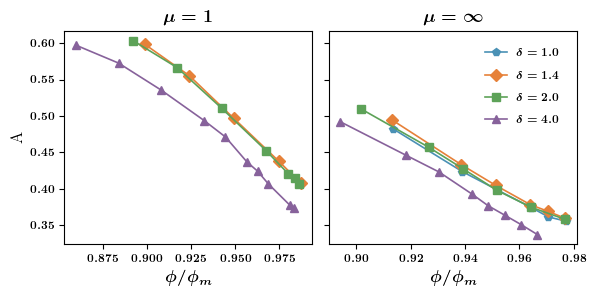

In [4]:
## plotting with force weighting
## mu =1 and mu =inf

vrr  = '0.5'
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(6,3))

# mu = 1 plots
arr  = [1.4, 2.0, 4.0] # no delta =1 for mu =1
for i in range(len(a_mu_1)):
    ax[0].plot(phim_mu_1[i], a_mu_1[i], color=colors[i+1],
               label=fr'$\delta = {arr[i]}$', linewidth=1.2,
               marker=marker_shape[i+1], markersize=6)

# mu = ∞ plots
arr  = [1.0, 1.4, 2.0, 4.0]
for i in range(len(a_mu_inf)):
    ax[1].plot(phim_mu_inf[i], a_mu_inf[i], color=colors[i],
               label=fr'$\delta = {arr[i]}$', linewidth=1.2,
               marker=marker_shape[i], markersize=6)

# titles
ax[0].set_title(r"$\mathbf{\mu = 1}$", fontsize=13, pad=6)
ax[1].set_title(r"$\mathbf{\mu = \infty}$", fontsize=13, pad=6)

# legend only on second plot
ax[1].legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

# labels
ax[0].set_xlabel(r'$\phi/\phi_m$', fontsize=12, fontweight='bold')
ax[1].set_xlabel(r'$\phi/\phi_m$', fontsize=12, fontweight='bold')
ax[0].set_ylabel('A', fontsize=12, fontweight='bold')
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

# ticks
ax[0].tick_params(axis='y', labelleft=True)   # y numbers ON for left plot
ax[1].tick_params(axis='y', labelleft=False)  # y numbers OFF for right plot

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/anisotropy_mu_1_inf_force_weighted{figFormat}', bbox_inches="tight",dpi=800)

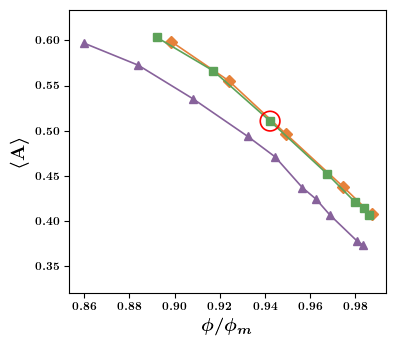

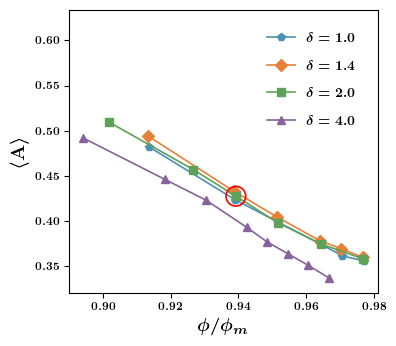

In [49]:
## seperate plots (force weighted)
# with circles

from matplotlib.patches import Circle
# save fig
figSave = True

# params
vrr          = '0.5'
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

# Compute y-axis limits across all datasets
all_data = np.concatenate([np.concatenate(a_mu_1), np.concatenate(a_mu_inf)])
ymin, ymax = all_data.min()*0.95, all_data.max()*1.05

# ============ mu = 1 plot ============
fig1, ax1 = plt.subplots(figsize=(4,3.5))
arr = [1.4, 2.0, 4.0]
for i in range(len(a_mu_1)):
    ax1.plot(phim_mu_1[i], a_mu_1[i], color=colors[i+1],
             label=fr'$\delta = {arr[i]}$', linewidth=1.2,
             marker=marker_shape[i+1], markersize=6)

# highlight arr == 2.0 case (index 1)
ax1.scatter(phim_mu_1[-2][2], a_mu_1[-2][2], s=200, facecolors='none', edgecolors='red', linewidths=1.2, zorder=5)

#ax1.set_title(r"$\mathbf{\mu = 1}$", fontsize=13, pad=6)
ax1.set_xlabel(r'$\phi/\phi_m$', fontsize=13, fontweight='bold')
ax1.set_ylabel(r'$\langle \mathbf{A} \rangle$', fontsize=14, fontweight='bold')
ax1.set_ylim(ymin, ymax)  # enforce same y-axis limits
#ax1.legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

if figSave:
    fig1.tight_layout()
    fig1.savefig(f'{fig_save_path}/anisotropy_force_mu_1_plot.pdf', dpi=800, bbox_inches='tight')

# ============ mu = ∞ plot =========
fig2, ax2 = plt.subplots(figsize=(4,3.5))
arr = [1.0, 1.4, 2.0, 4.0]
for i in range(len(a_mu_inf)):
    ax2.plot(phim_mu_inf[i], a_mu_inf[i], color=colors[i],
             label=fr'$\delta = {arr[i]}$', linewidth=1.2,
             marker=marker_shape[i], markersize=6)

# highlight arr == 2.0 case (index 2)
ax2.scatter(phim_mu_inf[-2][2], a_mu_inf[-2][2],
            s=200, facecolors='none', edgecolors='red', linewidths=1.2,
            zorder=5)

#ax2.set_title(r"$\mathbf{\mu = \infty}$", fontsize=13, pad=6)
ax2.set_xlabel(r'$\phi/\phi_m$', fontsize=13, fontweight='bold')
ax2.set_ylabel(r'$\langle \mathbf{A} \rangle$', fontsize=14, fontweight='bold')
ax2.set_ylim(ymin, ymax)  # same y-axis limits
ax2.legend(frameon=False, fontsize=10, borderpad=1.1, labelspacing=1.1, loc='upper right')

if figSave:
    fig2.tight_layout()
    fig2.savefig(f'{fig_save_path}/anisotropy_force__mu_inf_plot.pdf', dpi=800, bbox_inches='tight')

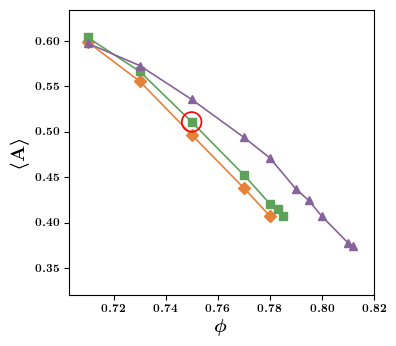

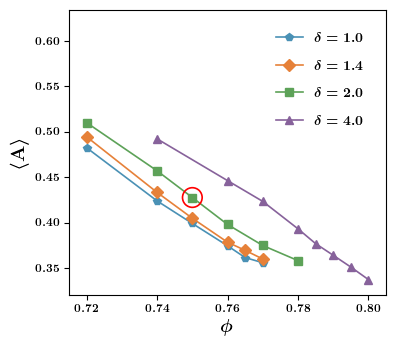

In [59]:
## seperate plots (force weighted)
# Not phim
# with circles

from matplotlib.patches import Circle
# save fig
figSave = True

# params
vrr          = '0.5'
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

# Compute y-axis limits across all datasets
all_data = np.concatenate([np.concatenate(a_mu_1), np.concatenate(a_mu_inf)])
ymin, ymax = all_data.min()*0.95, all_data.max()*1.05

all_phi = np.concatenate([np.concatenate(phi_mu_1), np.concatenate(phi_mu_inf)])
xmin, xmax = all_phi.min()*0.99, all_phi.max()*1.01

# ============ mu = 1 plot ============
fig1, ax1 = plt.subplots(figsize=(4,3.5))
arr = [1.4, 2.0, 4.0]
for i in range(len(a_mu_1)):
    ax1.plot(phi_mu_1[i], a_mu_1[i], color=colors[i+1],
             label=fr'$\delta = {arr[i]}$', linewidth=1.2,
             marker=marker_shape[i+1], markersize=6)

# highlight arr == 2.0 case (index 1)
ax1.scatter(phi_mu_1[-2][2], a_mu_1[-2][2], s=200, facecolors='none', edgecolors='red', linewidths=1.2, zorder=5)

#ax1.set_title(r"$\mathbf{\mu = 1}$", fontsize=13, pad=6)
ax1.set_xlabel(r'$\phi$', fontsize=13, fontweight='bold')
ax1.set_ylabel(r'$\langle \mathbf{A} \rangle$', fontsize=14, fontweight='bold')
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)
#ax1.legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

if figSave:
    fig1.tight_layout()
    fig1.savefig(f'{fig_save_path}/anisotropy_force_mu_1_phi.pdf', dpi=800, bbox_inches='tight')

# ============ mu = ∞ plot =========
fig2, ax2 = plt.subplots(figsize=(4,3.5))
arr = [1.0, 1.4, 2.0, 4.0]
for i in range(len(a_mu_inf)):
    ax2.plot(phi_mu_inf[i], a_mu_inf[i], color=colors[i],
             label=fr'$\delta = {arr[i]}$', linewidth=1.2,
             marker=marker_shape[i], markersize=6)

# highlight arr == 2.0 case (index 2)
ax2.scatter(phi_mu_inf[-2][2], a_mu_inf[-2][2],
            s=200, facecolors='none', edgecolors='red', linewidths=1.2,
            zorder=5)

#ax2.set_title(r"$\mathbf{\mu = \infty}$", fontsize=13, pad=6)
ax2.set_xlabel(r'$\phi$', fontsize=13, fontweight='bold')
ax2.set_ylabel(r'$\langle \mathbf{A} \rangle$', fontsize=14, fontweight='bold')
ax2.set_xlim(0.715, 0.805)
ax2.set_ylim(ymin, ymax)
ax2.legend(frameon=False, fontsize=10, borderpad=1.1, labelspacing=1.1, loc='upper right')

if figSave:
    fig2.tight_layout()
    fig2.savefig(f'{fig_save_path}/anisotropy_force_mu_inf_phi.pdf', dpi=800, bbox_inches='tight')

## Non-force weighted
### Fabric tensor

In [23]:
## Fabric tensor
## not foce weighted

#import readFiles

#fig, ax  = plt.subplots(1,2, figsize=(6, 3))
numRuns  = 2
npp      = 1000
off      = 100
gamma    = 20
colors = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

################### mu =1 plot ###################

workDir = Path(f'{topDir}/mu=1') # for mu=1

# Particles data file
particleFile    = 'par_*.dat' 
interactionFile = 'int_*.dat'

phiv = [0.71, 0.73, 0.75, 0.77, 0.78, 0.783, 0.785, 0.786, 0.788, 0.79, 0.791, 
        0.792, 0.795, 0.80, 0.81, 0.812, 0.815, 0.82, 0.83, 0.85]
arr  = [1.4, 2.0, 4.0] # no delta =1 for mu =1
vrr  = '0.5'
phim = np.array([0.7900862 , 0.79592323, 0.82586305])

a_mu_1      = []
phim_mu_1   = [] 
phi_mu_1    = []
eigvec_mu_1 = []

for k in range(len(arr)):
    anisotropy_all = []
    eig_vec_all    = []
    for j in range(len(phiv)):
        phii = phiv[j]
        phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
        anisotropy_list = []
        eig_vec_list    = []
        for l in range(numRuns):
            dataname = f"{workDir}/NP_{npp}/phi_{phii}/ar_{arr[k]}/Vr_{vrr}/run_{l+1}"
            if os.path.exists(dataname):
                intPath = open(glob.glob(f'{dataname}/{interactionFile}')[0])
                intList = readFiles.interactionsList(intPath)

                dataFile = glob.glob(f'{dataname}/data_*.dat')[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                complete = len(intList) > gamma *100 - off
                
                if complete and not jammed:
                    parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
                    # parLines = parPath.readlines()
                    parList1 = readFiles.readParFile(parPath)
    
                    #anisotropy_frame = []
                    for frame in range(off, len(intList)):
                        # interaction data from int_*.dat
                        frameList = intList[frame]
                        normxij   = frameList[:,2]
                        normzij   = frameList[:,4]
                        contNorm  = frameList[:,11]
                        contTangx = frameList[:,12]
                        contTangz = frameList[:,14]
    
                        n_hat         = np.column_stack((normxij, normzij))
                        fabric_tensor = np.einsum('ni,nj->ij', n_hat, n_hat) / n_hat.shape[0]
    
                        eigvals, eigvecs = np.linalg.eigh(fabric_tensor)
                        #anisotropy       = (eigvals.max() - eigvals.min()) / (eigvals.max() + eigvals.min())
                        anisotropy       = 1 - (eigvals.min()/ eigvals.max())
                        #print("Fabric anisotropy:", anisotropy)
                        anisotropy_list.append(anisotropy)
                        eig_vec_list.append(eigvecs)
                        
        anisotropy_all.append(np.mean(anisotropy_list) if anisotropy_list else np.nan)
        eig_vec_all.append(eig_vec_list)
        
    anisotrophy_filtered = [x for x in anisotropy_all if not np.isnan(x)]
    phim_filtered        = [y/phim[k] for x,y in zip(anisotropy_all, phiv) if not np.isnan(x)] 
    phi_filtered         = [y for x,y in zip(anisotropy_all, phiv) if not np.isnan(x)] 
    
    eigvec_mu_1.append(eig_vec_all)
    a_mu_1.append(anisotrophy_filtered)
    phim_mu_1.append(phim_filtered)
    phi_mu_1.append(phi_filtered)


##################################### Mu = inf #####################################

phiv         = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr          = [1.0, 1.4, 2.0, 4.0] # 1.0 is a seperate case
vrr          = '0.5'
phim = np.array([0.78810233, 0.78837106, 0.79850379, 0.827624])

a_mu_inf       = []
phim_mu_inf    = [] 
phi_mu_inf     = []
eig_vec_mu_inf = []

for k in range(len(arr)):
    anisotropy_all = []
    eig_vec_all    = []
    for j in range(len(phiv)):
        phii = phiv[j]
        phii = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
        anisotropy_list = []
        eig_vec_list    = []
        for l in range(numRuns):
            vrj = '0.25' if arr[k] == 1 else vrr
            dataname = f"{topDir}/NP_{npp}/phi_{phii}/ar_{arr[k]}/Vr_{vrj}/run_{l+1}"
            if os.path.exists(dataname):
                intPath = open(glob.glob(f'{dataname}/{interactionFile}')[0])
                intList = readFiles.interactionsList(intPath)
                
                dataFile = glob.glob(f'{dataname}/data_*.dat')[0]
                data     = np.loadtxt(dataFile)
                jammed   = any(x < 0 for x in data[:, 2])
                complete = len(intList) > gamma *100 - off
                
                if complete and not jammed:
                    parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
                    # parLines = parPath.readlines()
                    parList1 = readFiles.readParFile(parPath)
    
                    #anisotropy_frame = []
                    for frame in range(off, len(intList)):
                        # interaction data from int_*.dat
                        frameList = intList[frame]
                        normxij   = frameList[:,2]
                        normzij   = frameList[:,4]
                        contNorm  = frameList[:,11]
                        contTangx = frameList[:,12]
                        contTangz = frameList[:,14]
    
                        n_hat         = np.column_stack((normxij, normzij))
                        fabric_tensor = np.einsum('ni,nj->ij', n_hat, n_hat) / n_hat.shape[0]
    
                        eigvals, eigvecs = np.linalg.eigh(fabric_tensor)
                        anisotropy       = 1 - (eigvals.min()/ eigvals.max())
                        anisotropy_list.append(anisotropy)
                        eig_vec_list.append(eigvecs)
                    
        anisotropy_all.append(np.mean(anisotropy_list) if anisotropy_list else np.nan)
        eig_vec_all.append(eig_vec_list)
        
    anisotrophy_filtered  = [x for x in anisotropy_all if not np.isnan(x)]
    phim_filtered         = [y/phim[k] for x,y in zip(anisotropy_all, phiv) if not np.isnan(x)] 
    phi_filtered          = [y for x,y in zip(anisotropy_all, phiv) if not np.isnan(x)]
    
    eig_vec_mu_inf.append(eig_vec_all)
    a_mu_inf.append(anisotrophy_filtered)
    phim_mu_inf.append(phim_filtered)
    phi_mu_inf.append(phi_filtered)
    
print('non-force weighted anisotropy calculations are completed')

non-force weighted anisotropy calculations are completed


In [27]:
## Making pickle
# not force weighted

import pickle
import os

# Directory where you want to save the pickle
save_path = f'{fig_save_path}/anisotropy_not_force_weighted.pkl'

# Collect the lists
data_to_pickle = {
    #mu=1
    'phim_mu_1': phim_mu_1,
    'phi_mu_1': phi_mu_1,
    'a_mu_1': a_mu_1,
    'eigvec_mu_1': eigvec_mu_1,
    
    #mu=inf
    'phim_mu_inf': phim_mu_inf,
    'phi_mu_inf': phi_mu_inf,
    'a_mu_inf': a_mu_inf,
    'eigvec_mu_inf': eigvec_mu_inf,
}

# Save to the specified path
with open(save_path, 'wb') as f:
    pickle.dump(data_to_pickle, f)

In [32]:
## Reading pickle
#not force weighted

import pickle

# Path to the pickle file
save_path = f'{fig_save_path}/anisotropy_not_force_weighted.pkl'

# Load the pickle
with open(save_path, 'rb') as f:
    loaded_data = pickle.load(f)

# Access the lists
#mu=1
phim_mu_1   = loaded_data['phim_mu_1']
phi_mu_1    = loaded_data['phi_mu_1']
a_mu_1      = loaded_data['a_mu_1']
eigvec_mu_1 = loaded_data['eigvec_mu_1']

#mu=inf
phim_mu_inf   = loaded_data['phim_mu_inf']
phi_mu_inf    = loaded_data['phi_mu_inf']
a_mu_inf      = loaded_data['a_mu_inf']
eigvec_mu_inf = loaded_data['eigvec_mu_inf']

# Example: print the first element of phi_mu_1
print(phi_mu_1[0])
eigvec_mu_inf[0][0][100]

[0.71, 0.73, 0.75, 0.77, 0.78]


array([[-0.60006814, -0.79994889],
       [-0.79994889,  0.60006814]])

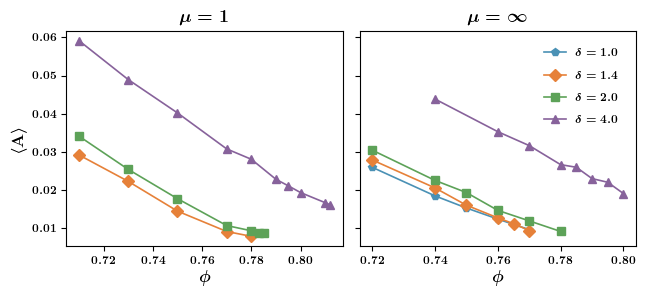

In [8]:
## plotting (not force weighted)
## mu =1 and mu =inf

vrr  = '0.5'
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(6.5,3))

# mu = 1 plots
arr  = [1.4, 2.0, 4.0] # no delta =1 for mu =1
for i in range(len(a_mu_1)):
    ax[0].plot(phi_mu_1[i], a_mu_1[i], color=colors[i+1],
               label=fr'$\delta = {arr[i]}$', linewidth=1.2,
               marker=marker_shape[i+1], markersize=6)


# mu = ∞ plots
arr  = [1.0, 1.4, 2.0, 4.0]
for i in range(len(a_mu_inf)):
    ax[1].plot(phi_mu_inf[i], a_mu_inf[i], color=colors[i],
               label=fr'$\delta = {arr[i]}$', linewidth=1.2,
               marker=marker_shape[i], markersize=6)

# titles
ax[0].set_title(r"$\mathbf{\mu = 1}$", fontsize=13, pad=6)
ax[1].set_title(r"$\mathbf{\mu = \infty}$", fontsize=13, pad=6)

# legend only on second plot
ax[1].legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

# labels
ax[0].set_xlabel(r'$\phi$', fontsize=12, fontweight='bold')
ax[1].set_xlabel(r'$\phi$', fontsize=12, fontweight='bold')
ax[0].set_ylabel(r'$\langle \mathbf{A} \rangle$', fontsize=12, fontweight='bold')
# ax[0].set_yscale('log')
# ax[1].set_yscale('log')

# ticks
ax[0].tick_params(axis='y', labelleft=True)   # y numbers ON for left plot
ax[1].tick_params(axis='y', labelleft=False)  # y numbers OFF for right plot

if True:
    figFormat=".pdf"
    plt.savefig(f'{fig_save_path}/anisotropy_mu_1{figFormat}', bbox_inches="tight",dpi=800)

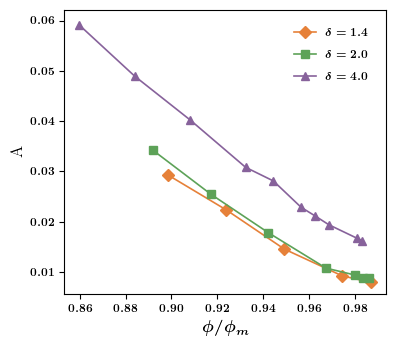

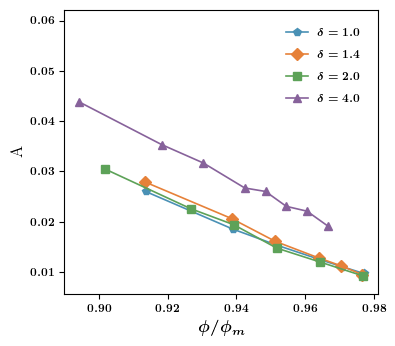

In [22]:
## seperate plots (not force weighted)

import matplotlib.pyplot as plt
import numpy as np

vrr  = '0.5'
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
marker_shape = ['p', 'D', 's', '^', 'o']

# Compute y-axis limits across all datasets
all_data = np.concatenate([np.concatenate(a_mu_1), np.concatenate(a_mu_inf)])
ymin, ymax = all_data.min()*0.7, all_data.max()*1.05

# === mu = 1 plot ===
fig1, ax1 = plt.subplots(figsize=(4,3.5))
arr = [1.4, 2.0, 4.0]
for i in range(len(a_mu_1)):
    ax1.plot(phi_mu_1[i], a_mu_1[i], color=colors[i+1],
             label=fr'$\delta = {arr[i]}$', linewidth=1.2,
             marker=marker_shape[i+1], markersize=6)

#ax1.set_title(r"$\mathbf{\mu = 1}$", fontsize=13, pad=6)
ax1.set_xlabel(r'$\phi/\phi_m$', fontsize=12, fontweight='bold')
ax1.set_ylabel('A', fontsize=12, fontweight='bold')
ax1.set_ylim(ymin, ymax)  # enforce same y-axis limits
ax1.legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

fig1.tight_layout()
fig1.savefig(f'{fig_save_path}/anisotropy_mu_1_plot.png', dpi=800, bbox_inches='tight')


# === mu = ∞ plot ===
fig2, ax2 = plt.subplots(figsize=(4,3.5))
arr = [1.0, 1.4, 2.0, 4.0]
for i in range(len(a_mu_inf)):
    ax2.plot(phi_mu_inf[i], a_mu_inf[i], color=colors[i],
             label=fr'$\delta = {arr[i]}$', linewidth=1.2,
             marker=marker_shape[i], markersize=6)

#ax2.set_title(r"$\mathbf{\mu = \infty}$", fontsize=13, pad=6)
ax2.set_xlabel(r'$\phi/\phi_m$', fontsize=12, fontweight='bold')
ax2.set_ylabel('A', fontsize=12, fontweight='bold')
ax2.set_ylim(ymin, ymax)  # same y-axis limits
ax2.legend(frameon=False, borderpad=1.1, labelspacing=1.1, loc='upper right')

fig2.tight_layout()
fig2.savefig(f'{fig_save_path}/anisotropy_mu_inf_plot.png', dpi=800, bbox_inches='tight')

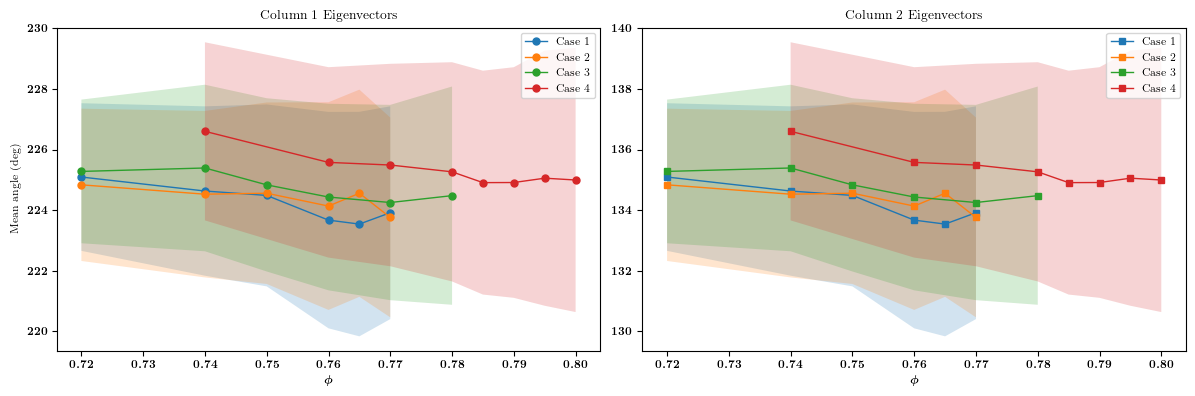

In [136]:
## Eigen vector

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import circmean, circstd

phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
arr  = [1.4, 2.0, 4.0]

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharey=False)

for ii in range(len(eigvec_all)):
    phi_vals = []
    mean_angles_col1 = []
    mean_angles_col2 = []
    std_angles_col1 = []
    std_angles_col2 = []

    for jj in range(len(eigvec_all[ii])):
        vectors_list = eigvec_all[ii][jj]
        if vectors_list:
            phi_vals.append(phiv[jj])
            
            col1_angles = []
            col2_angles = []
            
            for arr in vectors_list:
                # Normalize columns separately
                col1 = arr[:, 0] / np.linalg.norm(arr[:, 0])
                col2 = arr[:, 1] / np.linalg.norm(arr[:, 1])
                
                # Compute angles in degrees
                angle1 = np.degrees(np.mod(np.arctan2(col1[1], col1[0]), 2*np.pi))
                angle2 = np.degrees(np.mod(np.arctan2(col2[1], col2[0]), 2*np.pi))
                
                col1_angles.append(angle1)
                col2_angles.append(angle2)
            
            # Circular mean and std per column
            mean_angles_col1.append(np.degrees(circmean(np.radians(col1_angles), high=360, low=0)))
            std_angles_col1.append(np.degrees(circstd(np.radians(col1_angles), high=2*np.pi, low=0)))
            
            mean_angles_col2.append(np.degrees(circmean(np.radians(col2_angles), high=360, low=0)))
            std_angles_col2.append(np.degrees(circstd(np.radians(col2_angles), high=2*np.pi, low=0)))
    
    # Convert to arrays
    phi_vals = np.array(phi_vals)
    mean_angles_col1 = np.array(mean_angles_col1)
    std_angles_col1 = np.array(std_angles_col1)
    mean_angles_col2 = np.array(mean_angles_col2)
    std_angles_col2 = np.array(std_angles_col2)
    
    # Plot for column 1
    axes[0].plot(phi_vals, mean_angles_col1, marker='o', label=f'Case {ii+1}')
    axes[0].fill_between(phi_vals, mean_angles_col1 - std_angles_col1, mean_angles_col1 + std_angles_col1, alpha=0.2)
    
    # Plot for column 2
    axes[1].plot(phi_vals, mean_angles_col2, marker='s', label=f'Case {ii+1}')
    axes[1].fill_between(phi_vals, mean_angles_col2 - std_angles_col2, mean_angles_col2 + std_angles_col2, alpha=0.2)

# Labels, legends, and grid
axes[0].set_xlabel(r'$\phi$')
axes[0].set_ylabel('Mean angle (deg)')
axes[0].set_title('Column 1 Eigenvectors')
axes[0].legend(fontsize=8)
axes[0].grid(False)

axes[1].set_xlabel(r'$\phi$')
axes[1].set_title('Column 2 Eigenvectors')
axes[1].legend(fontsize=8)
axes[1].grid(False)

plt.tight_layout()
plt.show()

In [10]:
phi_mu_inf

[[0.72, 0.74, 0.75, 0.76, 0.765, 0.77],
 [0.72, 0.74, 0.75, 0.76, 0.765, 0.77],
 [0.72, 0.74, 0.75, 0.76, 0.77, 0.78],
 [0.74, 0.76, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]]

## Voilin plots 
### both force weighted and non force weighted

/var/folders/7z/4v7gv78n0rq_k11539h6b9zc0000gn/T/ipykernel_16935/2633262315.py:61: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.violinplot(


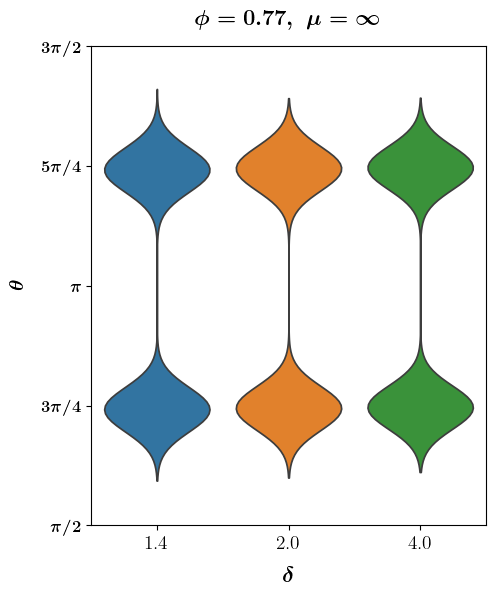

In [20]:
## Voilin plot for eigen vectors
#force wighted

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8]
#arr  = [1.0, 1.4, 2.0, 4.0]
arr  = [1.4, 2.0, 4.0]
phi  = 0.77
mu   = '1'
#mu   = 'inf'

# Prepare data
data = []
for ii, ar in enumerate(arr):
    jj = phi_mu_1[ii].index(phi)
    vectors_list = eigvec_mu_inf[ii][jj]
    if vectors_list:
        for arr2 in vectors_list:
            for col_idx in range(arr2.shape[1]):
                vec   = arr2[:, col_idx] / np.linalg.norm(arr2[:, col_idx])
                angle = np.arctan2(vec[1], vec[0])
                
                # Convert angle from [-pi, pi] to [0, 2pi]
                if angle < 0:
                    angle += 2*np.pi
                
                angle_pi = angle / np.pi
                data.append({'Size Ratio': ar, 'Angle (pi units)': angle_pi})

df = pd.DataFrame(data)

# # Prepare data - mu =1
# data = []
# for ii, ar in enumerate(arr):
#     jj = phi_mu_1[ii].index(phi)
#     vectors_list = eigvec_mu_inf[ii][jj]
#     if vectors_list:
#         for arr2 in vectors_list:
#             for col_idx in range(arr2.shape[1]):
#                 vec   = arr2[:, col_idx] / np.linalg.norm(arr2[:, col_idx])
#                 angle = np.arctan2(vec[1], vec[0])
                
#                 # Convert angle from [-pi, pi] to [0, 2pi]
#                 if angle < 0:
#                     angle += 2*np.pi
                
#                 angle_pi = angle / np.pi
#                 data.append({'Size Ratio': ar, 'Angle (pi units)': angle_pi})

# df_mu_inf = pd.DataFrame(data)

# Custom color palette
palette_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # one color per size ratio

# Violin plot
plt.figure(figsize=(5,6))
sns.violinplot(
    data=df,
    x='Size Ratio',
    y='Angle (pi units)',
    inner=None,          # just show distribution
    hue='Size Ratio',    # assign hue to use palette
    palette=palette_colors,
    legend=False
)

plt.xlabel(r'$\delta$', fontsize=16, fontweight='bold', labelpad=10)
plt.ylabel(r'$\theta$', fontsize=14, fontweight='bold', labelpad=10)
plt.title(r'$\phi = 0.77, \; \mu = \infty$', fontsize=16, fontweight='bold', pad=15)
#plt.title(r'$\phi = 0.77, \; \mu = 1$', fontsize=16, fontweight='bold', pad=15)

plt.grid(False)

# Y-axis limits and finer ticks in π units
y_min, y_max = 0.5, 1.5  # pi/2 to 3pi/2
num_ticks    = 5        #  choose number of ticks

# Generate evenly spaced tick positions
yticks = np.linspace(y_min, y_max, num_ticks)

# Generate LaTeX labels for each tick
yticklabels = []
for y in yticks:
    # multiply by 2 to get units of pi/2
    units = y * 2
    if units.is_integer():  # whole multiples of pi/2
        units = int(units)
        if units == 1:
            yticklabels.append(r'$\pi/2$')
        elif units == 2:
            yticklabels.append(r'$\pi$')
        elif units == 3:
            yticklabels.append(r'$3\pi/2$')
        else:
            yticklabels.append(f'{units}\pi/2')
    else:
        # fractional multiples of pi/2
        frac_num = int(round(units * 2))  # numerator for pi/4
        yticklabels.append(fr'${frac_num}\pi/4$')
        
plt.xticks(fontsize=14)
plt.yticks(yticks, yticklabels, fontsize=12)
plt.ylim(y_min, y_max)

if True:
    plt.tight_layout()
    plt.savefig(f'{fig_save_path}/voiling_eigen_vec_mu_inf.pdf', dpi=800, bbox_inches='tight')
    
plt.tight_layout()
plt.show()

In [23]:
phi_mu_1[1].index(phi)

3

In [19]:
phi_mu_1

[[0.71, 0.73, 0.75, 0.77, 0.78],
 [0.71, 0.73, 0.75, 0.77, 0.78, 0.783, 0.785],
 [0.71, 0.73, 0.75, 0.77, 0.78, 0.79, 0.795, 0.8, 0.81, 0.812]]

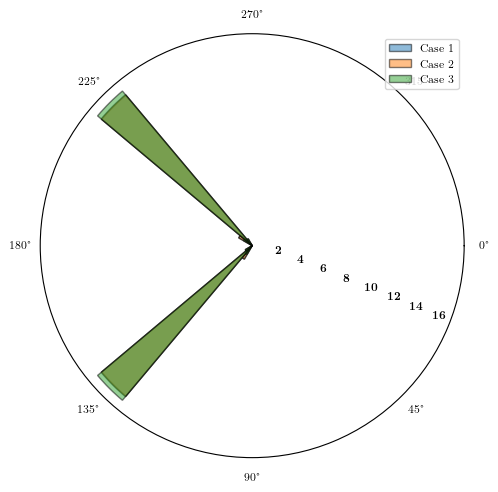

In [124]:
import numpy as np
import matplotlib.pyplot as plt

phii = 2
num_bins = 36

fig, ax = plt.subplots(figsize=(5, 5), subplot_kw={'projection': 'polar'})

for ii in range(len(eigvec_all)):
    vectors_list = eigvec_all[ii][phii]
    if vectors_list:
        # Flatten and normalize eigenvectors
        eigenvectors = np.array([arr[:, i]/np.linalg.norm(arr[:, i])
                                 for arr in vectors_list for i in range(arr.shape[1])])
        
        # Compute angles in [0, 2pi]
        angles = np.arctan2(eigenvectors[:, 1], eigenvectors[:, 0])
        angles = np.mod(angles, 2*np.pi)
        
        # Histogram
        counts, bin_edges = np.histogram(angles, bins=num_bins, range=(0, 2*np.pi), density=True)
        bin_width   = bin_edges[1] - bin_edges[0]
        bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
        
        # Plot bars in polar coordinates
        ax.bar(bin_centers, counts/np.mean(counts), width=bin_width, alpha=0.5, edgecolor='k', label=f'Case {ii+1}')

# Style
ax.set_theta_zero_location('E')  # optional: 0 at right
ax.set_theta_direction(-1)       # optional: clockwise
ax.grid(False)                   # remove grid
ax.legend(loc='upper right')

plt.show()

In [31]:
np.array(phi_mu_1[-2]) #* 0.796

array([0.89204583, 0.91717388, 0.94230194, 0.96742999, 0.97999401,
       0.98376322, 0.98627603])

In [28]:
np.array(phi_mu_inf[-2]) 

array([0.90168639, 0.92673323, 0.93925666, 0.95178008, 0.9643035 ,
       0.97682692])

In [25]:
phi_mu_inf[-1]

[0.8941258349202053,
 0.9182913980261568,
 0.9303741795791326,
 0.9424569611321083,
 0.9484983519085962,
 0.954539742685084,
 0.9605811334615719,
 0.9666225242380598]

In [26]:
phi_mu_1[-1]

[0.8597067031876531,
 0.8839237934182913,
 0.9081408836489294,
 0.9323579738795675,
 0.9444665189948867,
 0.9565750641102057,
 0.9626293366678652,
 0.9686836092255248,
 0.9807921543408438,
 0.9832138633639076]

In [19]:
eigvals

array([0.37068355, 0.62931648])

In [21]:
0.37068355/0.62931648

0.5890256520852593

In [18]:
a_mu_inf

[[0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.4109743424446358,
  0.4109743424446358],
 [0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577],
 [0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.4109743424446358],
 [0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577,
  0.41097434244463577]]

In [30]:
import pandas as pd
phim = np.array([0.7900862 , 0.79592323, 0.82586305])
# assuming phi_mu_1[1] and a_mu_1[1] are lists of equal length
df = pd.DataFrame({
    r'$\phi/\phi_m$': phi_mu_1[1],
    r'$\phi$': np.array(phi_mu_1[1])*phim[1],
    'A': np.array(a_mu_1[1]) * 1e2
})

print(df)

   $\phi/\phi_m$  $\phi$         A
0       0.892046   0.710  3.417392
1       0.917174   0.730  2.547606
2       0.942302   0.750  1.780868
3       0.967430   0.770  1.076950
4       0.979994   0.780  0.940054
5       0.983763   0.783  0.889409
6       0.986276   0.785  0.871373


In [31]:
import pandas as pd
phim = np.array([0.78810233, 0.78837106, 0.79850379, 0.827624])
# assuming phi_mu_1[1] and a_mu_1[1] are lists of equal length
df = pd.DataFrame({
    r'$\phi/\phi_m$': phi_mu_inf[2],
     r'$\phi$': np.array(phi_mu_inf[2])*phim[2],
    'A': np.array(a_mu_inf[2]) *1e2
})

print(df)

   $\phi/\phi_m$  $\phi$         A
0       0.901686    0.72  3.050874
1       0.926733    0.74  2.258681
2       0.939257    0.75  1.940008
3       0.951780    0.76  1.474713
4       0.964304    0.77  1.199684
5       0.976827    0.78  0.922925


In [124]:
range(off, len(intList))

range(100, 1327)

In [115]:
eigvals, eigvecs = np.linalg.eigh(fabric_tensor)
anisotropy = (eigvals.max() - eigvals.min()) / (eigvals.max() + eigvals.min())
print("Fabric anisotropy:", anisotropy)

Fabric anisotropy: 0.022234714978694323


In [125]:
len(intList)

1327

In [ ]:
## Viscocity plot for mu =1 
## supplementary material data

from scipy.optimize import curve_fit
from prettytable import PrettyTable
import warnings
from IPython.display import display, Math, HTML
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)
from sklearn.metrics import r2_score

def linearfit(x, c, m):
    return m * x + c

# Color and marker settings
colors       = ['#4a91b5', '#e68139', '#5da258', '#87629b', '#1b9e77']
line_markers = ['o', 's', '^', '*', 'p']
marker_size  = [6, 6, 8, 8, 8]
line_width   = 2

# Parameters
npp  = 1000
phiv = [0.72, 0.74, 0.75, 0.76, 0.765, 0.77, 0.78, 0.785, 0.79, 0.795, 0.8, 0.802, 0.82]
arr  = [1.0, 1.4, 2.0, 4.0]
vrr  = '0.75'
numRuns = 2
off     = 100
c0s     = []
mvals   = []
alpha   = 2.2464

fig, ax = plt.subplots(1, 3, figsize=(15, 4.5))

# Fig 1: Mean viscosity vs phi
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                visc_val = np.mean(data[off:, 3])
                visc_list.append(visc_val) if len(data[off:, 3]) > off else None
        visc.append(np.mean(visc_list) if visc_list else np.nan)

    visc_filtered = [x for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]
    ax[0].plot(phi_vals_filtered, visc_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j], label=fr'$\delta = {arj:.1f}$')

#ax[0].set_ylim(0, 6200)
ax[0].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[0].tick_params(axis='x', labelsize=14)
ax[0].legend(loc='upper left', fontsize=13, labelspacing=1.5, borderpad=1.2, frameon=False)
ax[0].set_ylabel(r'$\eta_{r}$', fontsize=18, fontstyle='italic')
ax[0].tick_params(axis='y', labelsize=14)

# Fig 2: Std deviation of viscosity vs phi
for j, arj in enumerate(arr):
    viscVar = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_var_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                visc_var = np.std(data[off:, 3])
                visc_var_list.append(visc_var) if len(data[off:, 3]) > off else None
        viscVar.append(np.mean(visc_var_list) if visc_var_list else np.nan)

    visc_var_filtered = [x for x in viscVar if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(viscVar, phiv) if not np.isnan(x)]
    #print(f'{visc_var_filtered[-1]}')
    ax[1].plot(phi_vals_filtered, visc_var_filtered, linestyle='--',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j])

ax[1].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[1].tick_params(axis='x', labelsize=14)
ax[1].set_ylabel(r'$\mathrm{std}(\eta_r)$', fontsize=18, fontstyle='italic')
ax[1].tick_params(axis='y', labelsize=14)
ax[1].set_yscale('log')

# Fig 3: Maron-Pierce fit
c0     = []
m_list = []
for j, arj in enumerate(arr):
    visc = []
    for k, phi in enumerate(phiv):
        phir = f"{phi:.3f}" if phi != round(phi, 2) else f"{phi:.2f}"
        visc_list = []
        for run in range(numRuns):
            vrj = '0.25' if arj == 1 else vrr
            workDir = f"{topDir}/NP_{npp}/phi_{phir}/ar_{arj:.1f}/Vr_{vrj}/run_{run+1}/"
            if os.path.exists(workDir):
                dataFile = glob.glob(workDir + "data_*.dat")[0]
                data = np.loadtxt(dataFile)
                visc_val = np.mean(data[off:, 3])
                visc_list.append(visc_val) if len(data[off:, 3]) > off else None
        visc.append(np.mean(visc_list) if visc_list else np.nan)

    visc_filtered     = [x ** (1 / -alpha) for x in visc if not np.isnan(x)]
    phi_vals_filtered = [y for x, y in zip(visc, phiv) if not np.isnan(x)]

    popt, pcov = curve_fit(linearfit, phi_vals_filtered, visc_filtered)
    c_opt, m_opt = popt
    c0.append(c_opt)
    ax[2].plot(phi_vals_filtered, visc_filtered, linestyle='None',
               marker=line_markers[j], color=colors[j], linewidth=line_width,
               markersize=marker_size[j], zorder=10)

    m_list.append(m_opt)
    xx = np.linspace(0.70, .85, 100)
    yy = linearfit(xx, c_opt, m_opt)
    ax[2].plot(xx, yy, color='red', linewidth=2, alpha = 0.6,
              label=fr'$y = -{m_opt:.2f}x + {c_opt:.2f}$')

dummy_line = Line2D([0], [0], color='red', linewidth=2, alpha=0.5,
                    label=r'Linear fit: $y = mx + c$')
ax[2].legend(handles=[dummy_line], loc='upper right', frameon=False, 
             #bbox_to_anchor=(0.99, 0.85), 
             framealpha=1, fontsize=13)    
c0s.append(c0)
mvals.append(m_list)

ax[2].set_ylim(0, 0.15)
ax[2].set_xlabel(r'$\phi$', fontsize=16, fontstyle='italic')
ax[2].tick_params(axis='x', labelsize=14)
ax[0].text(0.95, 0.95, fr'$\zeta = {float(vrr):.2f}$',
           fontsize=19,
           ha='right', va='top',
           transform=ax[0].transAxes,
           bbox=dict(facecolor='white', alpha=0.5, edgecolor='none', pad=2))
ax[2].set_ylabel(r'$\eta_{r}^{-1/\alpha}$', fontsize=18, fontstyle='italic')
ax[2].tick_params(axis='y', labelsize=14)

x_intercept = -np.array(c0s) / np.array(mvals)
phims = list(x_intercept[0])

fig.tight_layout()

figsave = False
if figsave:
    figFormat = ".pdf"
    plt.savefig(f'{fig_save_path}/visc_std_fit_vr_{vrr}{figFormat}', bbox_inches="tight", dpi=500)
plt.show()

## Miscelleneous plots

/media/rahul/rahul_2TB/high_bidispersity/new_data/NP_1000/phi_0.795/ar_4.0/Vr_0.25/run_1/PDF_sl_g_r_theta.txt
/media/rahul/rahul_2TB/high_bidispersity/new_data/NP_1000/phi_0.80/ar_4.0/Vr_0.5/run_1/PDF_sl_g_r_theta.txt
/media/rahul/rahul_2TB/high_bidispersity/new_data/NP_1000/phi_0.78/ar_4.0/Vr_0.75/run_1/PDF_sl_g_r_theta.txt


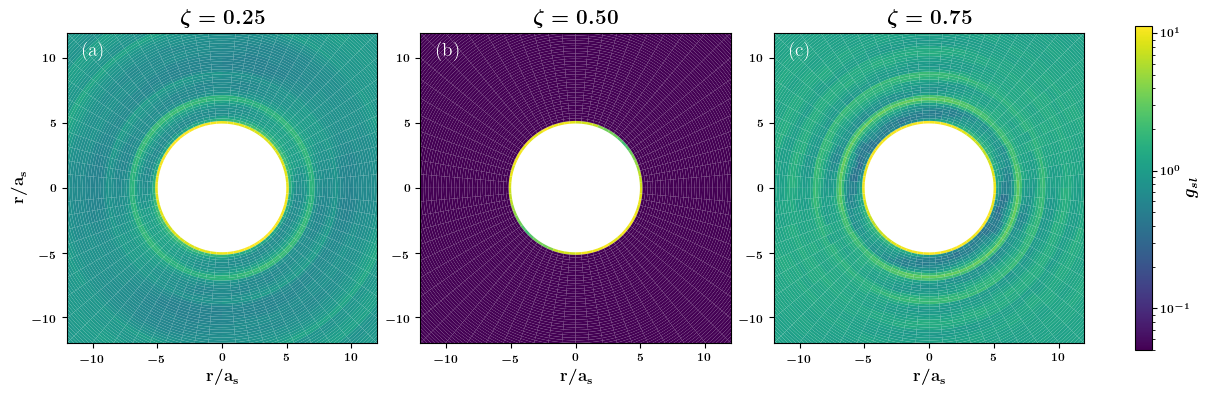

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Wedge
import numpy as np
import os
import glob
from matplotlib.colors import LogNorm


# Parameters
npp    = 1000
numRun = 1
# vrr    = ['0.25', '0.5', '0.75']
# phi    = [0.795, 0.8, 0.785]

vrr    = ['0.25','0.5', '0.75']
phi    = [0.795, 0.8, 0.78]

ar     = 4.0

sizePair   = 'sl'
label_list = ['(a)', '(b)', '(c)']

fig, ax = plt.subplots(1, 3, figsize=(12, 4), constrained_layout=True)

for i, vri in enumerate(vrr):
    phii     = phi[i]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'
    if os.path.exists(dataname): 
        datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        print(f'{datFile}')
        rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        ds    = 1
        plim  = 12
        tdist = ds * plim
        r1    = np.abs(rbin - ds*2).argmin()
        rlim  = np.abs(rbin - tdist * np.sqrt(2) * 1.1).argmin()

        g_r_submat = g_r_theta[r1:rlim, :]
        #norm = plt.Normalize(vmin=np.min(g_r_submat), vmax=np.max(g_r_submat))
        #norm = LogNorm(vmin=max(np.min(g_r_submat[g_r_submat > 0]), 1e-2), vmax=np.max(g_r_submat)*1.2)
        norm = LogNorm(vmin=5e-2, vmax=np.max(g_r_submat))
        cmap = plt.cm.viridis

        for ii in range(r1, rlim):
            r_start = rbin[ii]
            r_end   = rbin[ii + 1]
            for jj in range(len(thetabin) - 1):
                theta_start = np.degrees(thetabin[jj])
                theta_end   = np.degrees(thetabin[jj + 1])
                wedge       = Wedge((0, 0), r_end, theta_start, theta_end,
                                    width       = r_end - r_start,
                                    facecolor   = cmap(norm(g_r_theta[ii, jj])),
                                    edgecolor   = 'none',
                                    transform   = ax[i].transData._b,
                                    antialiased = True,
                                    rasterized  = True)
                ax[i].add_patch(wedge)
                
    ax[i].set_aspect('equal')
    ax[i].set_xlim([-tdist, tdist])
    ax[i].set_ylim([-tdist, tdist])
    ax[i].grid(False)
    ax[i].set_title(fr'$\zeta = {float(vri):.2f}$', fontsize=15)
    ax[i].text(-tdist * 0.9, tdist * 0.85, label_list[i], fontsize=14, weight='bold', color='white')

    if i == 0:
        ax[i].set_ylabel(r'$\mathbf{r / a_s}$', fontsize=12)
    ax[i].set_xlabel(r'$\mathbf{r / a_s}$', fontsize=12)

sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for older versions of matplotlib

# Add colorbar to the right of the subplots
cbar = fig.colorbar(sm, ax=ax, location='right', shrink=0.85, pad=0.05)
cbar.set_label(r'$g_{sl}$', fontsize=12, labelpad = -5)
plt.show()

/media/rahul/rahul_2TB/high_bidispersity/new_data/NP_1000/phi_0.795/ar_4.0/Vr_0.25/run_1/PDF_sl_g_r_theta.txt
/media/rahul/rahul_2TB/high_bidispersity/new_data/NP_1000/phi_0.78/ar_4.0/Vr_0.75/run_1/PDF_sl_g_r_theta.txt
/media/rahul/rahul_2TB/high_bidispersity/new_data/NP_1000/phi_0.795/ar_4.0/Vr_0.25/run_1/PDF_sl_g_r_theta.txt
/media/rahul/rahul_2TB/high_bidispersity/new_data/NP_1000/phi_0.78/ar_4.0/Vr_0.75/run_1/PDF_sl_g_r_theta.txt






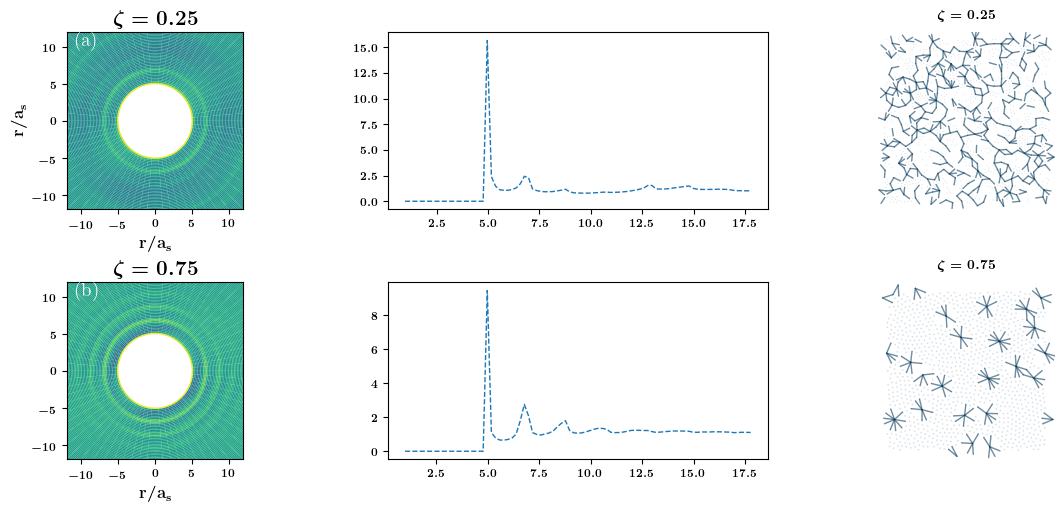

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Wedge
import numpy as np
import os
import glob
from matplotlib.colors import LogNorm


# Parameters
npp    = 1000
numRun = 1
# vrr    = ['0.25', '0.5', '0.75']
# phi    = [0.795, 0.8, 0.785]

vrr    = ['0.25', '0.75']
phi    = [0.795, 0.78]

ar     = 4.0

sizePair   = 'sl'
label_list = ['(a)', '(b)', '(c)']
particleFile    = 'par_*.dat' 
interactionFile = 'int_*.dat' 

fig, ax = plt.subplots(2, 3, figsize=(12, 5), constrained_layout=True)

for i, vri in enumerate(vrr):
    phii     = phi[i]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'
    if os.path.exists(dataname): 
        datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        print(f'{datFile}')
        rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        ds    = 1
        plim  = 12
        tdist = ds * plim
        r1    = np.abs(rbin - ds*2).argmin()
        rlim  = np.abs(rbin - tdist * np.sqrt(2) * 1.1).argmin()

        g_r_submat = g_r_theta[r1:rlim, :]
        #norm = plt.Normalize(vmin=np.min(g_r_submat), vmax=np.max(g_r_submat))
        #norm = LogNorm(vmin=max(np.min(g_r_submat[g_r_submat > 0]), 1e-2), vmax=np.max(g_r_submat)*1.2)
        norm = LogNorm(vmin=5e-2, vmax=np.max(g_r_submat))
        cmap = plt.cm.viridis

        for ii in range(r1, rlim):
            r_start = rbin[ii]
            r_end   = rbin[ii + 1]
            for jj in range(len(thetabin) - 1):
                theta_start = np.degrees(thetabin[jj])
                theta_end   = np.degrees(thetabin[jj + 1])
                wedge       = Wedge((0, 0), r_end, theta_start, theta_end,
                                    width       = r_end - r_start,
                                    facecolor   = cmap(norm(g_r_theta[ii, jj])),
                                    edgecolor   = 'none',
                                    transform   = ax[i][0].transData._b,
                                    antialiased = True,
                                    rasterized  = True)
                ax[i][0].add_patch(wedge)
                
    ax[i][0].set_aspect('equal')
    ax[i][0].set_xlim([-tdist, tdist])
    ax[i][0].set_ylim([-tdist, tdist])
    ax[i][0].grid(False)
    ax[i][0].set_title(fr'$\zeta = {float(vri):.2f}$', fontsize=15)
    ax[i][0].text(-tdist * 0.9, tdist * 0.85, label_list[i], fontsize=14, weight='bold', color='white')

    if i == 0:
        ax[i][0].set_ylabel(r'$\mathbf{r / a_s}$', fontsize=12)
    ax[i][0].set_xlabel(r'$\mathbf{r / a_s}$', fontsize=12)

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])  # Required for older versions of matplotlib
    #cbar = fig.colorbar(sm, ax=ax, location='right', shrink=0.85, pad=0.05)
    #cbar.set_label(r'$g_{sl}$', fontsize=12, labelpad = -5)
    
for i, vri in enumerate(vrr):
    phii     = phi[i]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'
    if os.path.exists(dataname): 
        datFile   = glob.glob(f'{dataname}/PDF_{sizePair}_*.txt')[0]
        print(f'{datFile}')
        rbin      = np.genfromtxt(datFile, skip_header=1, max_rows=1)
        thetabin  = np.genfromtxt(datFile, skip_header=2, max_rows=1)
        g_r_theta = np.genfromtxt(datFile, skip_header=5)

        rlim = 18
        indx = (np.abs(rbin - rlim)).argmin()
        gr = np.mean(g_r_theta, axis=1)
        ax[i][1].plot(rbin[:indx], gr[:indx], linestyle='--')

# Frame details
pointsize  = 0.7
contLineWidth = 1
for i, vri in enumerate(vrr):
    phii     = phi[i]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'
    if os.path.exists(dataname): 
        intPath  = open(glob.glob(f'{dataname}/{interactionFile}')[0])
        intList  = readFiles.interactionsList(intPath)
        parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
        parLines = parPath.readlines()
        parList1 = readFiles.readParFile(parPath)

        # box dimensions
        Lx = float(parLines[3].split()[2]) 
        Lz = float(parLines[3].split()[2])

        # setting up axis and box walls
        # _, ax = plt.subplots(1, 1, figsize=(5,5), dpi = 500)
        newLx = Lx + 2*ar
        newLz = Lz + 2*ar

        print("\n")
        noFrames = 1
        frameSet = random.sample(range(0, len(parList1)), noFrames)
        #frameSet = 200 + np.array(range(noFrames))
        
        for frame in frameSet:
            # position and radius data from par_*.dat
            px = parList1[frame][:,2]
            pz = parList1[frame][:,3]
            pr = parList1[frame][:,1]
            NP = len(pr)
            
            # interaction data from int_*.dat
            frameList = intList[frame]
            pi        = np.array([int(x) for x in frameList[:,0]])
            pj        = np.array([int(x) for x in frameList[:,1]])
            normxij   = frameList[:,2]
            normzij   = frameList[:,4]
            gapij     = frameList[:,5]
            contState = frameList[:,10]
            numInts   = len(contState)

            for j in range(npp):
                circle = plt.Circle((px[j],pz[j]), 0.4, facecolor='#9fb5c4', fill=True, edgecolor='none', alpha=0.4)            
                ax[i][2].add_artist(circle)
                 
            for ii in range(numInts):
                #for k in range(filtered_arr.shape[0]):
                p1   = pi[ii]
                p2   = pj[ii]
                pos1 = np.array([px[p1], pz[p1]]) # particle 1 x-,y-position
                pos2 = np.array([px[p2], pz[p2]]) # particle 2 x-,y-position
                gap  = gapij[ii]
                nij  = np.array([normxij[ii], normzij[ii]])  # normal vector 1 to 2
                pir  = pr[p1]
                pjr  = pr[p2]
                rij  = nij * (gap + 2.) * (pir + pjr) * 0.5 # vector length between partcle 1 and 2
                p11  = pos1 + rij
                if (contState[ii] == 2 or contState[ii] == 3) and pir != pjr:
                    ax[i][2].plot([pos1[0], p11[0]],[pos1[1], p11[1]], color='#0f4060', 
                            linewidth=contLineWidth, solid_capstyle='round',
                            solid_joinstyle='round', alpha=0.6)
        
                    if (np.sign(nij[0]) != np.sign((pos2 - pos1)[0])) or (np.sign(nij[1]) != np.sign((pos2 - pos1)[1])):
                        p22 = pos2 - rij
                        ax[i][2].plot([pos2[0], p22[0]], [pos2[1], p22[1]], color='#0f4060', 
                                linewidth=contLineWidth, solid_capstyle='round',
                                solid_joinstyle='round', alpha=0.6)
                
        ax[i][2].set_xlim([-(newLx/2+0.2),(newLx/2+0.2)])
        ax[i][2].set_ylim([-(newLz/2+0.2),(newLz/2+0.2)])
        #ax.set_title(fr'$\gamma = {frame/100:.2f}$', pad=10, fontweight='bold')
        ax[i][2].set_title(fr'$\zeta = {float(vri):.2f}$', pad=10, fontweight='bold')
        ax[i][2].axis('off')
        ax[i][2].set_aspect('equal')

# Add colorbar to the right of the subplots
plt.show()

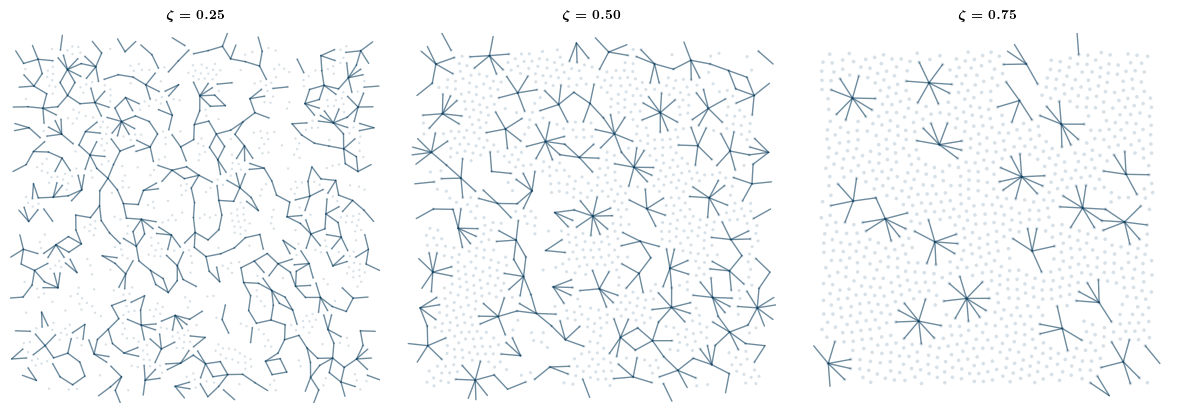

In [208]:
import readFiles
from matplotlib.patches import Circle
import random

## get sl interactions in snapshots
# Parameters
npp    = 1000
numRun = 1
vrr    = ['0.25','0.5', '0.75']
phi    = [0.795, 0.8, 0.78]
ar     = 4.0

particleFile    = 'par_*.dat' 
interactionFile = 'int_*.dat' 

# Frame details
pointsize  = 0.7
contLineWidth = 1

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, vri in enumerate(vrr):
    phii     = phi[i]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'
    if os.path.exists(dataname): 
        intPath  = open(glob.glob(f'{dataname}/{interactionFile}')[0])
        intList  = readFiles.interactionsList(intPath)
        parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
        parLines = parPath.readlines()
        parList1 = readFiles.readParFile(parPath)

        # box dimensions
        Lx = float(parLines[3].split()[2]) 
        Lz = float(parLines[3].split()[2])

        # setting up axis and box walls
        # _, ax = plt.subplots(1, 1, figsize=(5,5), dpi = 500)
        newLx = Lx + 2*ar
        newLz = Lz + 2*ar

        print("\n")
        noFrames = 1
        frameSet = random.sample(range(0, len(parList1)), noFrames)
        #frameSet = 200 + np.array(range(noFrames))
        
        for frame in frameSet:
            # position and radius data from par_*.dat
            px = parList1[frame][:,2]
            pz = parList1[frame][:,3]
            pr = parList1[frame][:,1]
            NP = len(pr)
            
            # interaction data from int_*.dat
            frameList = intList[frame]
            pi        = np.array([int(x) for x in frameList[:,0]])
            pj        = np.array([int(x) for x in frameList[:,1]])
            normxij   = frameList[:,2]
            normzij   = frameList[:,4]
            gapij     = frameList[:,5]
            contState = frameList[:,10]
            numInts   = len(contState)

            for j in range(npp):
                circle = plt.Circle((px[j],pz[j]), 0.4, facecolor='#9fb5c4', fill=True, edgecolor='none', alpha=0.4)            
                ax[i].add_artist(circle)
                 
            for ii in range(numInts):
                #for k in range(filtered_arr.shape[0]):
                p1   = pi[ii]
                p2   = pj[ii]
                pos1 = np.array([px[p1], pz[p1]]) # particle 1 x-,y-position
                pos2 = np.array([px[p2], pz[p2]]) # particle 2 x-,y-position
                gap  = gapij[ii]
                nij  = np.array([normxij[ii], normzij[ii]])  # normal vector 1 to 2
                pir  = pr[p1]
                pjr  = pr[p2]
                rij  = nij * (gap + 2.) * (pir + pjr) * 0.5 # vector length between partcle 1 and 2
                p11  = pos1 + rij
                if (contState[ii] == 2 or contState[ii] == 3) and pir != pjr:
                    ax[i].plot([pos1[0], p11[0]],[pos1[1], p11[1]], color='#0f4060', 
                            linewidth=contLineWidth, solid_capstyle='round',
                            solid_joinstyle='round', alpha=0.6)
        
                    if (np.sign(nij[0]) != np.sign((pos2 - pos1)[0])) or (np.sign(nij[1]) != np.sign((pos2 - pos1)[1])):
                        p22 = pos2 - rij
                        ax[i].plot([pos2[0], p22[0]], [pos2[1], p22[1]], color='#0f4060', 
                                linewidth=contLineWidth, solid_capstyle='round',
                                solid_joinstyle='round', alpha=0.6)
                
        ax[i].set_xlim([-(newLx/2+0.2),(newLx/2+0.2)])
        ax[i].set_ylim([-(newLz/2+0.2),(newLz/2+0.2)])
        #ax.set_title(fr'$\gamma = {frame/100:.2f}$', pad=10, fontweight='bold')
        ax[i].set_title(fr'$\zeta = {float(vri):.2f}$', pad=10, fontweight='bold')
        ax[i].axis('off')
        ax[i].set_aspect('equal')

plt.show()

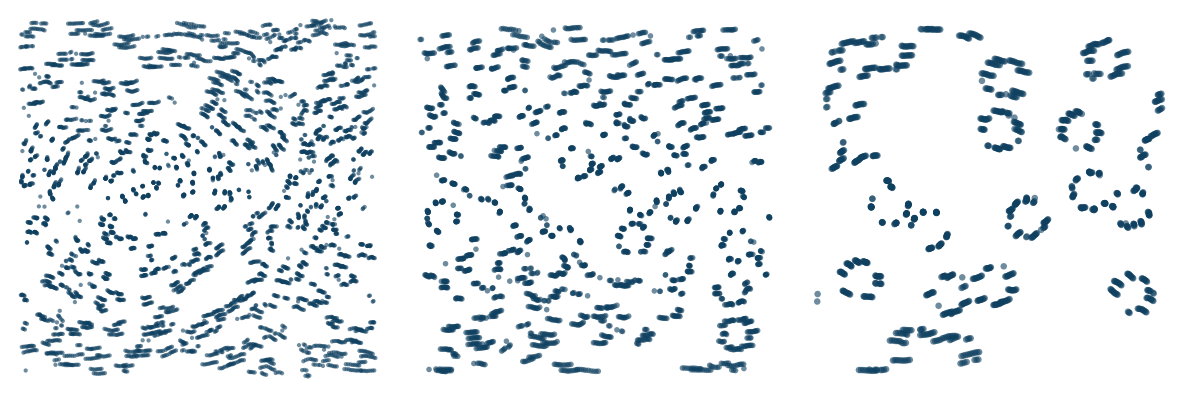

In [195]:
import readFiles
from matplotlib.patches import Circle
import random

## get sl interactions in snapshots
# Parameters
npp    = 1000
numRun = 1
vrr    = ['0.25','0.5', '0.75']
phi    = [0.795, 0.8, 0.78]
ar     = 4.0

particleFile    = 'par_*.dat' 
interactionFile = 'int_*.dat' 

# Frame details
pointsize  = 0.7

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

for i, vri in enumerate(vrr):
    phii     = phi[i]
    phir     = '{:.3f}'.format(phii) if len(str(phii).split('.')[1]) > 2 else '{:.2f}'.format(phii)
    dataname = f'{topDir}/NP_{npp}/phi_{phir}/ar_{ar:.1f}/Vr_{vri}/run_{numRun}'
    if os.path.exists(dataname): 
        intPath  = open(glob.glob(f'{dataname}/{interactionFile}')[0])
        intList  = readFiles.interactionsList(intPath)
        parPath  = open(glob.glob(f'{dataname}/{particleFile}')[0])
        parLines = parPath.readlines()
        parList1 = readFiles.readParFile(parPath)

        # box dimensions
        Lx = float(parLines[3].split()[2]) 
        Lz = float(parLines[3].split()[2])

        # setting up axis and box walls
        # _, ax = plt.subplots(1, 1, figsize=(5,5), dpi = 500)
        newLx = Lx + 2*ar
        newLz = Lz + 2*ar

        print("\n")
        noFrames = 3
        #frameSet = random.sample(range(0, len(parList1)), noFrames)
        frameSet = 200 + np.array(range(noFrames))
        
        for frame in frameSet:
            # position and radius data from par_*.dat
            px = parList1[frame][:,2]
            pz = parList1[frame][:,3]
            pr = parList1[frame][:,1]
            NP = len(pr)
            
            # interaction data from int_*.dat
            frameList = intList[frame]
            pi        = np.array([int(x) for x in frameList[:,0]])
            pj        = np.array([int(x) for x in frameList[:,1]])
            normxij   = frameList[:,2]
            normzij   = frameList[:,4]
            gapij     = frameList[:,5]
            contState = frameList[:,10]
            numInts   = len(contState)
            
            for ii in range(numInts):
                p1  = pi[ii]
                p2  = pj[ii]
                nij = np.array([normxij[ii], normzij[ii]])
                if (contState[ii] == 2 or contState[ii] == 3) and pr[p1] != pr[p2]:
                    # frictional SL contacts
                    rij = 0.5 * (pr[p1] + pr[p2]) * (gapij[i] + 2.)
                    a12 = pr[p1] + pr[p2]
                    assert a12 == 1 + ar, f'Error: a12 = {a12}, expected {1 + ar}'
                    min_index = p1 if pr[p1] < pr[p2] else p2

                    px_cont, py_cont = np.array([px[min_index], pz[min_index]]) + nij * rij/a12
                    circle = Circle((px_cont, py_cont), pointsize, facecolor='#0f4060', edgecolor='none', alpha=0.6)
                    ax[i].add_patch(circle)

            ax[i].set_xlim([-(newLx/2+0.2),(newLx/2+0.2)])
            ax[i].set_ylim([-(newLz/2+0.2),(newLz/2+0.2)])
            #ax.set_title(fr'$\gamma = {frame/100:.2f}$', pad=10, fontweight='bold')
            ax.set_title(fr'$\zeta = {vri:.2f}$', pad=10, fontweight='bold')
            ax[i].axis('off')
            ax[i].set_aspect('equal')

plt.show()